In [ ]:
import pandas as pd

# Load the data from the CSV file
# Please replace 'your_file_name.csv' with the actual file path
df = pd.read_excel('/content/680084_Lab_Sensitivity_results 12.06.25 - Reduced Training Data.xlsx')

# **Preliminary data preprocessing**

In [ ]:
# Step 1: Preliminary data preprocessing

# Drop the 'Freq' column
if 'Freq.' in df.columns:
    df = df.drop(columns=['Freq.'])
else:
    print("'Freq.' column not found. Skipping drop.")

# Drop rows with any missing values
df = df.dropna()

In [ ]:
# Create the 'Stratification_Key' column
df['Stratification_Key'] = df['Parameter Name '] + '_' + df['EFL ']

In [ ]:
# Perform one-hot encoding on the 'EFL' column
# and drop the original 'EFL' column

# Drop the 'z2' column which is a result of one-hot encoding
# The column name from the one-hot encoding will be 'EFL _z2'
df = pd.get_dummies(df, columns=['EFL '], drop_first=True, dtype=int)

In [ ]:
df.head()

Parameter Name   Parameter Error  Zerniks Astigmatisim\n X\n(c5)  \
0         Nominal            0.000                   -9.242339e-13   
1         Nominal            0.000                    4.701217e-18   
2    Radius s1 E1           -0.010                    4.171001e-14   
3    Radius s1 E1           -0.010                   -9.382132e-15   
4    Radius s1 E1           -0.005                    3.134720e-13   

   Zerniks Astigmatisim\n Y\n(c6)  Zerniks Coma X\n(c7)  Zerniks Coma Y\n(c8)  \
0                   -2.750977e-13         -2.591691e-12         -2.109458e-12   
1                   -2.650705e-13          3.044477e-13          3.044423e-13   
2                    6.586106e-13         -8.244971e-13         -7.915587e-13   
3                   -4.284671e-13         -3.930465e-13         -4.036746e-13   
4                    1.163477e-12         -2.550733e-13         -1.066010e-13   

   Zerniks Spherical \n(c9)  Zerniks Spherical -  \n(c16)  MTF 3.39 mic  \
0                  0.000502                      0.003411      0.427508   
1                  0.008277                      0.008595      0.426235   
2                  0.007998                     -0.000576      0.642350   
3                  0.007941                      0.008457      0.426552   
4                  0.014332                     -0.002505      0.564213   

  Stratification_Key  EFL _z2  
0         Nominal_z1        0  
1         Nominal_z2        1  
2    Radius s1 E1_z1        0  
3    Radius s1 E1_z2        1  
4    Radius s1 E1_z1        0

In [ ]:
df.columns

Index(['Parameter Name ', 'Parameter Error', 'Zerniks Astigmatisim\n X\n(c5)',
       'Zerniks Astigmatisim\n Y\n(c6)', 'Zerniks Coma X\n(c7)',
       'Zerniks Coma Y\n(c8)', 'Zerniks Spherical \n(c9)',
       'Zerniks Spherical -  \n(c16)', 'MTF 3.39 mic', 'Stratification_Key',
       'EFL _z2'],
      dtype='object')

In [ ]:
# Drop the first two rows
df = df.iloc[2:].reset_index(drop=True)

# Display the first few rows of the processed DataFrame
display(df.head())

Parameter Name   Parameter Error  Zerniks Astigmatisim\n X\n(c5)  \
0    Radius s1 E1           -0.010                    4.171001e-14   
1    Radius s1 E1           -0.010                   -9.382132e-15   
2    Radius s1 E1           -0.005                    3.134720e-13   
3    Radius s1 E1           -0.005                   -1.118461e-12   
4    Radius s1 E1           -0.001                   -6.168355e-13   

   Zerniks Astigmatisim\n Y\n(c6)  Zerniks Coma X\n(c7)  Zerniks Coma Y\n(c8)  \
0                    6.586106e-13         -8.244971e-13         -7.915587e-13   
1                   -4.284671e-13         -3.930465e-13         -4.036746e-13   
2                    1.163477e-12         -2.550733e-13         -1.066010e-13   
3                   -6.900810e-19         -2.341948e-19         -1.881640e-18   
4                    2.562663e-13          1.866215e-12          1.465481e-12   

   Zerniks Spherical \n(c9)  Zerniks Spherical -  \n(c16)  MTF 3.39 mic  \
0                  0.007998                     -0.000576      0.642350   
1                  0.007941                      0.008457      0.426552   
2                  0.014332                     -0.002505      0.564213   
3                  0.008110                      0.008526      0.426243   
4                  0.006091                     -0.001923      0.466548   

  Stratification_Key  EFL _z2  
0    Radius s1 E1_z1        0  
1    Radius s1 E1_z2        1  
2    Radius s1 E1_z1        0  
3    Radius s1 E1_z2        1  
4    Radius s1 E1_z1        0

## exclude categories that have less than "MaxNumExamples" examples in the dataset

In [ ]:
# Calculate value counts for 'Stratification_Key'
value_counts_total = df['Stratification_Key'].value_counts()
value_counts_total

Stratification_Key
Radius s1 E1_z1    8
Radius s1 E1_z2    8
Radius s2 E1_z1    8
Radius s2 E1_z2    8
Radius s2 E2_z1    8
                  ..
Irr s1 E8_z2       3
Irr s2 E9_z2       3
Irr s2 E9_z1       3
Irr s1 E9_z2       3
Irr s1 E9_z1       3
Name: count, Length: 168, dtype: int64

In [ ]:
# Identify categories with 6 or fewer occurrences
MaxNumExamples = 6
categories_to_remove = value_counts_total[value_counts_total <= MaxNumExamples].index.tolist() # ".index": the index of the filtered value_counts_total Series contains the actual 'Stratification_Key' values that met the condition (having a count of 4 or less)
display(categories_to_remove)
print(len(categories_to_remove))
print(df.shape)

['Z Position E9_z1',
 'Z Position E9_z2',
 'ETV E9_z1',
 'ETV E9_z2',
 'Z Position E1_z1',
 'Z Position E1_z2',
 'ETV E1_z1',
 'ETV E1_z2',
 'Z Position E2_z1',
 'Z Position E2_z2',
 'Thickness E2_z2',
 'Thickness E2_z1',
 'Thickness E1_z2',
 'Thickness E1_z1',
 'ETV E2_z2',
 'ETV E2_z1',
 'Z Position E8_z2',
 'Z Position E8_z1',
 'ETV E8_z2',
 'ETV E8_z1',
 'Z Position E4_z2',
 'Z Position E4_z1',
 'ETV E4_z2',
 'ETV E4_z1',
 'Thickness E3_z1',
 'Thickness E3_z2',
 'ETV E3_z2',
 'ETV E3_z1',
 'Thickness E9_z2',
 'Thickness E9_z1',
 'Z Position G1_z2',
 'Z Position G1_z1',
 'Z Position E3_z2',
 'Z Position E3_z1',
 'Thickness E4_z1',
 'Thickness E4_z2',
 'ETV E7_z2',
 'ETV E7_z1',
 'Thickness E7_z2',
 'Thickness E7_z1',
 'Thickness E8_z2',
 'Thickness E8_z1',
 'Z Position E7_z1',
 'Z Position E7_z2',
 'Thickness E5_z1',
 'Thickness E5_z2',
 'ETV E5_z1',
 'ETV E5_z2',
 'ETV E6_z1',
 'ETV E6_z2',
 'Z Position E6_z2',
 'Z Position E6_z1',
 'Thickness E6_z2',
 'Thickness E6_z1',
 'Z Positi

92
(1052, 11)


In [ ]:
# Calculate value counts for 'Stratification_Key'
value_counts = df['Stratification_Key'].value_counts()

# Identify categories with MaxNumExamples or fewer occurrences
categories_to_remove = value_counts[value_counts <= MaxNumExamples].index.tolist()

if categories_to_remove:
    print("Categories with MaxNumExamples or fewer occurrences in 'Stratification_Key':")
    print(categories_to_remove)

    # Get the 'Parameter Name' values for the rows to be removed
    removed_parameter_names = df[df['Stratification_Key'].isin(categories_to_remove)]['Parameter Name '].unique().tolist()

    # Get the row indices of the rows to be removed
    indices_to_remove = df[df['Parameter Name '].isin(removed_parameter_names)].index.tolist()
    print(f"\nRow indices to be removed: {indices_to_remove}")

    # Show the number of rows that will be removed based on 'Parameter Name'
    num_rows_to_remove = len(df[df['Parameter Name '].isin(removed_parameter_names)])
    print(f"\nNumber of rows to be removed based on 'Parameter Name': {num_rows_to_remove}")

    # Create a DataFrame with only the rows to be removed
    df_removed = df[df['Parameter Name '].isin(removed_parameter_names)].copy()

    # Drop rows where the 'Parameter Name' is in the removed_parameter_names list
    df_reduced = df[~df['Parameter Name '].isin(removed_parameter_names)].reset_index(drop=True)

    print("\nThe following 'Parameter Name' values were removed due to low category counts:")
    print(removed_parameter_names)
else:
    print("No categories with 4 or fewer occurrences found in 'Stratification_Key'. No rows were removed.")

print(df.shape)
print(df_reduced.shape)
display(df_removed.head())
print(len(removed_parameter_names))
print(len(indices_to_remove))

Categories with MaxNumExamples or fewer occurrences in 'Stratification_Key':
['Z Position E9_z1', 'Z Position E9_z2', 'ETV E9_z1', 'ETV E9_z2', 'Z Position E1_z1', 'Z Position E1_z2', 'ETV E1_z1', 'ETV E1_z2', 'Z Position E2_z1', 'Z Position E2_z2', 'Thickness E2_z2', 'Thickness E2_z1', 'Thickness E1_z2', 'Thickness E1_z1', 'ETV E2_z2', 'ETV E2_z1', 'Z Position E8_z2', 'Z Position E8_z1', 'ETV E8_z2', 'ETV E8_z1', 'Z Position E4_z2', 'Z Position E4_z1', 'ETV E4_z2', 'ETV E4_z1', 'Thickness E3_z1', 'Thickness E3_z2', 'ETV E3_z2', 'ETV E3_z1', 'Thickness E9_z2', 'Thickness E9_z1', 'Z Position G1_z2', 'Z Position G1_z1', 'Z Position E3_z2', 'Z Position E3_z1', 'Thickness E4_z1', 'Thickness E4_z2', 'ETV E7_z2', 'ETV E7_z1', 'Thickness E7_z2', 'Thickness E7_z1', 'Thickness E8_z2', 'Thickness E8_z1', 'Z Position E7_z1', 'Z Position E7_z2', 'Thickness E5_z1', 'Thickness E5_z2', 'ETV E5_z1', 'ETV E5_z2', 'ETV E6_z1', 'ETV E6_z2', 'Z Position E6_z2', 'Z Position E6_z1', 'Thickness E6_z2', 'Thic

Parameter Name   Parameter Error  Zerniks Astigmatisim\n X\n(c5)  \
32       Irr s1 E1              0.5                       -0.035708   
33       Irr s1 E1              0.5                       -0.000088   
34       Irr s1 E1              1.0                       -0.071417   
35       Irr s1 E1              1.0                       -0.000175   
36       Irr s1 E1              2.0                       -0.142834   

    Zerniks Astigmatisim\n Y\n(c6)  Zerniks Coma X\n(c7)  \
32                   -1.501310e-13          5.790419e-13   
33                    4.595119e-13         -6.835827e-14   
34                    4.585377e-13          3.330588e-13   
35                    1.739506e-13          2.167590e-14   
36                    8.060427e-13          7.322443e-14   

    Zerniks Coma Y\n(c8)  Zerniks Spherical \n(c9)  \
32         -4.043882e-13                  0.000544   
33         -1.541274e-13                  0.008276   
34         -1.435043e-12                  0.000586   
35         -1.776463e-13                  0.008274   
36          1.722180e-12                  0.000670   

    Zerniks Spherical -  \n(c16)  MTF 3.39 mic Stratification_Key  EFL _z2  
32                      0.003415      0.425236       Irr s1 E1_z1        0  
33                      0.008594      0.426223       Irr s1 E1_z2        1  
34                      0.003419      0.417717       Irr s1 E1_z1        0  
35                      0.008593      0.426223       Irr s1 E1_z2        1  
36                      0.003427      0.389724       Irr s1 E1_z1        0

46
444


# **EDA**

## finding the lower quantile for each unique error type

## subset for EFL = z1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select the rows for which the value in the 'EFL _z2' is 0.
df_efl_z2_0 = df[df['EFL _z2'] == 0].copy()
print("Filtered data for EFL _z2 = 0:")
display(df_efl_z2_0.head())

Filtered data for EFL _z2 = 0:


Parameter Name   Parameter Error  Zerniks Astigmatisim\n X\n(c5)  \
0    Radius s1 E1          -0.0100                    4.171001e-14   
2    Radius s1 E1          -0.0050                    3.134720e-13   
4    Radius s1 E1          -0.0010                   -6.168355e-13   
6    Radius s1 E1          -0.0005                    9.622367e-13   
8    Radius s1 E1           0.0005                    1.292319e-12   

   Zerniks Astigmatisim\n Y\n(c6)  Zerniks Coma X\n(c7)  Zerniks Coma Y\n(c8)  \
0                    6.586106e-13         -8.244971e-13         -7.915587e-13   
2                    1.163477e-12         -2.550733e-13         -1.066010e-13   
4                    2.562663e-13          1.866215e-12          1.465481e-12   
6                    4.339006e-13         -2.957465e-12         -3.876645e-12   
8                   -4.120479e-12         -1.334242e-12          2.175823e-12   

   Zerniks Spherical \n(c9)  Zerniks Spherical -  \n(c16)  MTF 3.39 mic  \
0                  0.007998                     -0.000576      0.642350   
2                  0.014332                     -0.002505      0.564213   
4                  0.006091                     -0.001923      0.466548   
6                  0.003309                      0.000102      0.445176   
8                 -0.001988                      0.008347      0.401630   

  Stratification_Key  EFL _z2  
0    Radius s1 E1_z1        0  
2    Radius s1 E1_z1        0  
4    Radius s1 E1_z1        0  
6    Radius s1 E1_z1        0  
8    Radius s1 E1_z1        0

## unique error types for the z1 subset

In [ ]:
# Step 2: Find the unique values in the column 'Parameter Name'
unique_param_names_z2_0 = df_efl_z2_0['Parameter Name '].unique()
print("\nUnique 'Parameter Name' values where EFL _z2 = 0:")
print(unique_param_names_z2_0)
print(f"Number of unique 'Parameter Name' values: {len(unique_param_names_z2_0)}")


Unique 'Parameter Name' values where EFL _z2 = 0:
['Radius s1 E1' 'Radius s2 E1' 'Irr s1 E1' 'Irr s2 E1' 'Thickness E1'
 'ETV E1' 'Z Position E1' 'Decenter E1' 'Tilt E1' 'Radius s1 E2'
 'Radius s2 E2' 'Irr s1 E2' 'Irr s2 E2' 'Thickness E2' 'ETV E2'
 'Z Position E2' 'Decenter E2' 'Tilt E2' 'Radius s1 E3' 'Radius s2 E3'
 'Irr s1 E3' 'Irr s2 E3' 'Thickness E3' 'ETV E3' 'Z Position E3'
 'Decenter E3' 'Tilt E3' 'Radius s1 E4' 'Radius s2 E4' 'Irr s1 E4'
 'Irr s2 E4' 'Thickness E4' 'ETV E4' 'Z Position E4' 'Decenter E4'
 'Tilt E4' 'Radius s1 E5' 'Radius s2 E5' 'Irr s1 E5' 'Irr s2 E5'
 'Thickness E5' 'ETV E5' 'Z Position E5' 'Decenter E5' 'Tilt E5'
 'Radius s1 E6' 'Radius s2 E6' 'Irr s1 E6' 'Irr s2 E6' 'Thickness E6'
 'ETV E6' 'Z Position E6' 'Decenter E6' 'Tilt E6' 'Radius s1 E7'
 'Radius s2 E7' 'Irr s1 E7' 'Irr s2 E7' 'Thickness E7' 'ETV E7'
 'Z Position E7' 'Decenter E7' 'Tilt E7' 'Flatness s1 E8' 'Flatness s2 E8'
 'Irr s1 E8' 'Irr s2 E8' 'Thickness E8' 'ETV E8' 'Z Position E8'
 'Decenter 

## calculating the lower quantile for each unique error type for EFL = z1

In [ ]:
# Calculate the lower quartile of the absolute values of 'Parameter Error'
# for each 'Parameter Name' where EFL_z2 is 0 - Alternative method
lower_quartile_abs_param_error_z2_0 = df_efl_z2_0['Parameter Error'].abs().groupby(df_efl_z2_0['Parameter Name ']).quantile(0.25)

print("\nLower Quartile of Absolute 'Parameter Error' for each 'Parameter Name' (EFL _z2 = 0):")
display(lower_quartile_abs_param_error_z2_0)


Lower Quartile of Absolute 'Parameter Error' for each 'Parameter Name' (EFL _z2 = 0):


Parameter Name 
Decenter E1      0.00875
Decenter E2      0.00875
Decenter E3      0.00875
Decenter E4      0.00875
Decenter E5      0.00875
                  ...   
Z Position E6    0.12500
Z Position E7    0.12500
Z Position E8    0.12500
Z Position E9    0.12500
Z Position G1    0.12500
Name: Parameter Error, Length: 84, dtype: float64

## finding the rows in the subset whose error value best match the lower quantile value

In [ ]:
# Find the row in df_efl_z2_0 for each 'Parameter Name'
# where 'Parameter Error' is closest to the lower quartile

# Create an empty list to store the selected rows
closest_rows_list_z2_0 = []
# Iterate through each unique 'Parameter Name'
for param_name in unique_param_names_z2_0:
    # Get the subset of df_efl_z2_0 for the current 'Parameter Name'
    subset_df = df_efl_z2_0[df_efl_z2_0['Parameter Name '] == param_name].copy()

    # Get the corresponding lower quartile value
    quartile_value = lower_quartile_abs_param_error_z2_0.get(param_name)

    if quartile_value is not None:
        # Calculate the absolute difference between 'Parameter Error' and the quartile value
        subset_df['Error_Difference'] = (subset_df['Parameter Error'] - quartile_value).abs()

        # Find the index of the row with the minimum absolute difference
        closest_row_index = subset_df['Error_Difference'].idxmin()

        # Append the index to the list
        closest_rows_list_z2_0.append(closest_row_index)

## creating a new subset comprising of only the selected rows

In [ ]:
# Define the list of Zernike coefficient columns and the MTF column
'''
zernike_mtf_cols = [
    'Zerniks Astigmatisim\n X\n(c5)',
    'Zerniks Astigmatisim\n Y\n(c6)',
    'Zerniks Coma X\n(c7)',
    'Zerniks Coma Y\n(c8)',
    'Zerniks Spherical \n(c9)',
    'Zerniks Spherical -  \n(c16)',
    'MTF 3.39 mic'
]
'''
zernike_mtf_cols = [
    'Zerniks Astigmatisim\n X\n(c5)',
    'Zerniks Astigmatisim\n Y\n(c6)',
    'Zerniks Coma X\n(c7)',
    'Zerniks Coma Y\n(c8)',
    'Zerniks Spherical \n(c9)',
    'Zerniks Spherical -  \n(c16)']

# Select the rows from the original DataFrame using the list of indices
df_selected_rows_z2_0 = df.loc[closest_rows_list_z2_0].copy()

# Add the corresponding lower quartile value by mapping 'Parameter Name'
df_selected_rows_z2_0['Lower_Quartile_Error'] = df_selected_rows_z2_0['Parameter Name '].map(lower_quartile_abs_param_error_z2_0)

# Select the required columns: 'Parameter Name', 'Lower_Quartile_Error', Zernike cols, and 'MTF 3.39 mic'
final_selected_data_z2_0 = df_selected_rows_z2_0[['Parameter Name ', 'Lower_Quartile_Error'] + zernike_mtf_cols]

print("Selected Data (Parameter Name, Lower Quartile, Zernike Coefficients, MTF) for rows closest to Lower Quartile (EFL _z2 = 0):")
display(final_selected_data_z2_0.head())
print(f"Shape of final selected data: {final_selected_data_z2_0.shape}")

Selected Data (Parameter Name, Lower Quartile, Zernike Coefficients, MTF) for rows closest to Lower Quartile (EFL _z2 = 0):


Parameter Name   Lower_Quartile_Error  Zerniks Astigmatisim\n X\n(c5)  \
10    Radius s1 E1              0.000875                    2.177813e-11   
26    Radius s2 E1              0.000875                    1.432464e-12   
32       Irr s1 E1              0.750000                   -3.570850e-02   
38       Irr s2 E1              0.750000                    3.559320e-02   
50    Thickness E1              0.008750                   -3.359011e-12   

    Zerniks Astigmatisim\n Y\n(c6)  Zerniks Coma X\n(c7)  \
10                   -1.018314e-12         -1.069452e-12   
26                   -4.370614e-14         -1.061546e-12   
32                   -1.501310e-13          5.790419e-13   
38                   -5.896448e-13         -2.566443e-12   
50                   -3.555872e-13         -6.725672e-13   

    Zerniks Coma Y\n(c8)  Zerniks Spherical \n(c9)  \
10         -1.071419e-12                 -0.004137   
26         -9.903790e-13                  0.028000   
32         -4.043882e-13                  0.000544   
38         -8.941999e-13                  0.000152   
50         -7.351619e-13                  0.000337   

    Zerniks Spherical -  \n(c16)  
10                      0.014895  
26                      0.003253  
32                      0.003415  
38                      0.003408  
50                      0.003637

Shape of final selected data: (84, 8)


## for each error type, we normalize the Zernike coefficients by the maximum Zernike coefficient (by row, not column)

In [ ]:
# Define the Zernike coefficient columns (excluding MTF for this normalization)
zernike_cols_only = [
    'Zerniks Astigmatisim\n X\n(c5)',
    'Zerniks Astigmatisim\n Y\n(c6)',
    'Zerniks Coma X\n(c7)',
    'Zerniks Coma Y\n(c8)',
    'Zerniks Spherical \n(c9)',
    'Zerniks Spherical -  \n(c16)'
]

# Select only the Zernike columns for row-wise normalization
df_zernike_z2_0 = final_selected_data_z2_0[zernike_cols_only].copy()

# Calculate the maximum absolute value for each row across Zernike columns
# Use axis=1 for row-wise operation
max_abs_zernike_per_row = df_zernike_z2_0.abs().max(axis=1)

# Normalize each Zernike coefficient by the maximum absolute value in its row
# Avoid division by zero if a row has all zero Zernike coefficients
df_zernike_normalized_z2_0 = df_zernike_z2_0.divide(max_abs_zernike_per_row, axis=0)

# Add 'Parameter Name ' back to the normalized DataFrame for plotting
df_zernike_normalized_z2_0['Parameter Name '] = final_selected_data_z2_0['Parameter Name ']

print("Normalized Zernike Coefficients (row-wise max absolute value):")
display(df_zernike_normalized_z2_0.head())

'''
# Prepare normalized data for visualization
# Melt the normalized DataFrame
df_melted_normalized_z2_0 = df_zernike_normalized_z2_0.melt(
    id_vars=['Parameter Name '],
    value_vars=zernike_cols_only,
    var_name='Zernike Coefficient',
    value_name='Normalized Value'
)

# Get unique Parameter Names from the normalized data
unique_param_names_normalized = df_zernike_normalized_z2_0['Parameter Name '].unique()

# Divide Parameter Names into three groups (using the same grouping logic as before)
group_size_normalized = len(unique_param_names_normalized) // 3
groups_normalized = [unique_param_names_normalized[i:i + group_size_normalized] for i in range(0, len(unique_param_names_normalized), group_size_normalized)]

# Handle the case where the number of unique names is not perfectly divisible by 3
if len(unique_param_names_normalized) % 3 != 0:
    groups_normalized[-1] = unique_param_names_normalized[len(unique_param_names_normalized) - (len(unique_param_names_normalized) % 3):]


# Generate a bar plot for each group of normalized data
for i, param_name_group_normalized in enumerate(groups_normalized):
    # Filter the melted DataFrame for the current group
    df_group_normalized = df_melted_normalized_z2_0[df_melted_normalized_z2_0['Parameter Name '].isin(param_name_group_normalized)]

    plt.figure(figsize=(15, 8)) # Adjust figure size as needed
    sns.barplot(data=df_group_normalized, x='Parameter Name ', y='Normalized Value', hue='Zernike Coefficient')

    plt.xticks(rotation=90) # Rotate x-axis labels for better readability
    plt.xlabel('Parameter Name')
    plt.ylabel('Normalized Zernike Coefficient Value')
    plt.title(f'Normalized Zernike Coefficients (Row-wise Max Abs) for Rows Closest to Lower Quartile (EFL _z2 = 0) - Group {i+1}')
    # Use a linear scale for normalized values
    plt.tight_layout()
    plt.show()
    '''

Normalized Zernike Coefficients (row-wise max absolute value):


Zerniks Astigmatisim\n X\n(c5)  Zerniks Astigmatisim\n Y\n(c6)  \
10                    1.462100e-09                   -6.836570e-11   
26                    5.116034e-11                   -1.560961e-12   
32                   -1.000000e+00                   -4.204349e-12   
38                    1.000000e+00                   -1.656622e-11   
50                   -9.236324e-10                   -9.777636e-11   

    Zerniks Coma X\n(c7)  Zerniks Coma Y\n(c8)  Zerniks Spherical \n(c9)  \
10         -7.179891e-11         -7.193097e-11                 -0.277740   
26         -3.791303e-11         -3.537131e-11                  1.000000   
32          1.621580e-11         -1.132470e-11                  0.015235   
38         -7.210487e-11         -2.512277e-11                  0.004274   
50         -1.849368e-10         -2.021486e-10                  0.092593   

    Zerniks Spherical -  \n(c16) Parameter Name   
10                      1.000000    Radius s1 E1  
26                      0.116182    Radius s2 E1  
32                      0.095629       Irr s1 E1  
38                      0.095759       Irr s2 E1  
50                      1.000000    Thickness E1

"\n# Prepare normalized data for visualization\n# Melt the normalized DataFrame\ndf_melted_normalized_z2_0 = df_zernike_normalized_z2_0.melt(\n    id_vars=['Parameter Name '],\n    value_vars=zernike_cols_only,\n    var_name='Zernike Coefficient',\n    value_name='Normalized Value'\n)\n\n# Get unique Parameter Names from the normalized data\nunique_param_names_normalized = df_zernike_normalized_z2_0['Parameter Name '].unique()\n\n# Divide Parameter Names into three groups (using the same grouping logic as before)\ngroup_size_normalized = len(unique_param_names_normalized) // 3\ngroups_normalized = [unique_param_names_normalized[i:i + group_size_normalized] for i in range(0, len(unique_param_names_normalized), group_size_normalized)]\n\n# Handle the case where the number of unique names is not perfectly divisible by 3\nif len(unique_param_names_normalized) % 3 != 0:\n    groups_normalized[-1] = unique_param_names_normalized[len(unique_param_names_normalized) - (len(unique_param_names_no

## preppering the dataset for histogram visualization: melting by the 'Parameter Name' values

In [ ]:
# Define the Zernike coefficient columns
zernike_cols_only = [
    'Zerniks Astigmatisim\n X\n(c5)',
    'Zerniks Astigmatisim\n Y\n(c6)',
    'Zerniks Coma X\n(c7)',
    'Zerniks Coma Y\n(c8)',
    'Zerniks Spherical \n(c9)',
    'Zerniks Spherical -  \n(c16)'
]

# Prepare normalized data for visualization - using df_zernike_normalized_z2_0
# Melt the normalized DataFrame
df_melted_normalized_z2_0 = df_zernike_normalized_z2_0.melt(
    id_vars=['Parameter Name '],
    value_vars=zernike_cols_only,
    var_name='Zernike Coefficient',
    value_name='Normalized Value'
)

# Take the absolute value of the normalized Zernike coefficients
df_melted_normalized_z2_0['Absolute Normalized Value'] = df_melted_normalized_z2_0['Normalized Value'].abs()
'''
# Get unique Parameter Names from the normalized data
unique_param_names_normalized = df_zernike_normalized_z2_0['Parameter Name '].unique()

# Divide Parameter Names into three groups (using the same grouping logic as before)
NumberOfHistograms = 6 # Keep the original number of groups as 6 for consistency with previous output
group_size_normalized = len(unique_param_names_normalized) // NumberOfHistograms
groups_normalized = [unique_param_names_normalized[i:i + group_size_normalized] for i in range(0, len(unique_param_names_normalized), group_size_normalized)]

# Handle the case where the number of unique names is not perfectly divisible by the number of histograms
if len(unique_param_names_normalized) % NumberOfHistograms != 0:
     # Distribute the remaining items among the last groups
    remaining_items = len(unique_param_names_normalized) % NumberOfHistograms
    for i in range(remaining_items):
        groups_normalized[NumberOfHistograms - remaining_items + i].append(unique_param_names_normalized[-(remaining_items - i)])

# Generate a bar plot for each group of absolute normalized data
for i, param_name_group_normalized in enumerate(groups_normalized):
    # Filter the melted DataFrame for the current group
    df_group_normalized = df_melted_normalized_z2_0[df_melted_normalized_z2_0['Parameter Name '].isin(param_name_group_normalized)].copy() # Added .copy()

    plt.figure(figsize=(15, 8)) # Adjust figure size as needed
    ax = sns.barplot(data=df_group_normalized, x='Parameter Name ', y='Absolute Normalized Value', hue='Zernike Coefficient')

    plt.xticks(rotation=90) # Rotate x-axis labels for better readability
    plt.xlabel('Parameter Name')
    plt.ylabel('Absolute Normalized Zernike Coefficient Value')
    plt.title(f'Absolute Normalized Zernike Coefficients (Row-wise Max Abs) for Rows Closest to Lower Quartile (EFL _z2 = 0) - Group {i+1}')
    # Use a linear scale for absolute normalized values
    plt.ylim(0, 1.1) # Set y-axis limits to be between 0 and 1 (or slightly above) for clarity of normalized values

    # Add vertical lines to separate Parameter Names within the plot
    # Get the x-tick positions
    xticks = ax.get_xticks()
    # Add vertical lines between the groups of bars for each Parameter Name
    for j in range(len(param_name_group_normalized) - 1):
        # Calculate the position for the vertical line. It should be between the last bar of the current group and the first bar of the next.
        # The width of each group of bars for a Parameter Name depends on the number of hue categories (Zernike coefficients).
        # The positions of the bar centers for a Parameter Name are centered around the xtick position.
        # There are 6 Zernike coefficients, so 6 bars per Parameter Name.
        # The distance between the centers of two adjacent Parameter Name groups is 1 on the xticks scale.
        # The vertical line should be at xticks[j] + 0.5
        plt.axvline(x=xticks[j] + 0.5, color='gray', linestyle='--', linewidth=0.8)


    plt.tight_layout()
    plt.show()
'''

"\n# Get unique Parameter Names from the normalized data\nunique_param_names_normalized = df_zernike_normalized_z2_0['Parameter Name '].unique()\n\n# Divide Parameter Names into three groups (using the same grouping logic as before)\nNumberOfHistograms = 6 # Keep the original number of groups as 6 for consistency with previous output\ngroup_size_normalized = len(unique_param_names_normalized) // NumberOfHistograms\ngroups_normalized = [unique_param_names_normalized[i:i + group_size_normalized] for i in range(0, len(unique_param_names_normalized), group_size_normalized)]\n\n# Handle the case where the number of unique names is not perfectly divisible by the number of histograms\nif len(unique_param_names_normalized) % NumberOfHistograms != 0:\n     # Distribute the remaining items among the last groups\n    remaining_items = len(unique_param_names_normalized) % NumberOfHistograms\n    for i in range(remaining_items):\n        groups_normalized[NumberOfHistograms - remaining_items + i].a

# checking which Zernike coefficient is dominant for each error type

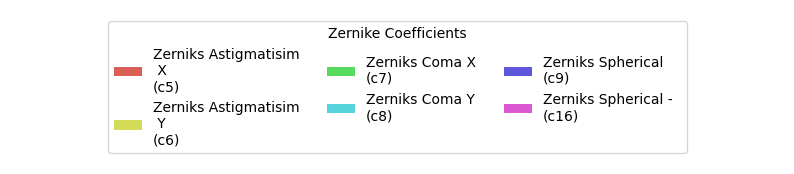

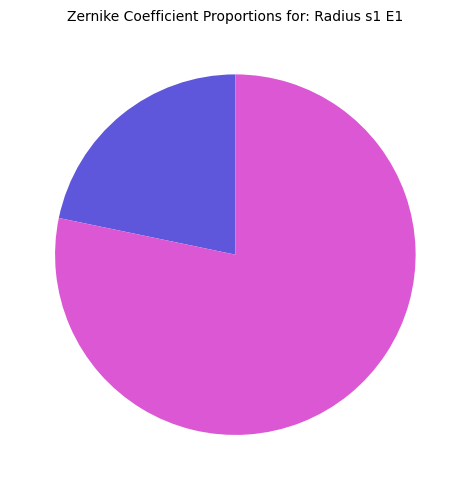

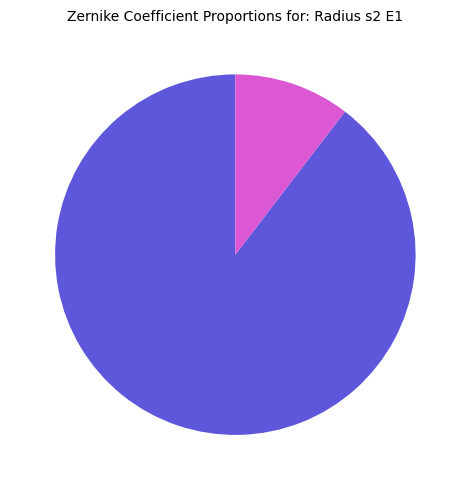

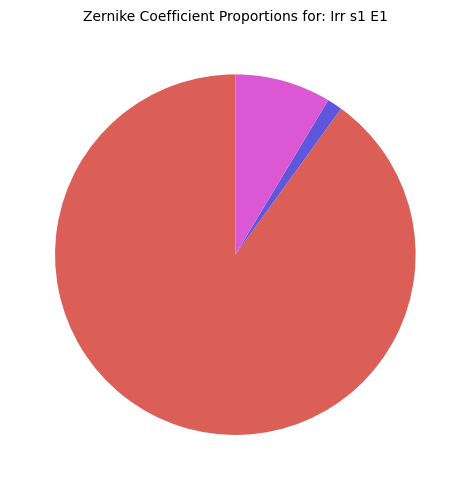

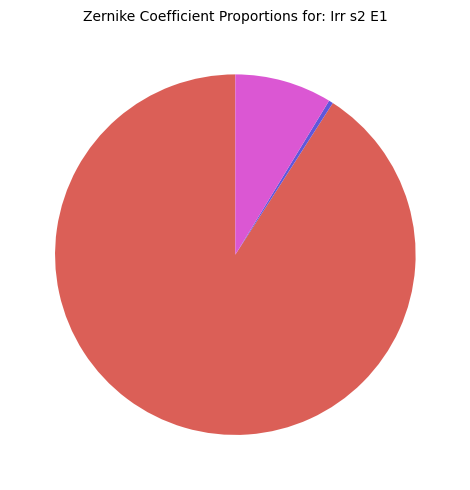

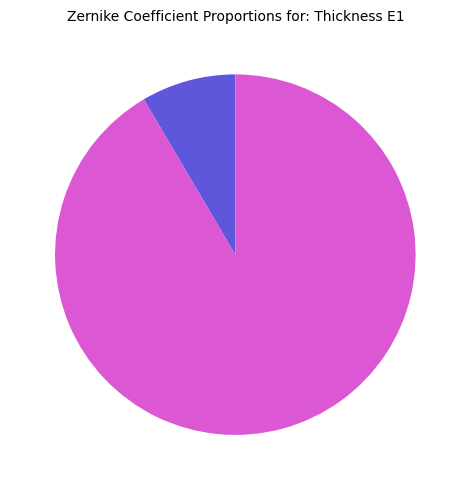

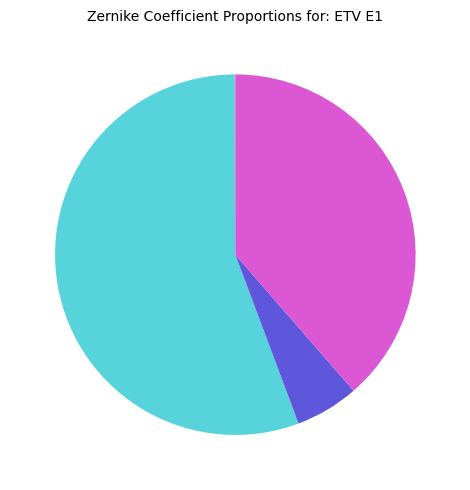

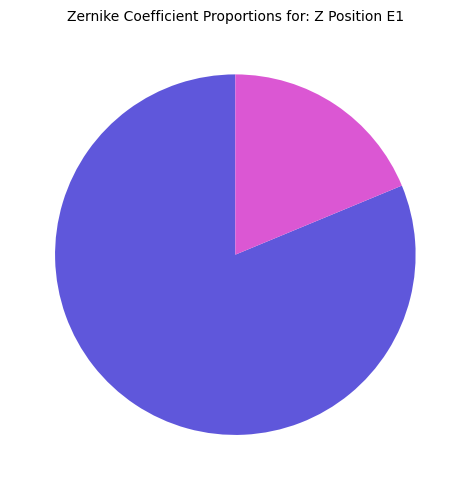

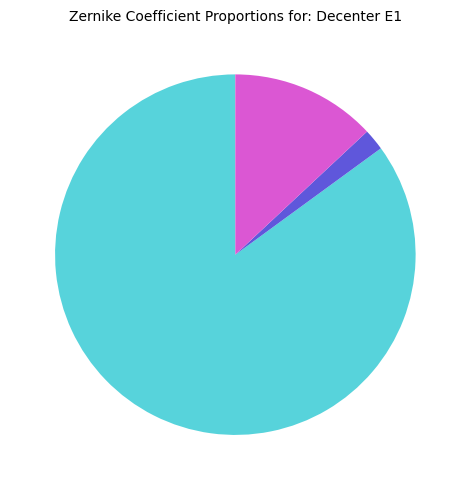

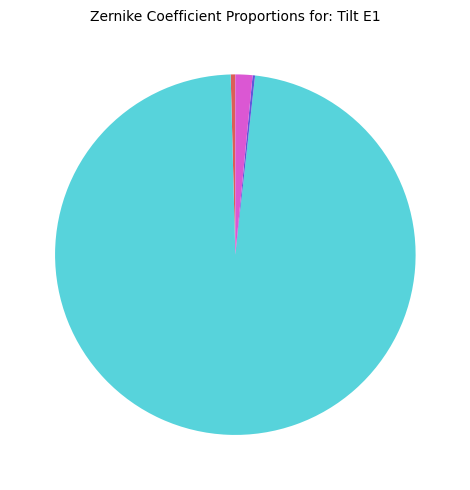

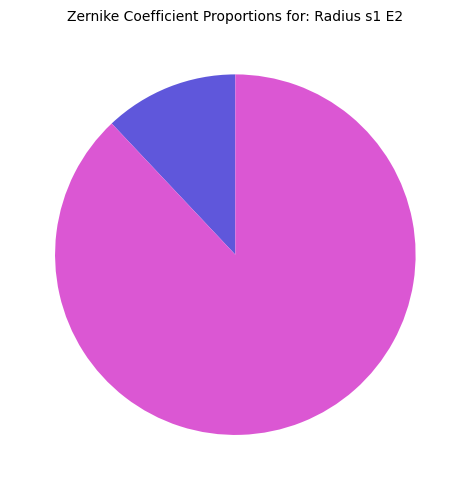

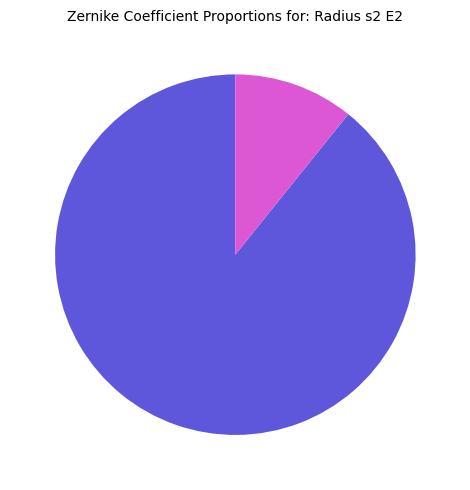

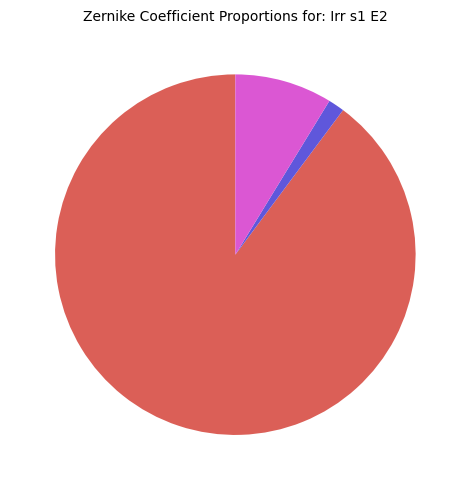

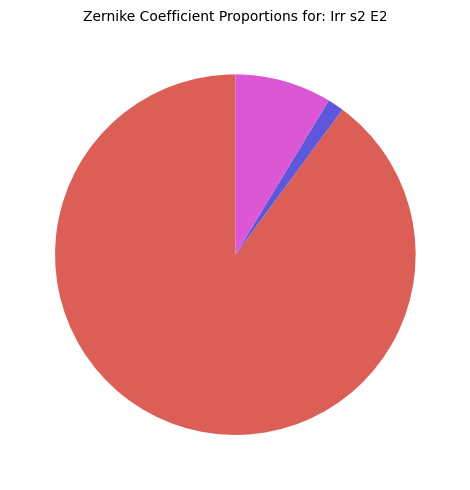

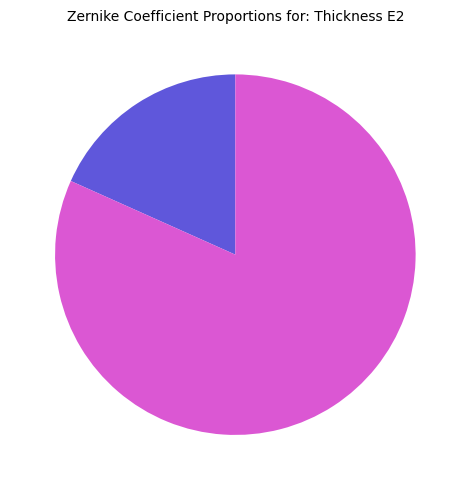

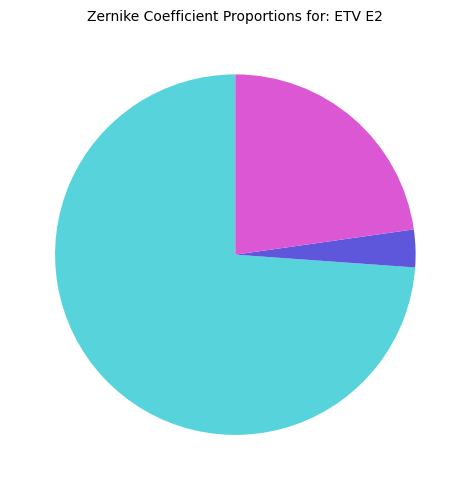

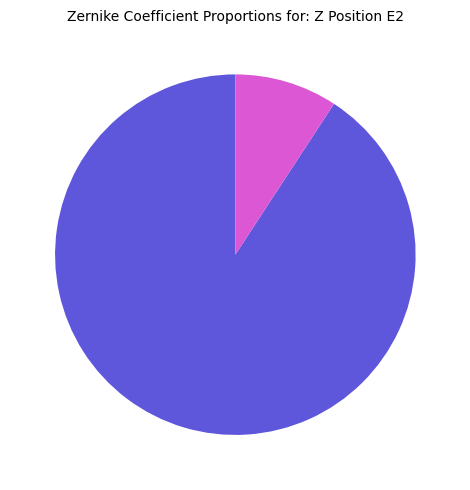

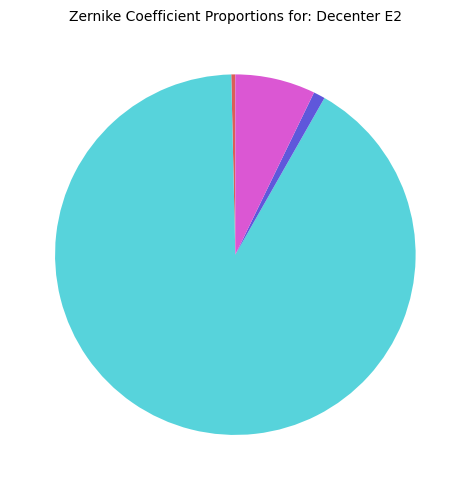

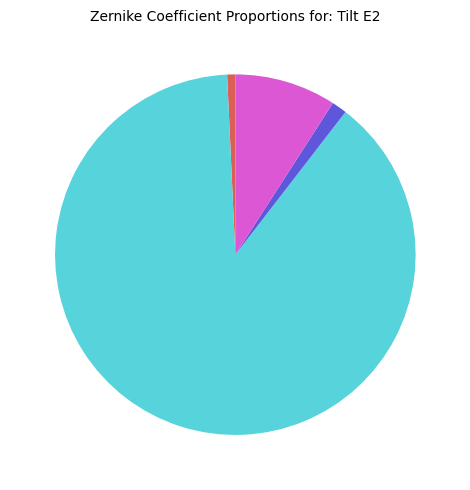

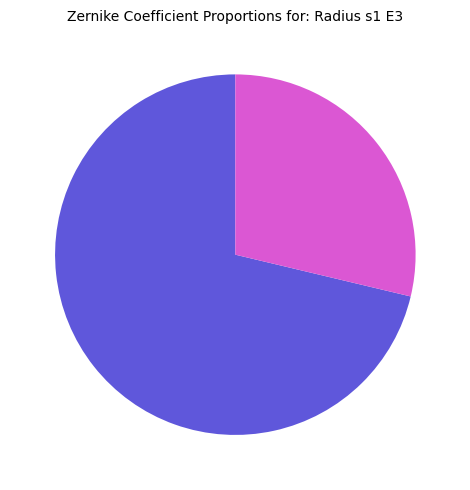

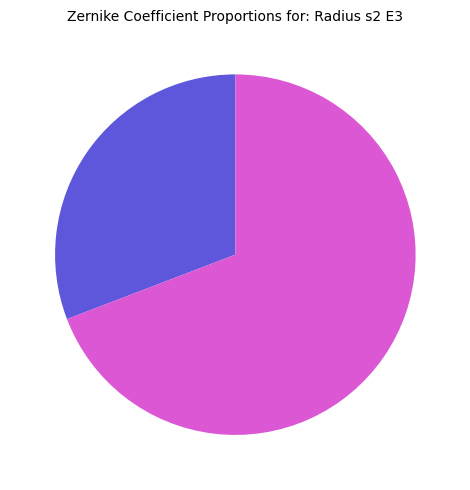

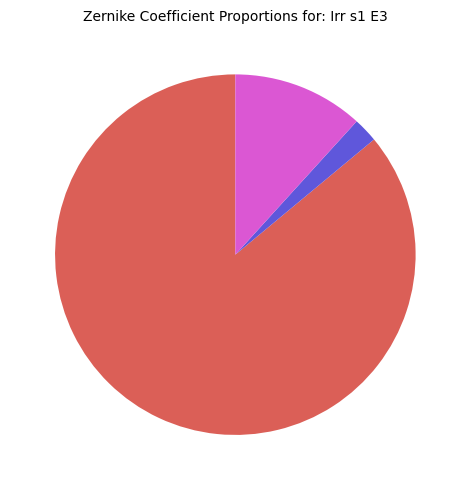

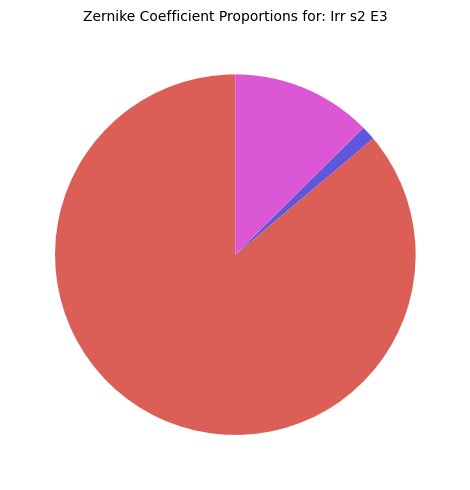

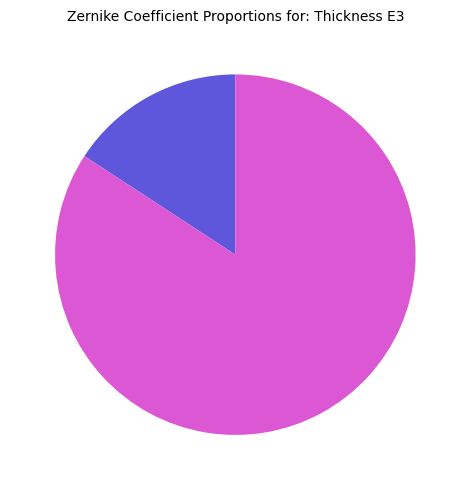

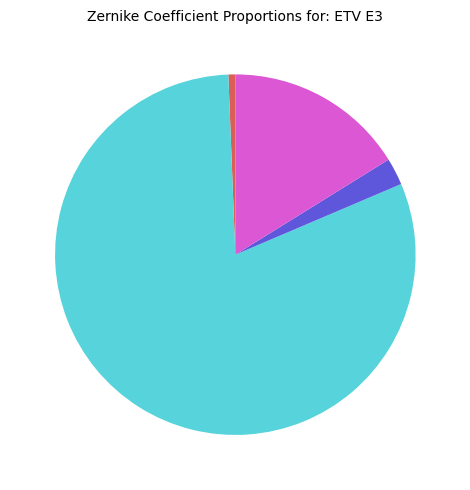

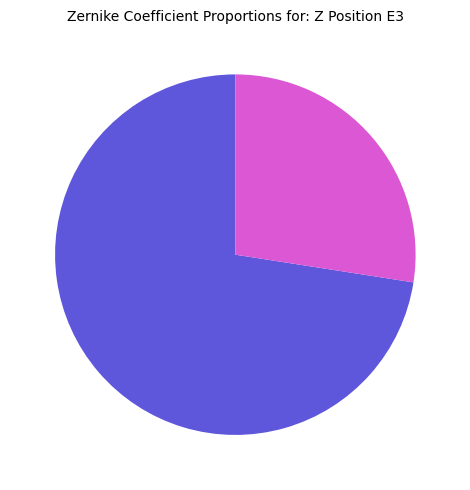

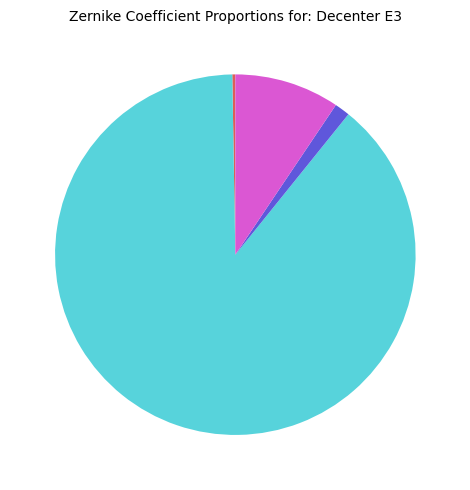

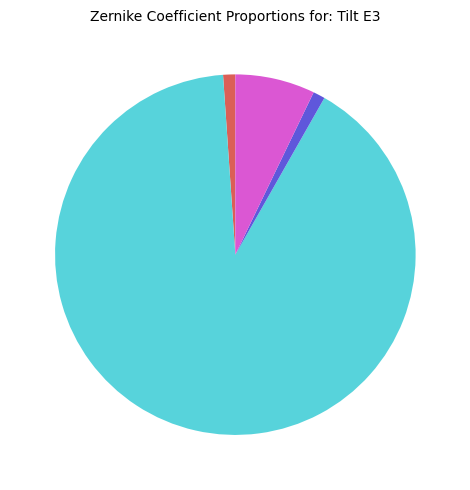

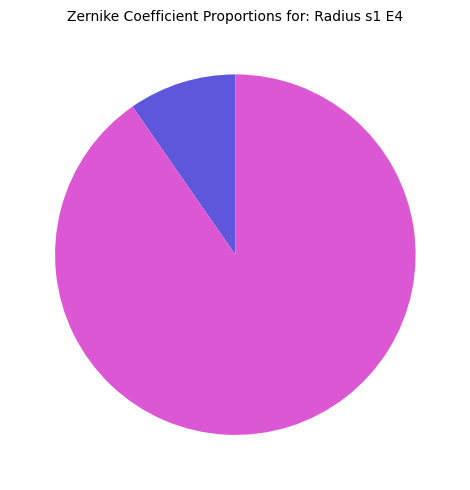

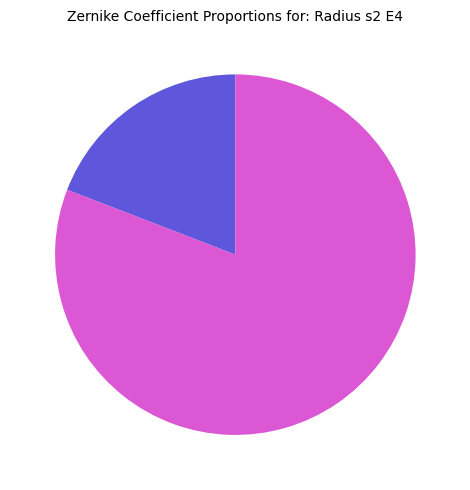

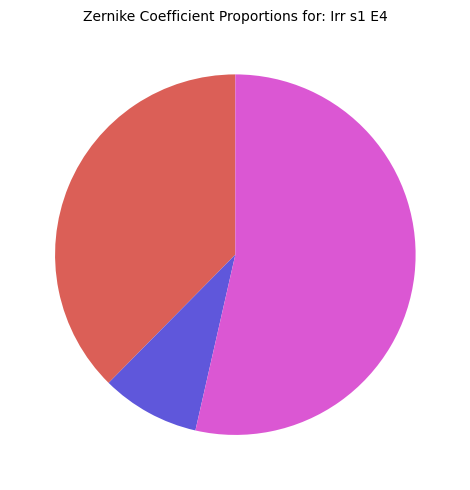

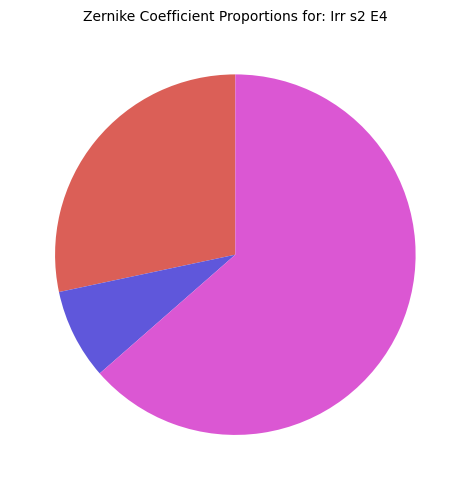

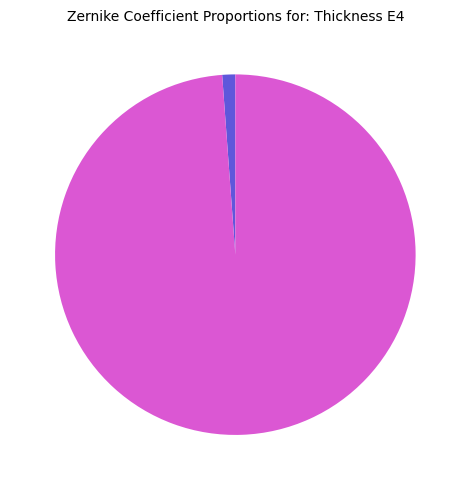

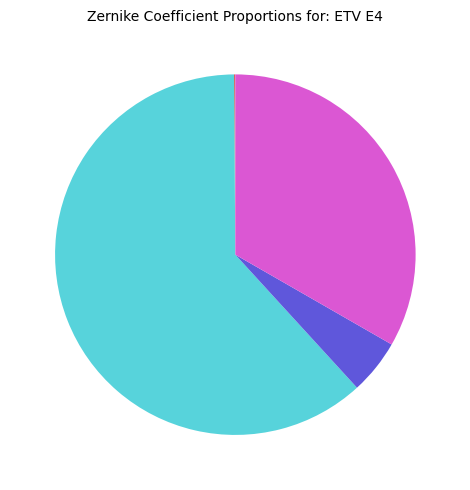

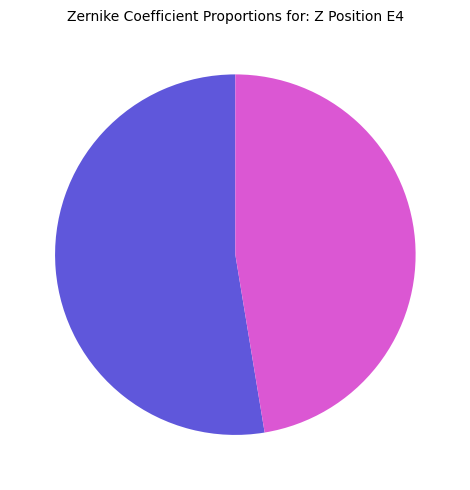

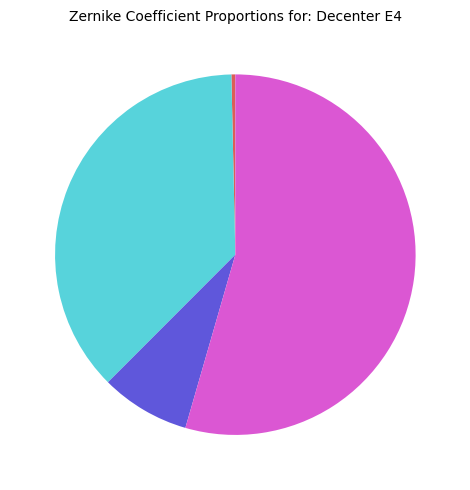

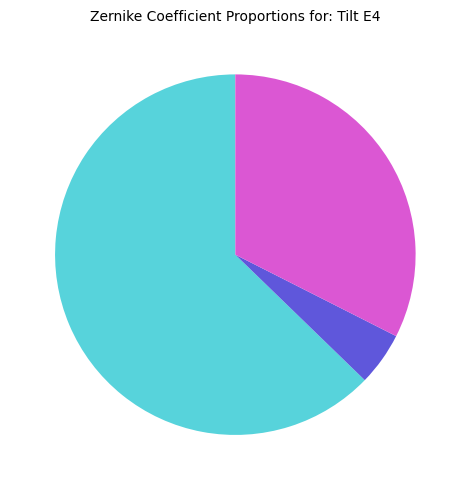

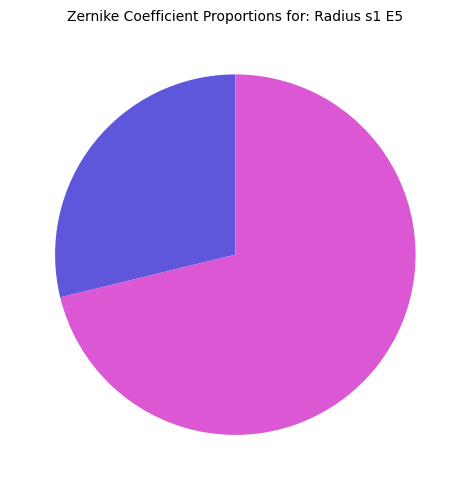

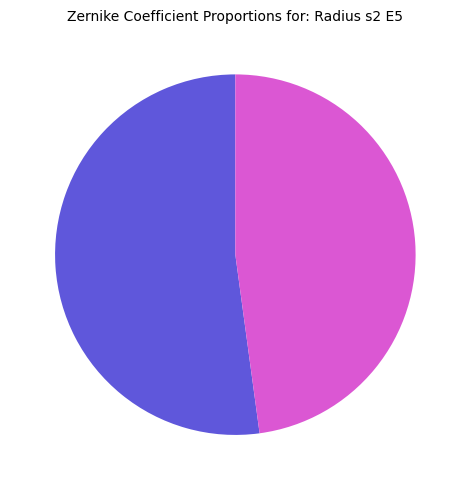

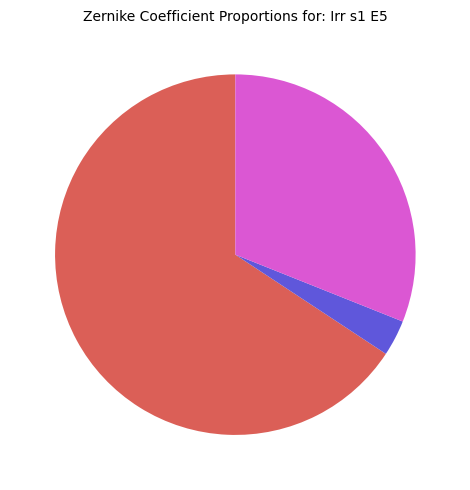

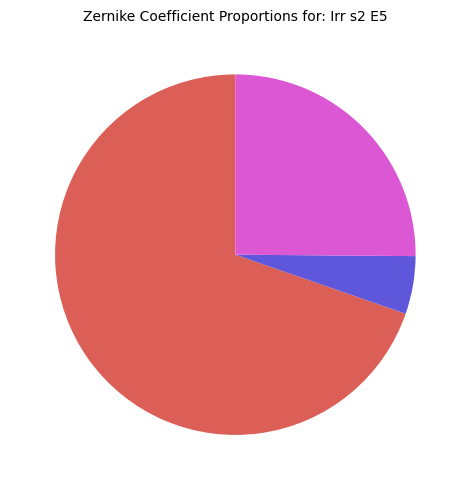

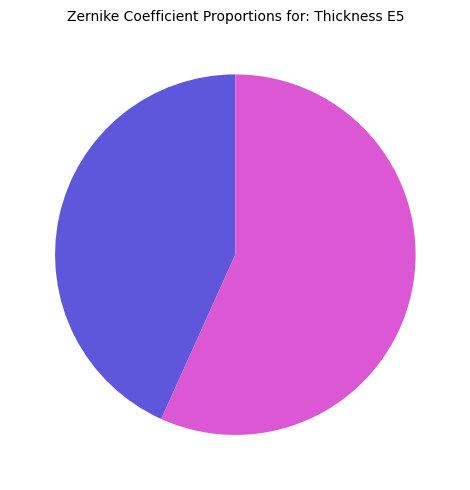

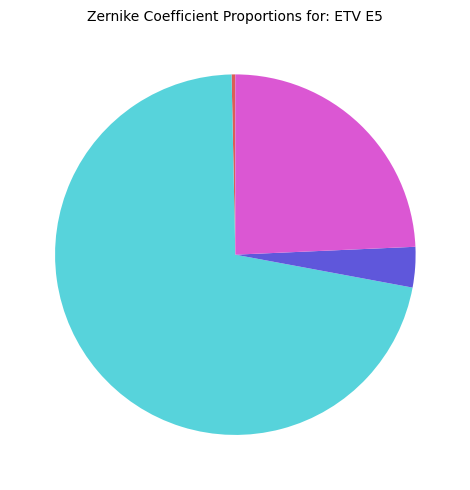

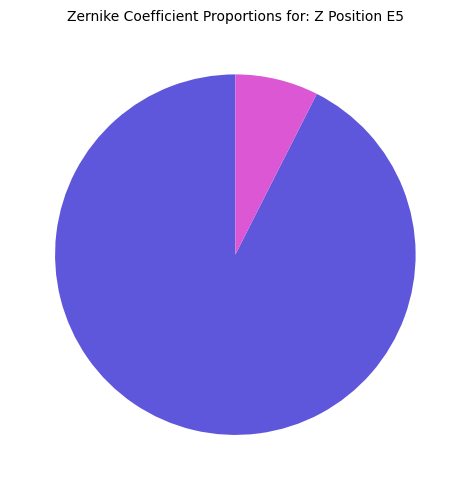

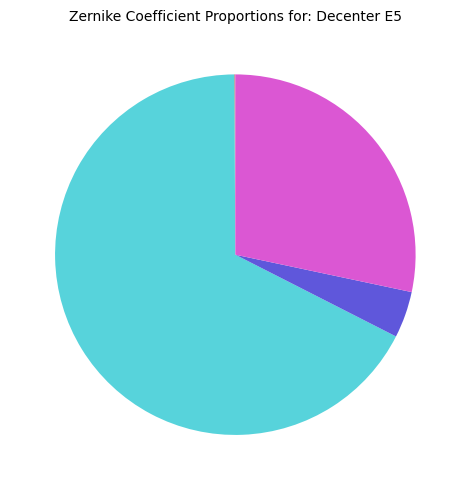

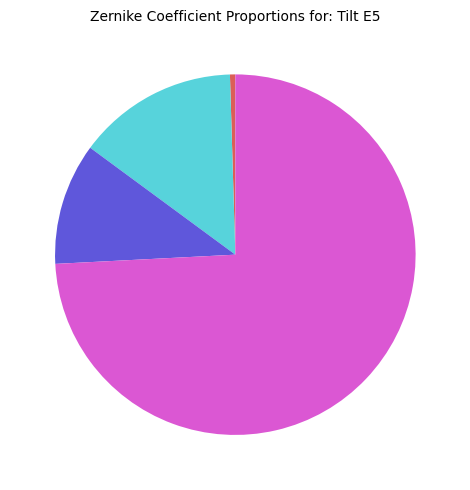

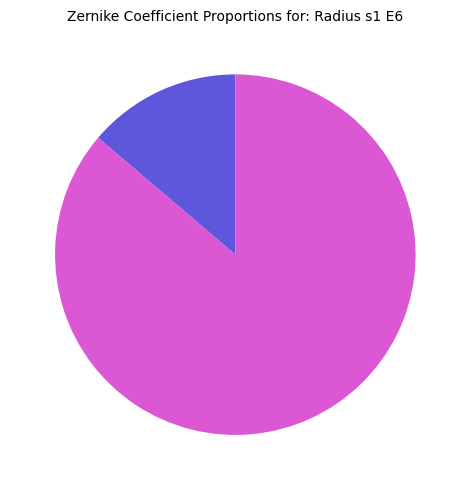

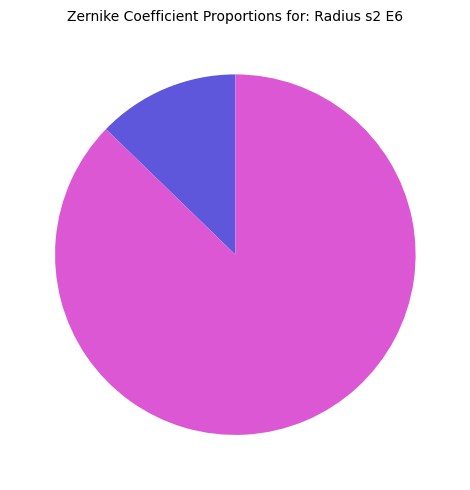

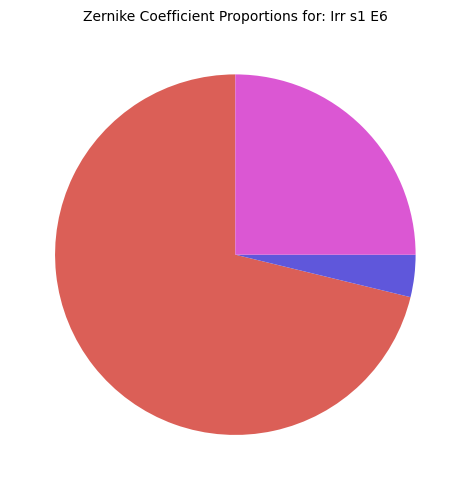

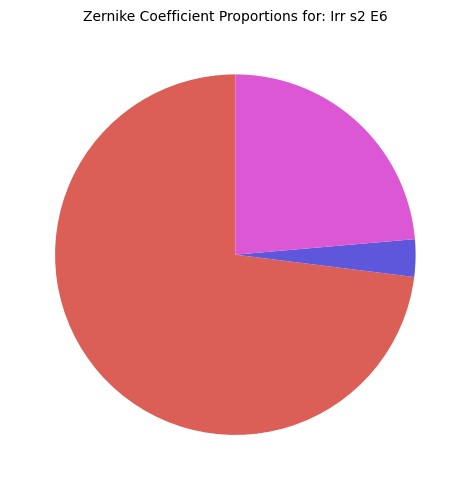

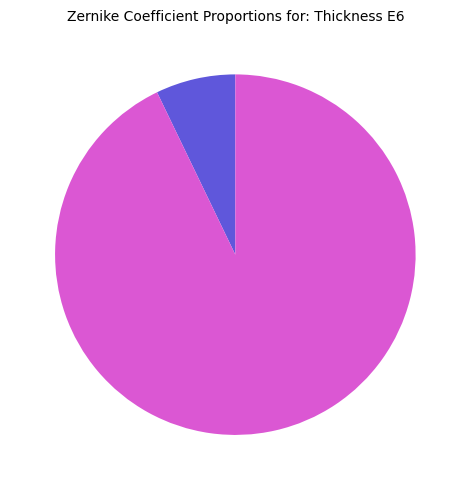

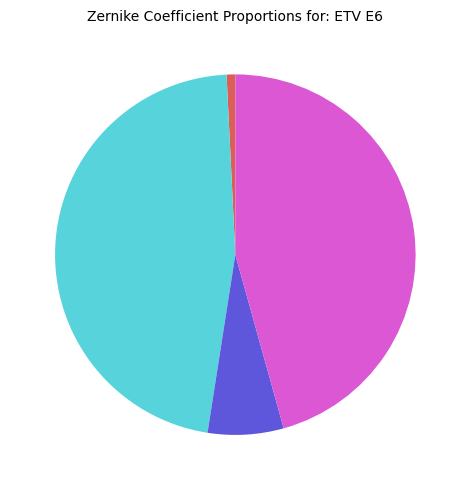

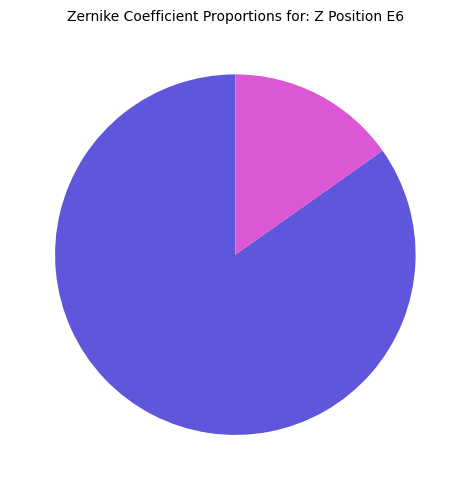

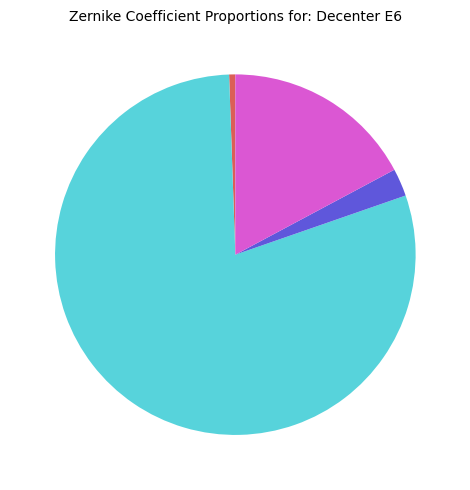

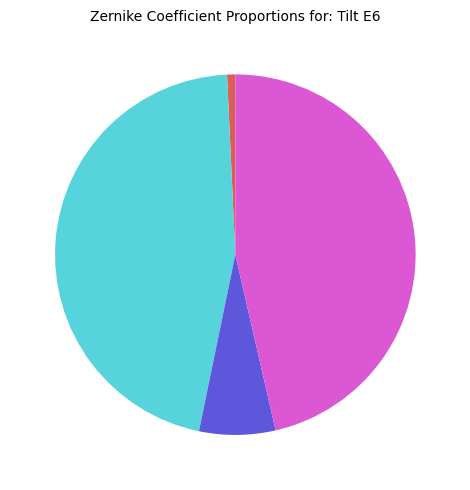

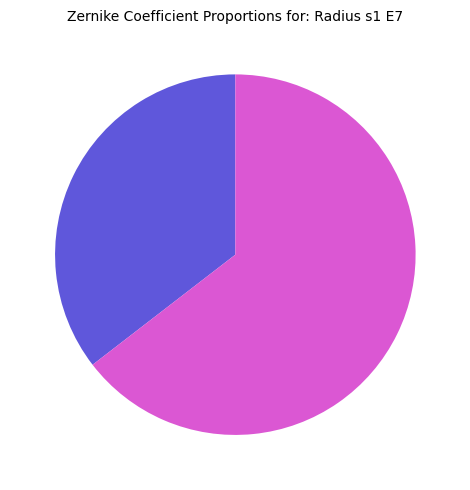

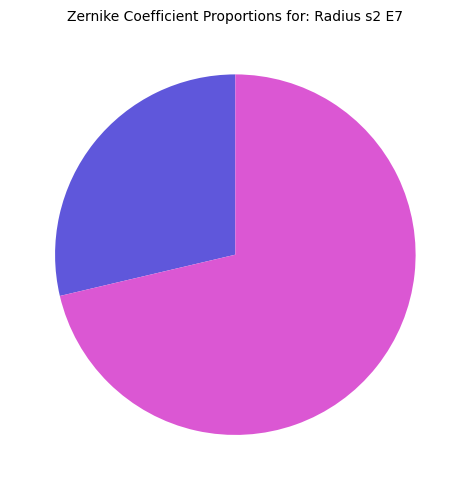

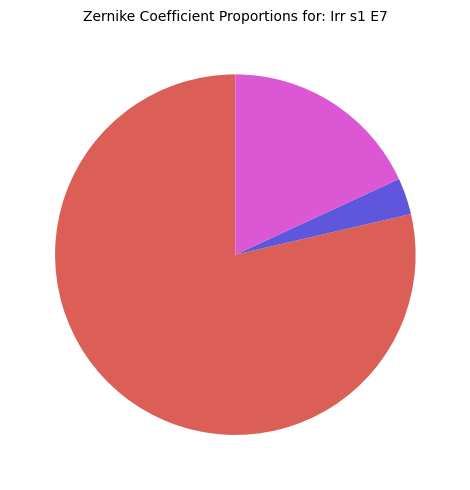

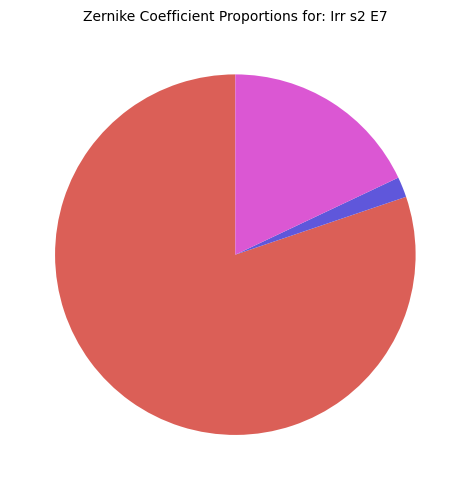

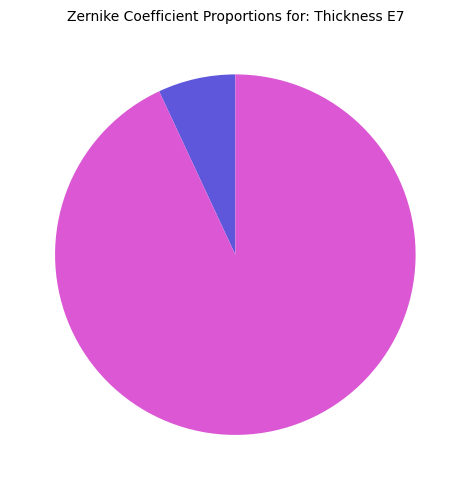

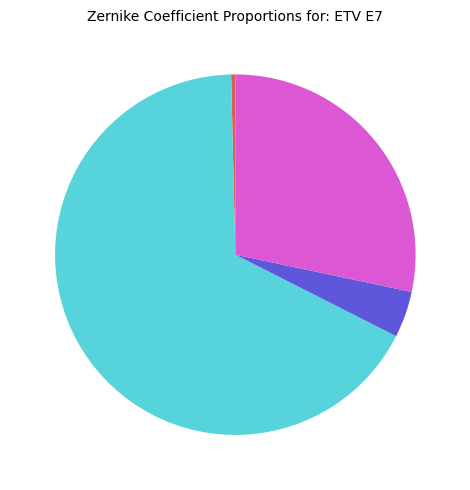

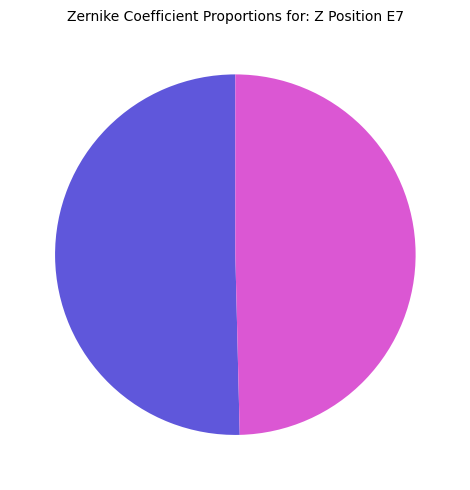

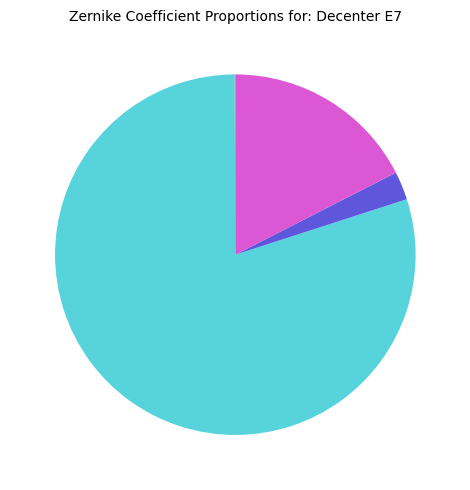

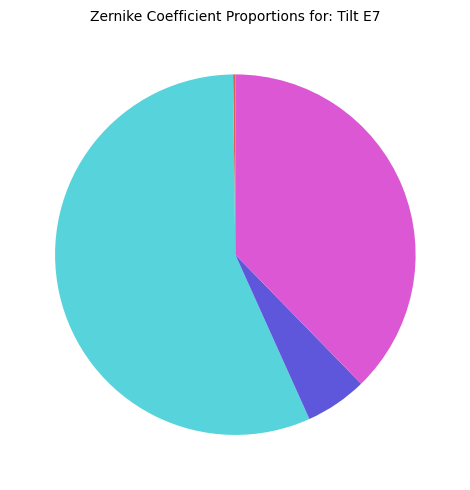

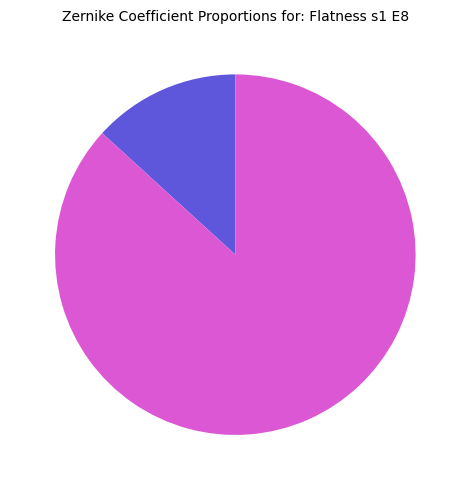

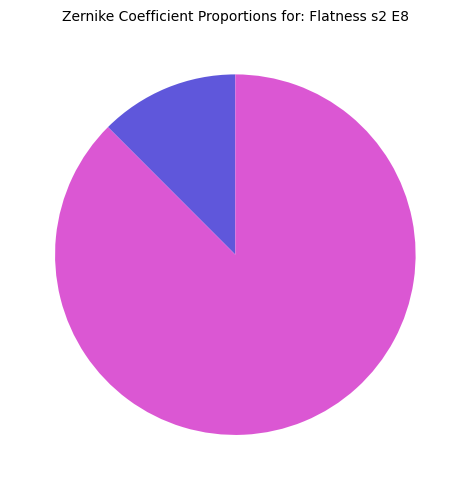

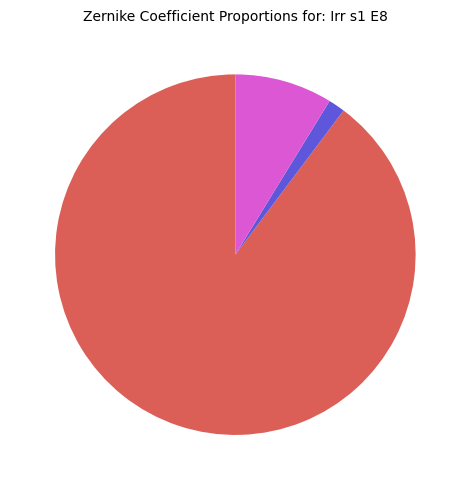

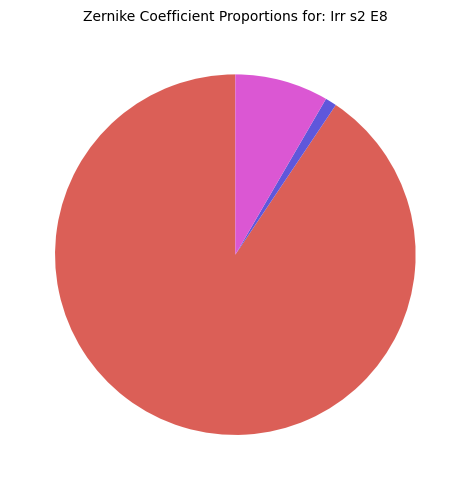

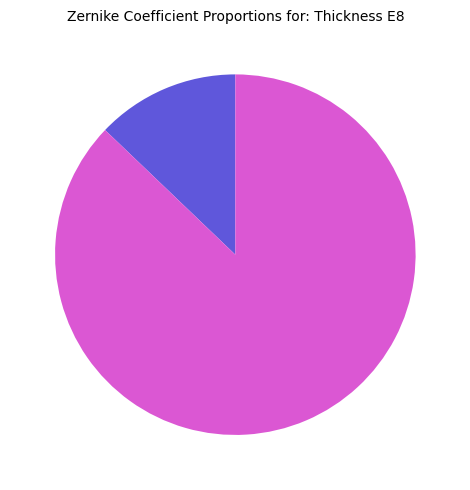

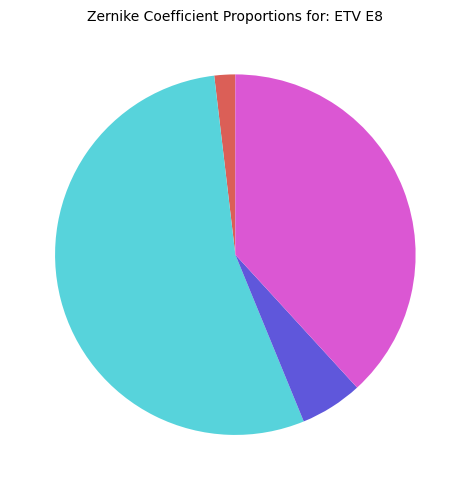

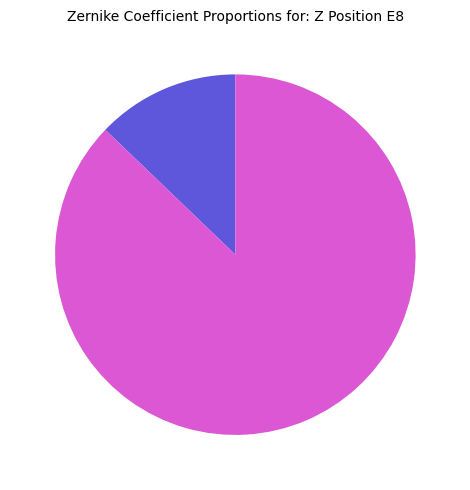

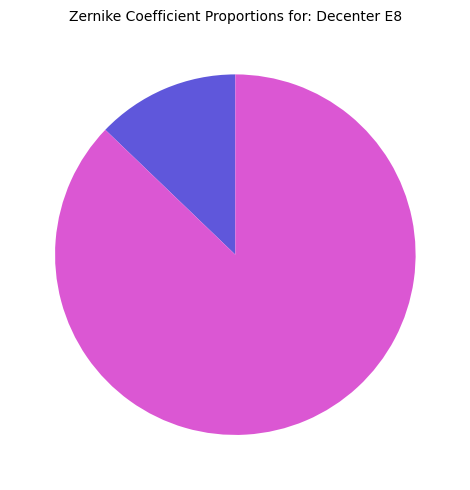

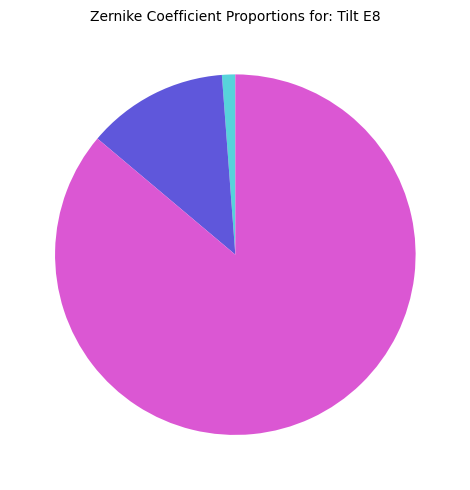

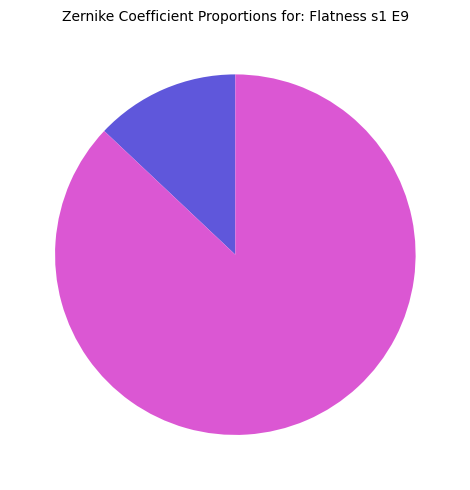

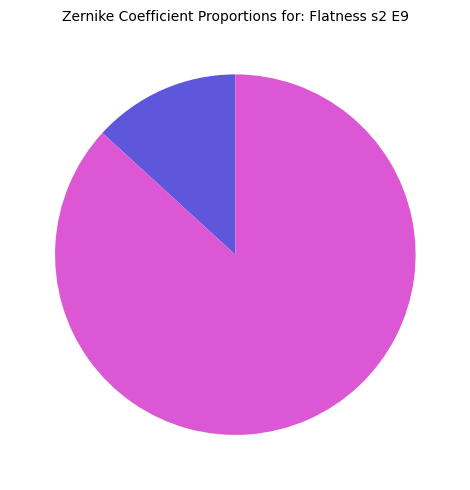

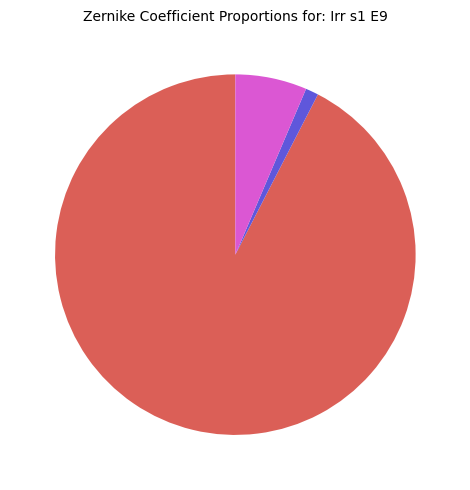

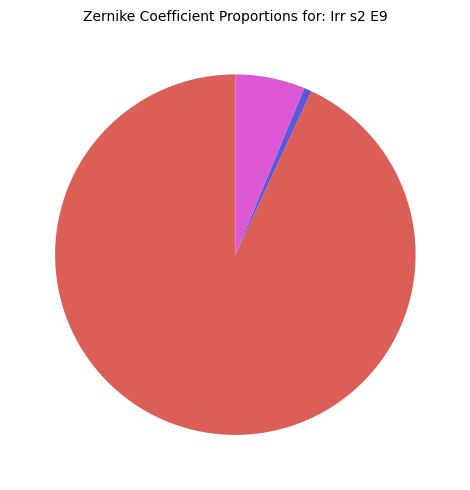

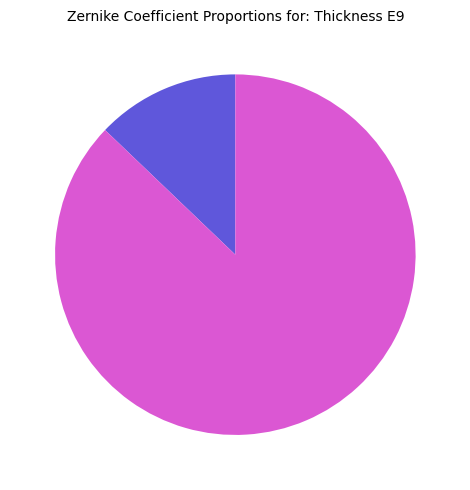

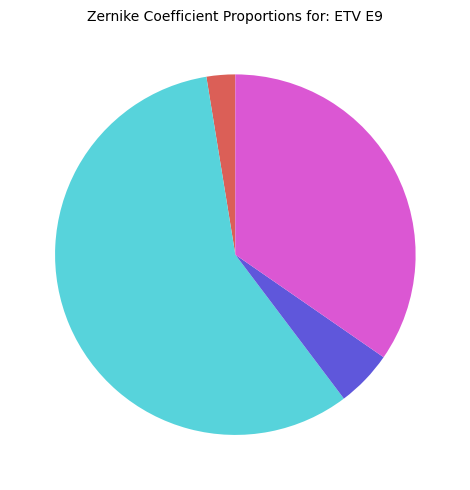

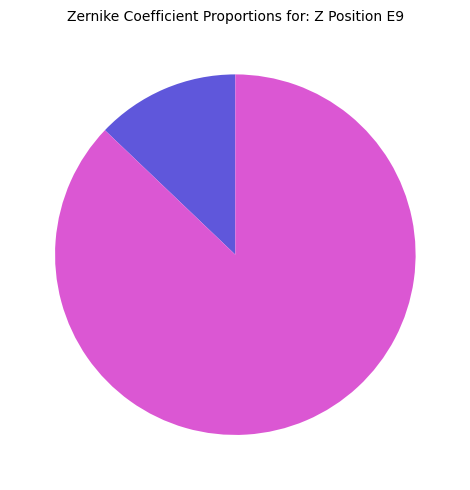

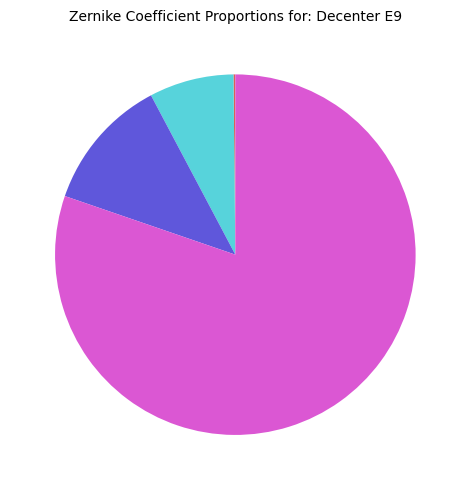

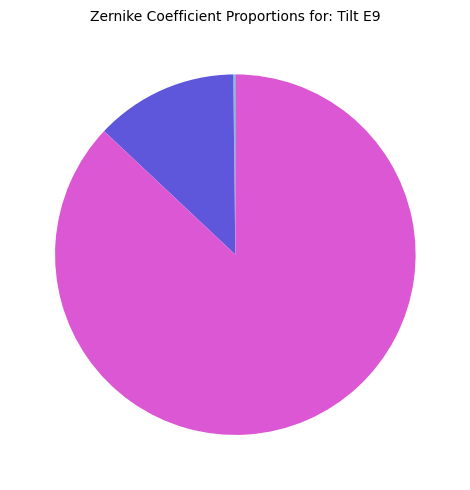

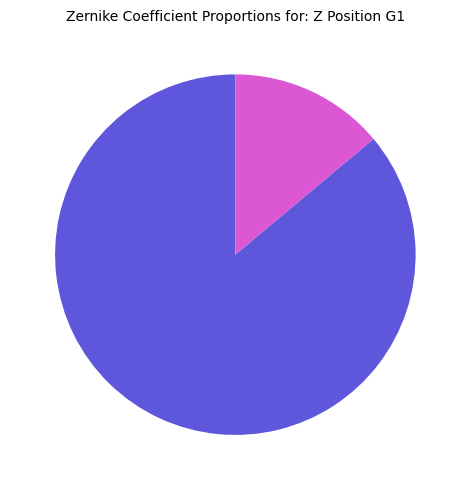

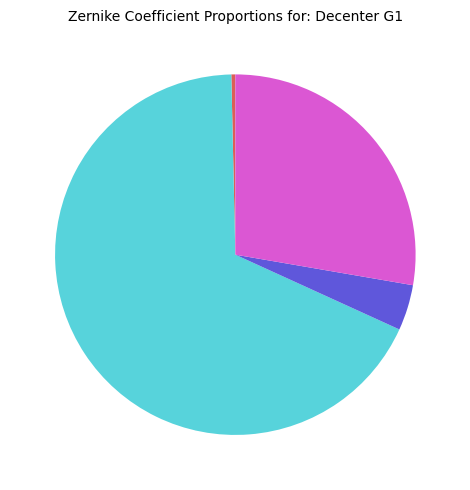

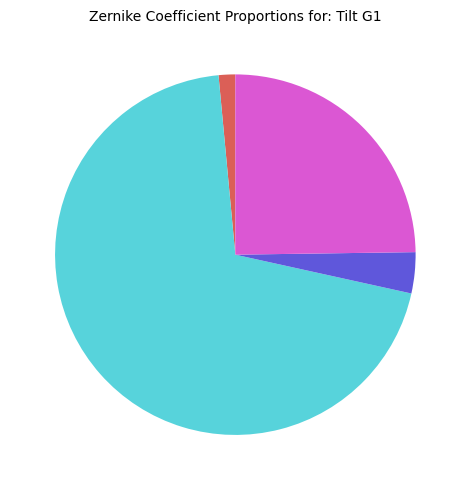

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust the figure size to make the pies smaller
plt.rcParams['figure.figsize'] = (5, 5) # Smaller figure size for each pie chart

# Define the Zernike coefficient columns with the correct name from the DataFrame
zernike_cols_only = [
    'Zerniks Astigmatisim\n X\n(c5)',
    'Zerniks Astigmatisim\n Y\n(c6)',
    'Zerniks Coma X\n(c7)',
    'Zerniks Coma Y\n(c8)',
    'Zerniks Spherical \n(c9)',
    'Zerniks Spherical -  \n(c16)'
]

# Create a consistent color map for the Zernike coefficients
colors = sns.color_palette("hls", len(zernike_cols_only))
color_map = {coeff: color for coeff, color in zip(zernike_cols_only, colors)}

# Create a single figure for the legend at the beginning
fig_legend = plt.figure(figsize=(10, 2))
patches = [plt.Rectangle((0, 0), 1, 1, fc=color_map[coeff]) for coeff in zernike_cols_only]
plt.legend(patches, zernike_cols_only, title="Zernike Coefficients", loc='center', ncol=3)
plt.axis('off')  # Hide the axes
plt.show()

# Get unique Parameter Names from the normalized data
unique_param_names_normalized = df_zernike_normalized_z2_0['Parameter Name '].unique()

# Generate a pie chart for each group of absolute normalized data
for i, param_name in enumerate(unique_param_names_normalized):
    # Filter the melted DataFrame for the current Parameter Name
    df_group_normalized = df_melted_normalized_z2_0[df_melted_normalized_z2_0['Parameter Name '].isin([param_name])].copy()

    # Get the values and labels for the pie chart
    pie_values = df_group_normalized['Absolute Normalized Value']
    pie_labels = df_group_normalized['Zernike Coefficient']
    pie_colors = [color_map[label] for label in pie_labels]

    plt.figure() # A new figure for each plot
    # Create the pie chart without labels and percentages
    plt.pie(pie_values, labels=None, autopct=None, startangle=90, colors=pie_colors)

    # Add a title with the Parameter Name in a smaller font
    plt.title(f'Zernike Coefficient Proportions for: {param_name}', fontsize=10)

    plt.tight_layout()
    plt.show()

**notice that similar error types (like irr S1 E1, irr S2 E1, etc.) have similar coefficient distribution**

# Task
Analyze the dominant Zernike coefficients for the upper quartile of 'Parameter Error' for each 'Parameter Name' where 'EFL _z2' is 1, using the data in "df_all_errors_with_zernike.csv". Visualize the results using pie charts for each 'Parameter Name', showing the proportion of each Zernike coefficient after row-wise normalization. Compare these findings to the analysis of the lower quartile if available.

## Filter data for efl = z2

### Subtask:
Create a subset of the DataFrame where 'EFL _z2' is 1.


**Reasoning**:
Select the rows where 'EFL _z2' is 1 and store them in a new dataframe, then display the head.



In [ ]:
# Select the rows for which the value in the 'EFL _z2' is 1.
df_efl_z2_1 = df[df['EFL _z2'] == 0].copy()
print("Filtered data for EFL _z2 = 0:")
display(df_efl_z2_1.head())

Filtered data for EFL _z2 = 0:


Parameter Name   Parameter Error  Zerniks Astigmatisim\n X\n(c5)  \
0    Radius s1 E1          -0.0100                    4.171001e-14   
2    Radius s1 E1          -0.0050                    3.134720e-13   
4    Radius s1 E1          -0.0010                   -6.168355e-13   
6    Radius s1 E1          -0.0005                    9.622367e-13   
8    Radius s1 E1           0.0005                    1.292319e-12   

   Zerniks Astigmatisim\n Y\n(c6)  Zerniks Coma X\n(c7)  Zerniks Coma Y\n(c8)  \
0                    6.586106e-13         -8.244971e-13         -7.915587e-13   
2                    1.163477e-12         -2.550733e-13         -1.066010e-13   
4                    2.562663e-13          1.866215e-12          1.465481e-12   
6                    4.339006e-13         -2.957465e-12         -3.876645e-12   
8                   -4.120479e-12         -1.334242e-12          2.175823e-12   

   Zerniks Spherical \n(c9)  Zerniks Spherical -  \n(c16)  MTF 3.39 mic  \
0                  0.007998                     -0.000576      0.642350   
2                  0.014332                     -0.002505      0.564213   
4                  0.006091                     -0.001923      0.466548   
6                  0.003309                      0.000102      0.445176   
8                 -0.001988                      0.008347      0.401630   

  Stratification_Key  EFL _z2  
0    Radius s1 E1_z1        0  
2    Radius s1 E1_z1        0  
4    Radius s1 E1_z1        0  
6    Radius s1 E1_z1        0  
8    Radius s1 E1_z1        0

# Task
Analyze the dominant Zernike coefficients for the upper quartile of 'Parameter Error' for each 'Parameter Name' where 'EFL _z2' is 0. Visualize the results using pie charts.

## Filter data for efl = z1

### Subtask:
Ensure we are working with the subset of the DataFrame where 'EFL _z2' is 0 (as done previously).


**Reasoning**:
Find the unique 'Parameter Name' values in the filtered dataframe (EFL _z2 = 1) to understand the different error types present in this subset.



In [ ]:
# Find the unique values in the column 'Parameter Name' for the subset where EFL _z2 is 1
unique_param_names_z2_1 = df_efl_z2_1['Parameter Name '].unique()
print("\nUnique 'Parameter Name' values where EFL _z2 = 1:")
print(unique_param_names_z2_1)
print(f"Number of unique 'Parameter Name' values: {len(unique_param_names_z2_1)}")


Unique 'Parameter Name' values where EFL _z2 = 1:
['Radius s1 E1' 'Radius s2 E1' 'Irr s1 E1' 'Irr s2 E1' 'Thickness E1'
 'ETV E1' 'Z Position E1' 'Decenter E1' 'Tilt E1' 'Radius s1 E2'
 'Radius s2 E2' 'Irr s1 E2' 'Irr s2 E2' 'Thickness E2' 'ETV E2'
 'Z Position E2' 'Decenter E2' 'Tilt E2' 'Radius s1 E3' 'Radius s2 E3'
 'Irr s1 E3' 'Irr s2 E3' 'Thickness E3' 'ETV E3' 'Z Position E3'
 'Decenter E3' 'Tilt E3' 'Radius s1 E4' 'Radius s2 E4' 'Irr s1 E4'
 'Irr s2 E4' 'Thickness E4' 'ETV E4' 'Z Position E4' 'Decenter E4'
 'Tilt E4' 'Radius s1 E5' 'Radius s2 E5' 'Irr s1 E5' 'Irr s2 E5'
 'Thickness E5' 'ETV E5' 'Z Position E5' 'Decenter E5' 'Tilt E5'
 'Radius s1 E6' 'Radius s2 E6' 'Irr s1 E6' 'Irr s2 E6' 'Thickness E6'
 'ETV E6' 'Z Position E6' 'Decenter E6' 'Tilt E6' 'Radius s1 E7'
 'Radius s2 E7' 'Irr s1 E7' 'Irr s2 E7' 'Thickness E7' 'ETV E7'
 'Z Position E7' 'Decenter E7' 'Tilt E7' 'Flatness s1 E8' 'Flatness s2 E8'
 'Irr s1 E8' 'Irr s2 E8' 'Thickness E8' 'ETV E8' 'Z Position E8'
 'Decenter 

**Reasoning**:
Calculate the upper quartile of the absolute 'Parameter Error' for each unique 'Parameter Name' in the filtered dataframe (EFL _z2 = 1).



In [ ]:
# Calculate the upper quartile of the absolute values of 'Parameter Error'
# for each 'Parameter Name' where EFL_z2 is 1
upper_quartile_abs_param_error_z2_1 = df_efl_z2_1['Parameter Error'].abs().groupby(df_efl_z2_1['Parameter Name ']).quantile(0.75)

print("\nUpper Quartile of Absolute 'Parameter Error' for each 'Parameter Name' (EFL _z2 = 1):")
display(upper_quartile_abs_param_error_z2_1)


Upper Quartile of Absolute 'Parameter Error' for each 'Parameter Name' (EFL _z2 = 1):


Parameter Name 
Decenter E1      0.0225
Decenter E2      0.0225
Decenter E3      0.0225
Decenter E4      0.0225
Decenter E5      0.0225
                  ...  
Z Position E6    0.2750
Z Position E7    0.2750
Z Position E8    0.2750
Z Position E9    0.2750
Z Position G1    0.2750
Name: Parameter Error, Length: 84, dtype: float64

**Reasoning**:
Find the rows in the filtered dataframe (EFL _z2 = 1) where the 'Parameter Error' is closest to the calculated upper quartile for each 'Parameter Name'.



In [ ]:
# Find the row in df_efl_z2_1 for each 'Parameter Name'
# where 'Parameter Error' is closest to the upper quartile

# Create an empty list to store the selected rows
closest_rows_list_z2_1 = []
# Iterate through each unique 'Parameter Name'
for param_name in unique_param_names_z2_1:
    # Get the subset of df_efl_z2_1 for the current 'Parameter Name'
    subset_df = df_efl_z2_1[df_efl_z2_1['Parameter Name '] == param_name].copy()

    # Get the corresponding upper quartile value
    quartile_value = upper_quartile_abs_param_error_z2_1.get(param_name)

    if quartile_value is not None:
        # Calculate the absolute difference between 'Parameter Error' and the quartile value
        subset_df['Error_Difference'] = (subset_df['Parameter Error'].abs() - quartile_value).abs()

        # Find the index of the row with the minimum absolute difference
        closest_row_index = subset_df['Error_Difference'].idxmin()

        # Append the index to the list
        closest_rows_list_z2_1.append(closest_row_index)

**Reasoning**:
Create a new dataframe containing only the selected rows closest to the upper quartile for each 'Parameter Name', including the Zernike coefficients, and display the head of the new dataframe.



In [ ]:
# Define the list of Zernike coefficient columns
zernike_cols_only = [
    'Zerniks Astigmatisim\n X\n(c5)',
    'Zerniks Astigmatisim\n Y\n(c6)',
    'Zerniks Coma X\n(c7)',
    'Zerniks Coma Y\n(c8)',
    'Zerniks Spherical \n(c9)',
    'Zerniks Spherical -  \n(c16)'
]

# Select the rows from the original DataFrame using the list of indices
df_selected_rows_z2_1 = df.loc[closest_rows_list_z2_1].copy()

# Add the corresponding upper quartile value by mapping 'Parameter Name'
df_selected_rows_z2_1['Upper_Quartile_Error'] = df_selected_rows_z2_1['Parameter Name '].map(upper_quartile_abs_param_error_z2_1)

# Select the required columns: 'Parameter Name', 'Upper_Quartile_Error', and Zernike cols
final_selected_data_z2_1 = df_selected_rows_z2_1[['Parameter Name ', 'Upper_Quartile_Error'] + zernike_cols_only]

print("Selected Data (Parameter Name, Upper Quartile, Zernike Coefficients) for rows closest to Upper Quartile (EFL _z2 = 1):")
display(final_selected_data_z2_1.head())
print(f"Shape of final selected data: {final_selected_data_z2_1.shape}")

Selected Data (Parameter Name, Upper Quartile, Zernike Coefficients) for rows closest to Upper Quartile (EFL _z2 = 1):


Parameter Name   Upper_Quartile_Error  Zerniks Astigmatisim\n X\n(c5)  \
2     Radius s1 E1               0.00625                    3.134720e-13   
18    Radius s2 E1               0.00625                   -1.324791e-11   
34       Irr s1 E1               1.50000                   -7.141710e-02   
40       Irr s2 E1               1.50000                    7.118620e-02   
44    Thickness E1               0.04250                   -2.455655e-13   

    Zerniks Astigmatisim\n Y\n(c6)  Zerniks Coma X\n(c7)  \
2                     1.163477e-12         -2.550733e-13   
18                    6.917285e-12         -6.872987e-12   
34                    4.585377e-13          3.330588e-13   
40                   -4.036498e-13         -8.644179e-13   
44                   -1.577275e-12          1.834315e-12   

    Zerniks Coma Y\n(c8)  Zerniks Spherical \n(c9)  \
2          -1.066010e-13                  0.014332   
18         -7.104108e-12                 -0.259338   
34         -1.435043e-12                  0.000586   
40         -1.301671e-12                 -0.000198   
44          1.166264e-12                  0.002201   

    Zerniks Spherical -  \n(c16)  
2                      -0.002505  
18                     -0.002857  
34                      0.003419  
40                      0.003406  
44                      0.001441

Shape of final selected data: (84, 8)


**Reasoning**:
Normalize the Zernike coefficients for the selected rows (EFL _z2 = 1) by the maximum absolute Zernike value within each row, and prepare the data for visualization by melting it into a long format.



In [ ]:
# Define the Zernike coefficient columns (excluding MTF for this normalization)
zernike_cols_only = [
    'Zerniks Astigmatisim\n X\n(c5)',
    'Zerniks Astigmatisim\n Y\n(c6)',
    'Zerniks Coma X\n(c7)',
    'Zerniks Coma Y\n(c8)',
    'Zerniks Spherical \n(c9)',
    'Zerniks Spherical -  \n(c16)'
]

# Select only the Zernike columns for row-wise normalization
df_zernike_z2_1 = final_selected_data_z2_1[zernike_cols_only].copy()

# Calculate the maximum absolute value for each row across Zernike columns
# Use axis=1 for row-wise operation
max_abs_zernike_per_row_z2_1 = df_zernike_z2_1.abs().max(axis=1)

# Normalize each Zernike coefficient by the maximum absolute value in its row
# Avoid division by zero if a row has all zero Zernike coefficients
df_zernike_normalized_z2_1 = df_zernike_z2_1.divide(max_abs_zernike_per_row_z2_1, axis=0)

# Add 'Parameter Name ' back to the normalized DataFrame for plotting
df_zernike_normalized_z2_1['Parameter Name '] = final_selected_data_z2_1['Parameter Name ']

print("Normalized Zernike Coefficients (row-wise max absolute value) for EFL _z2 = 1:")
display(df_zernike_normalized_z2_1.head())

# Prepare normalized data for visualization
# Melt the normalized DataFrame
df_melted_normalized_z2_1 = df_zernike_normalized_z2_1.melt(
    id_vars=['Parameter Name '],
    value_vars=zernike_cols_only,
    var_name='Zernike Coefficient',
    value_name='Normalized Value'
)

# Take the absolute value of the normalized Zernike coefficients
df_melted_normalized_z2_1['Absolute Normalized Value'] = df_melted_normalized_z2_1['Normalized Value'].abs()

print("\nMelted Normalized Zernike Coefficients for EFL _z2 = 1:")
display(df_melted_normalized_z2_1.head())

Normalized Zernike Coefficients (row-wise max absolute value) for EFL _z2 = 1:


Zerniks Astigmatisim\n X\n(c5)  Zerniks Astigmatisim\n Y\n(c6)  \
2                     2.187202e-11                    8.117980e-11   
18                   -5.108357e-11                    2.667286e-11   
34                   -1.000000e+00                    6.420559e-12   
40                    1.000000e+00                   -5.670338e-12   
44                   -1.115517e-10                   -7.165003e-10   

    Zerniks Coma X\n(c7)  Zerniks Coma Y\n(c8)  Zerniks Spherical \n(c9)  \
2          -1.779734e-11         -7.437919e-12                  1.000000   
18         -2.650204e-11         -2.739324e-11                 -1.000000   
34          4.663572e-12         -2.009383e-11                  0.008208   
40         -1.214305e-11         -1.828544e-11                 -0.002774   
44          8.332644e-10          5.297925e-10                  1.000000   

    Zerniks Spherical -  \n(c16) Parameter Name   
2                      -0.174771    Radius s1 E1  
18                     -0.011017    Radius s2 E1  
34                      0.047873       Irr s1 E1  
40                      0.047848       Irr s2 E1  
44                      0.654623    Thickness E1


Melted Normalized Zernike Coefficients for EFL _z2 = 1:


Parameter Name              Zernike Coefficient  Normalized Value  \
0    Radius s1 E1  Zerniks Astigmatisim\n X\n(c5)      2.187202e-11   
1    Radius s2 E1  Zerniks Astigmatisim\n X\n(c5)     -5.108357e-11   
2       Irr s1 E1  Zerniks Astigmatisim\n X\n(c5)     -1.000000e+00   
3       Irr s2 E1  Zerniks Astigmatisim\n X\n(c5)      1.000000e+00   
4    Thickness E1  Zerniks Astigmatisim\n X\n(c5)     -1.115517e-10   

   Absolute Normalized Value  
0               2.187202e-11  
1               5.108357e-11  
2               1.000000e+00  
3               1.000000e+00  
4               1.115517e-10

**Reasoning**:
Visualize the proportion of each absolute normalized Zernike coefficient for each 'Parameter Name' where EFL _z2 is 1 using pie charts.



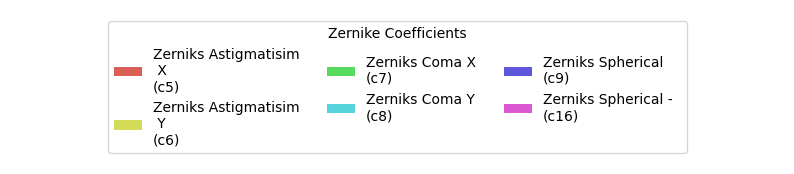

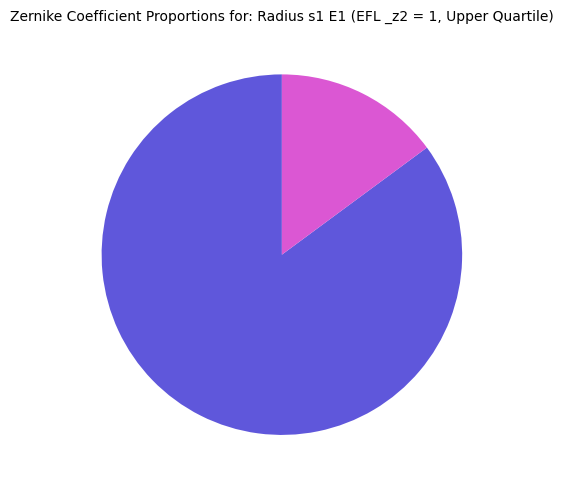

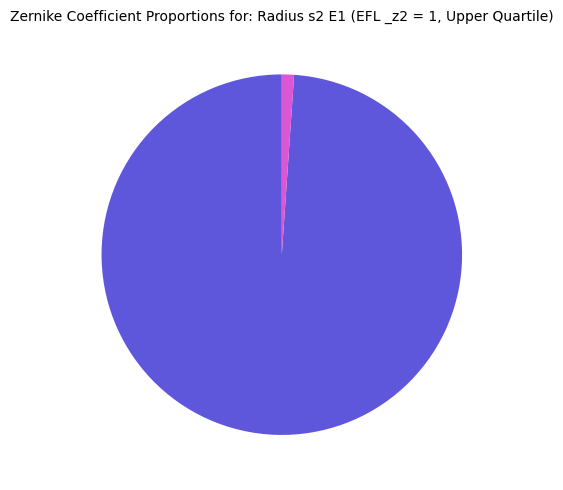

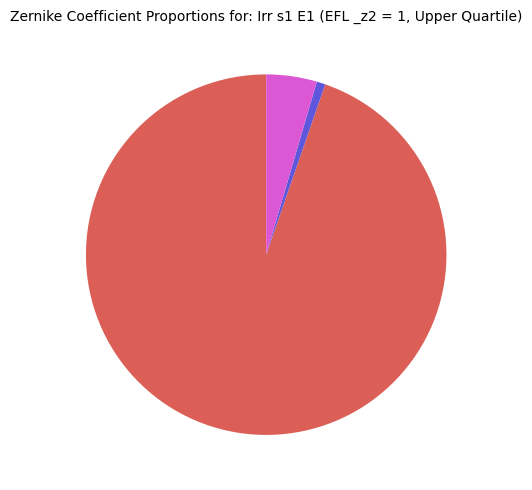

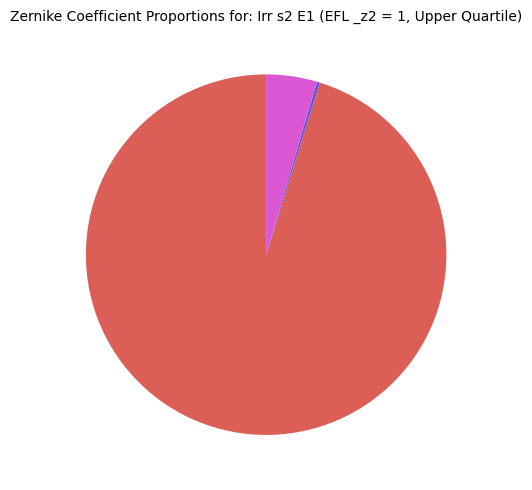

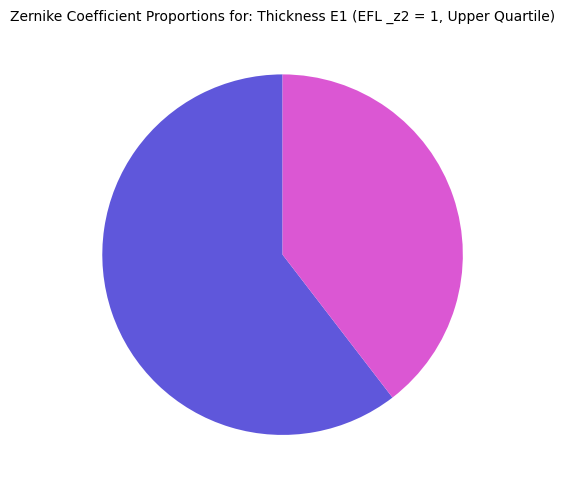

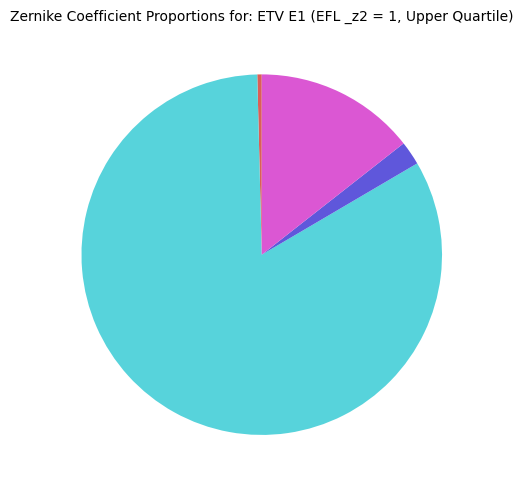

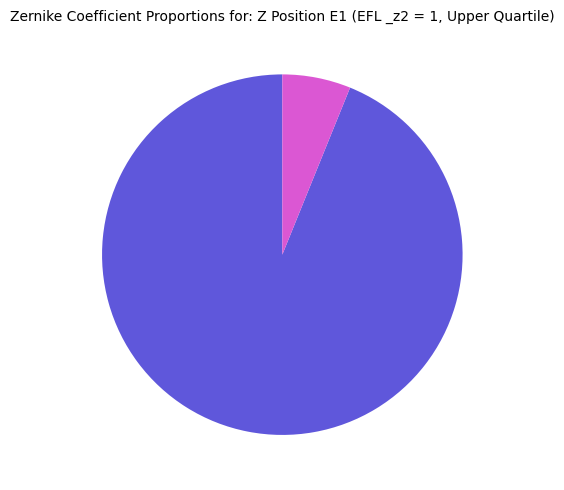

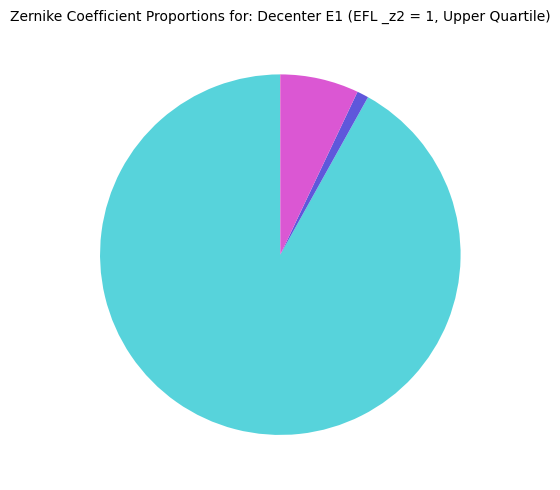

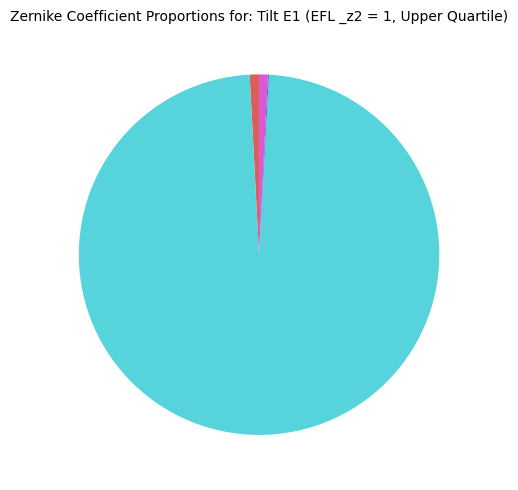

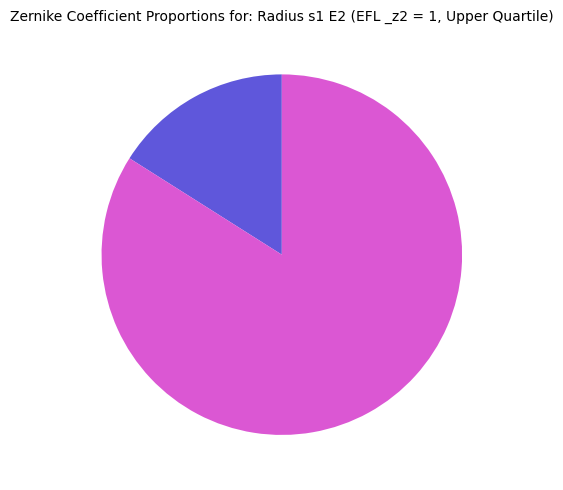

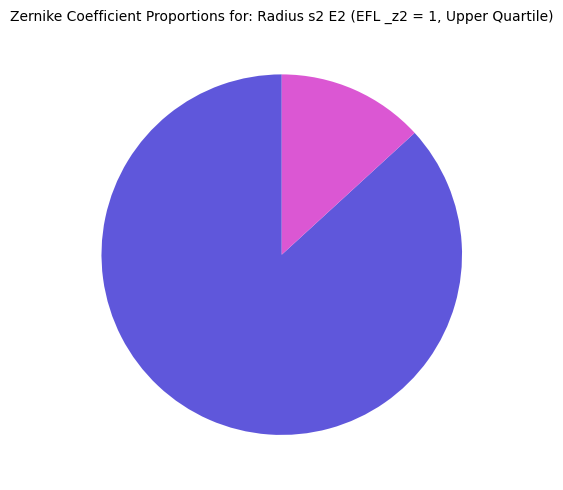

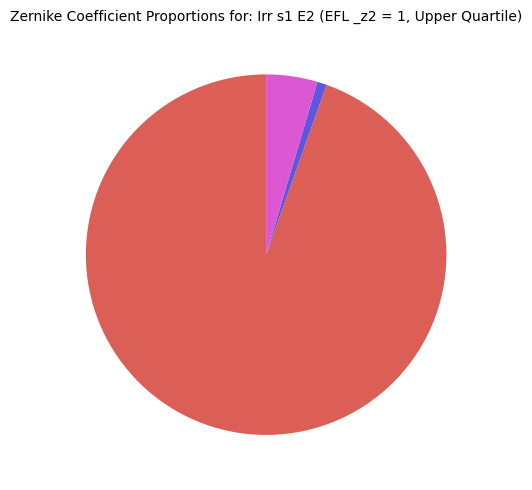

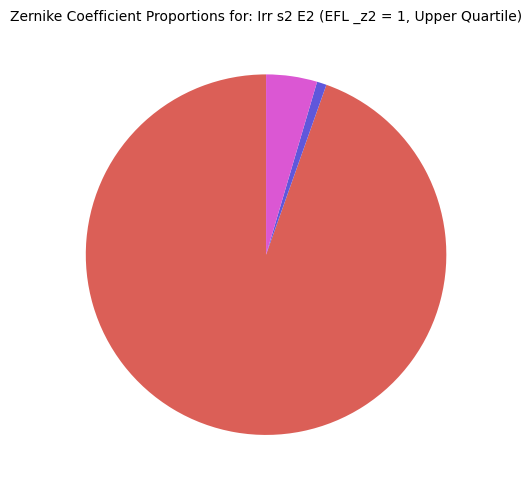

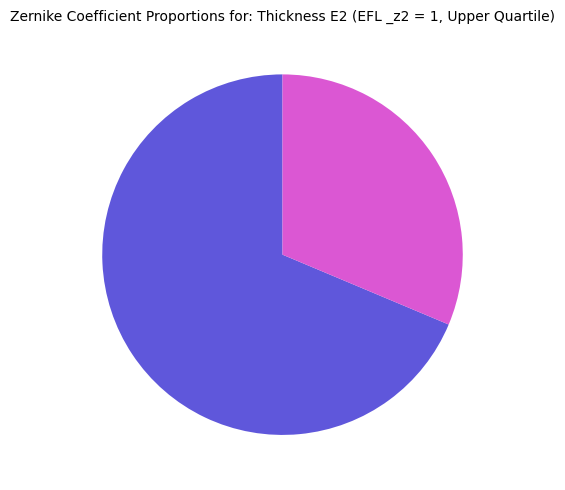

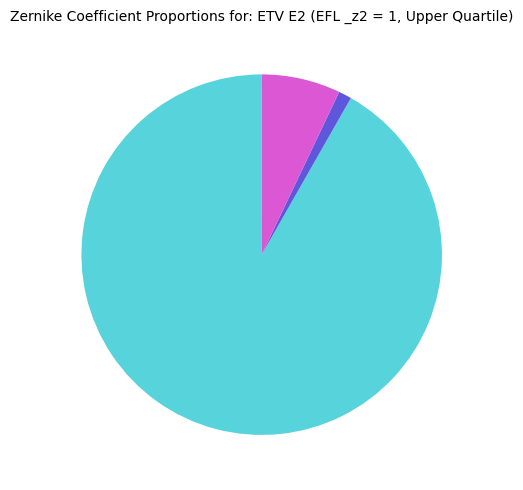

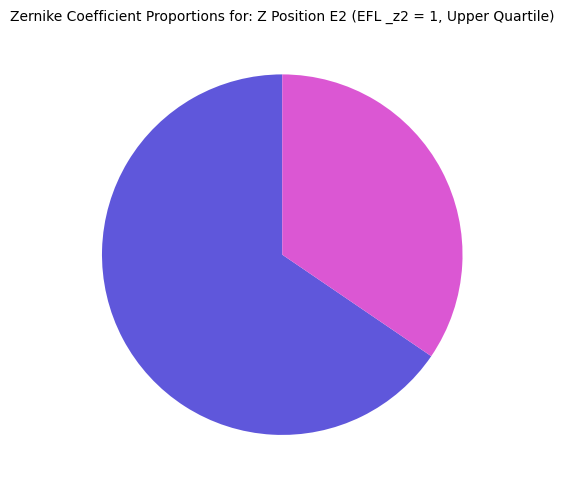

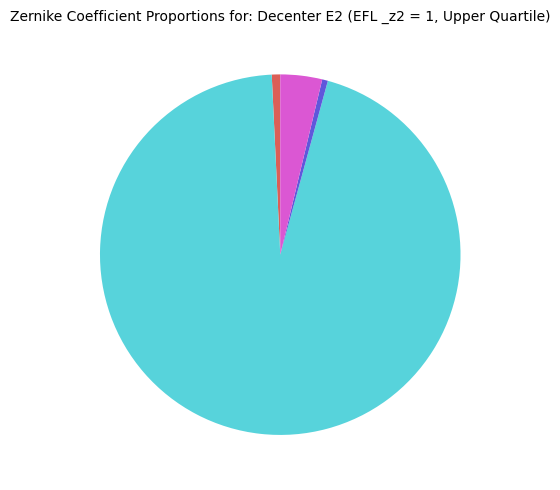

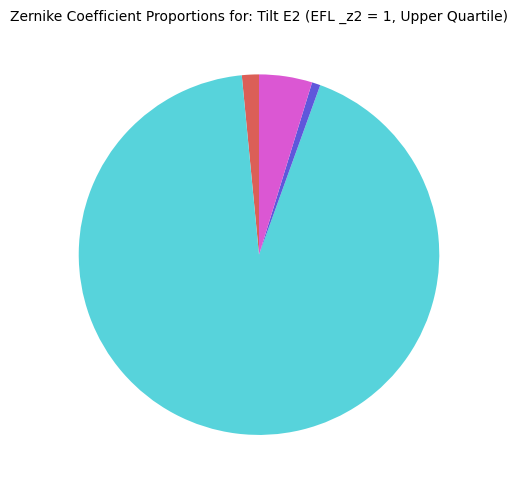

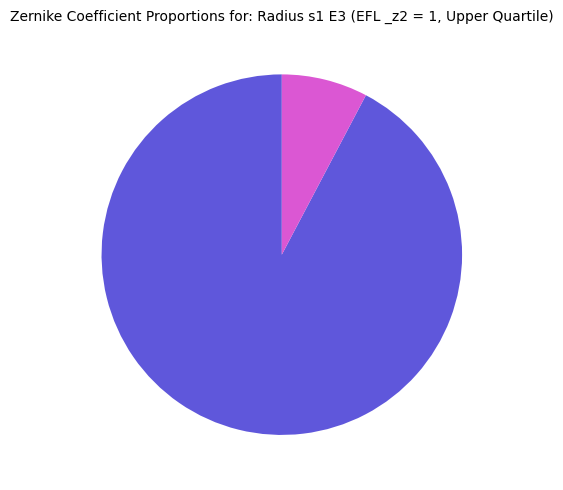

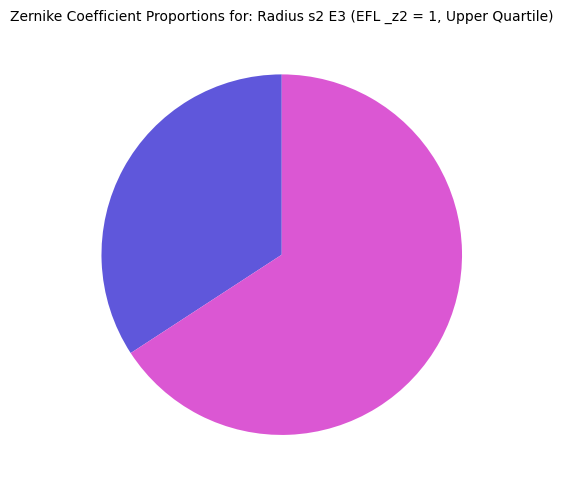

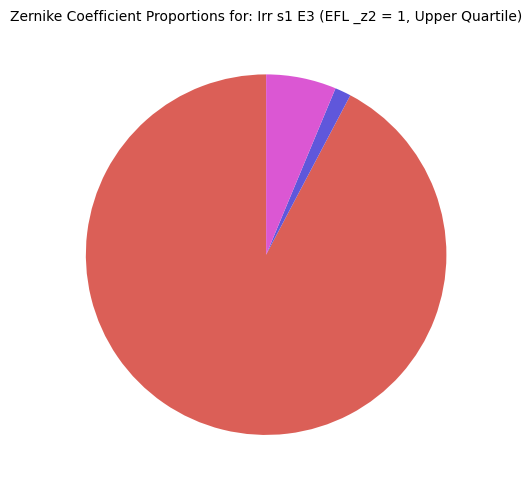

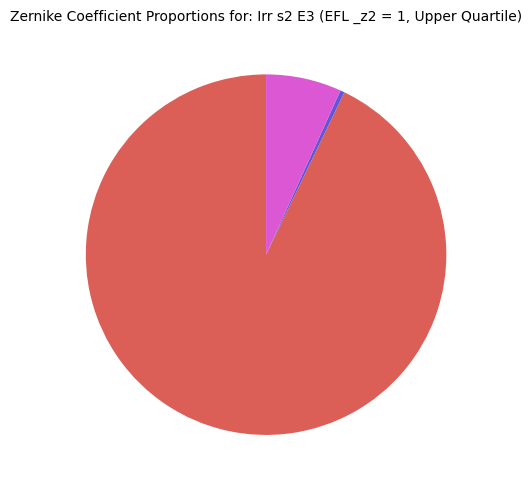

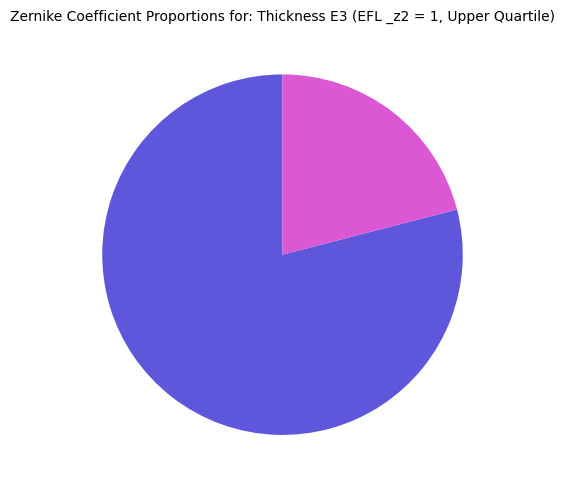

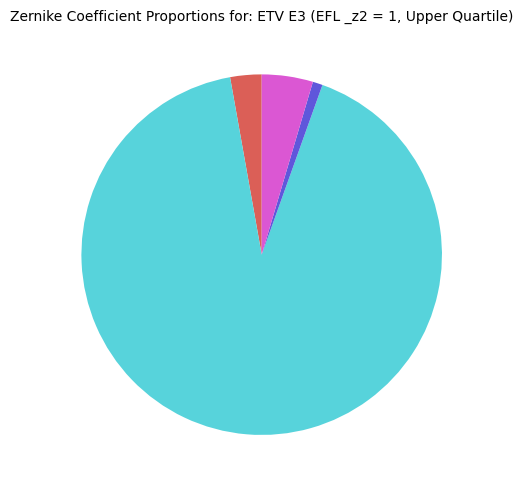

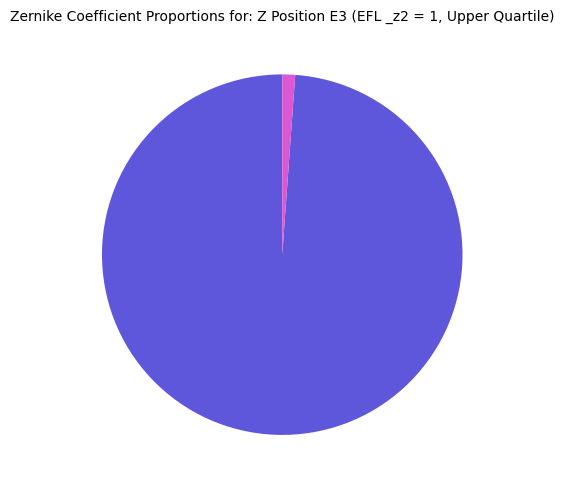

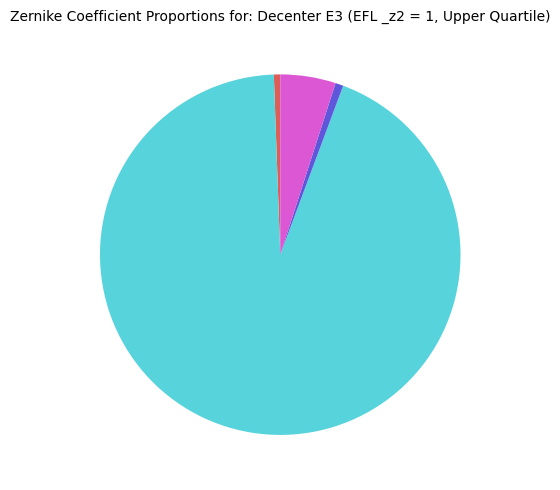

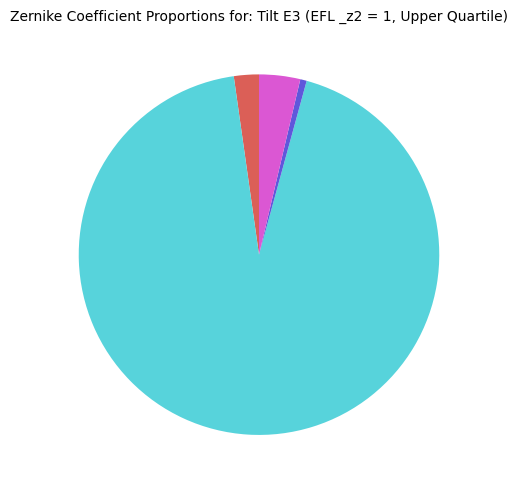

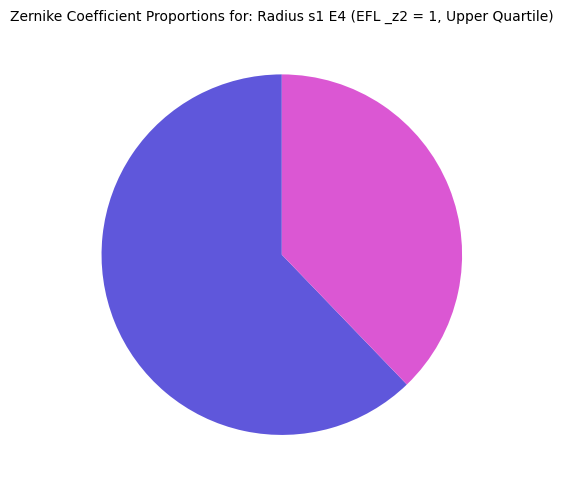

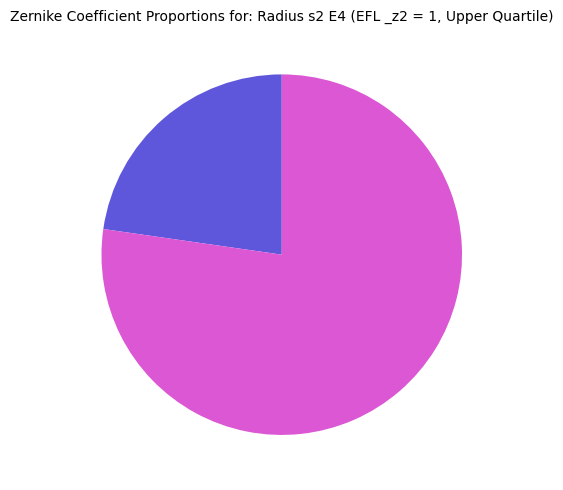

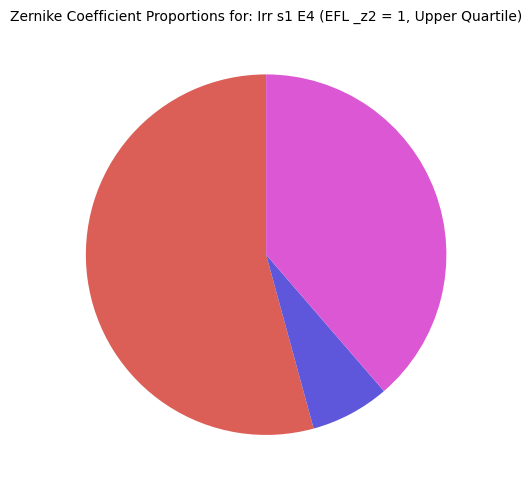

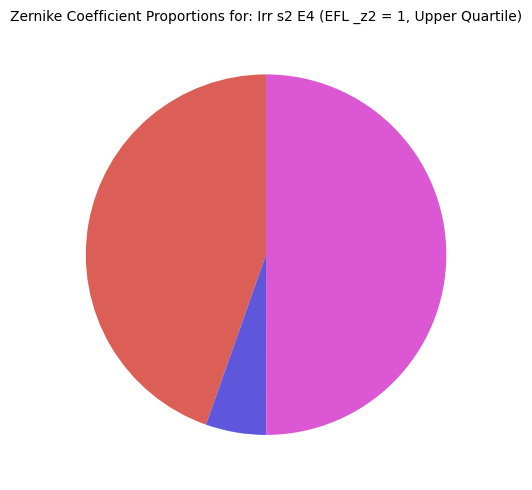

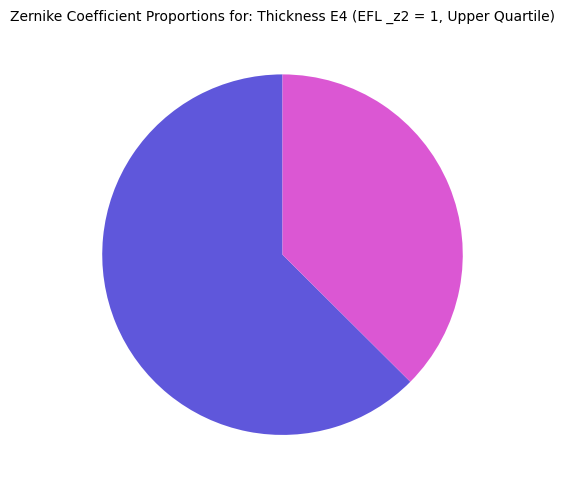

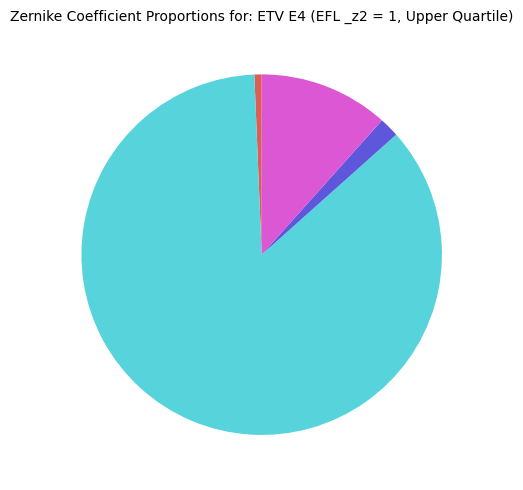

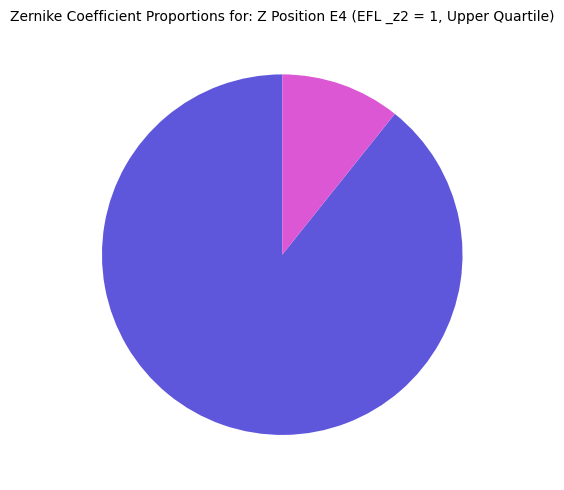

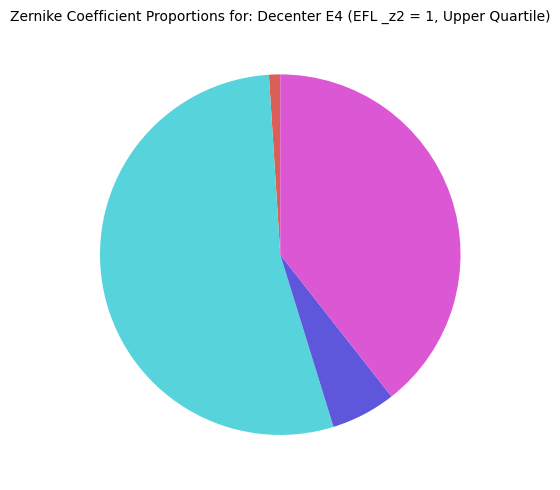

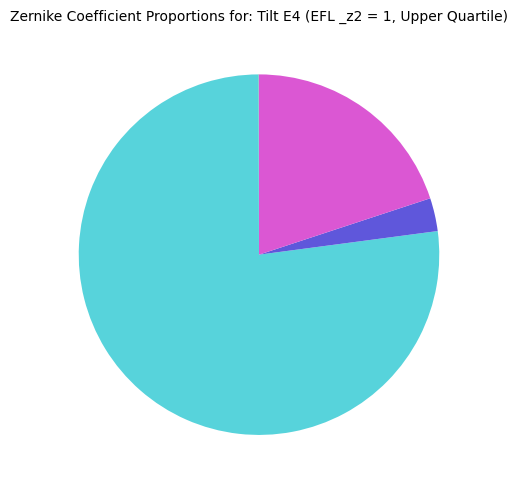

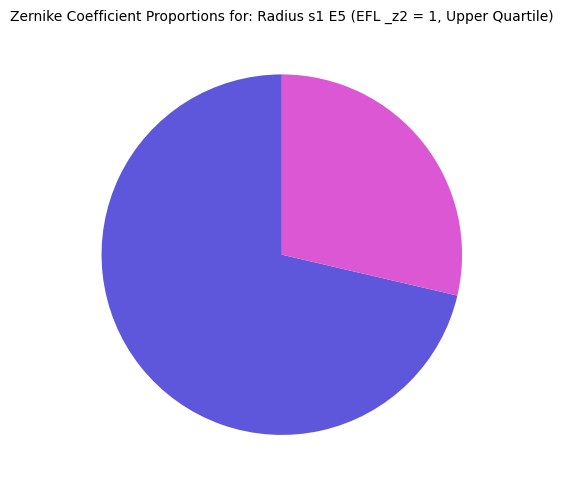

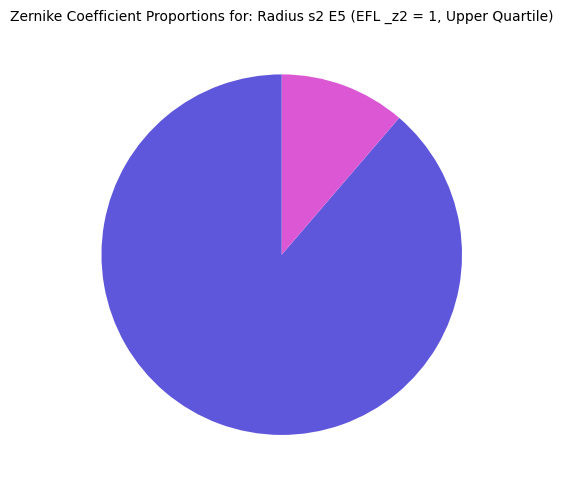

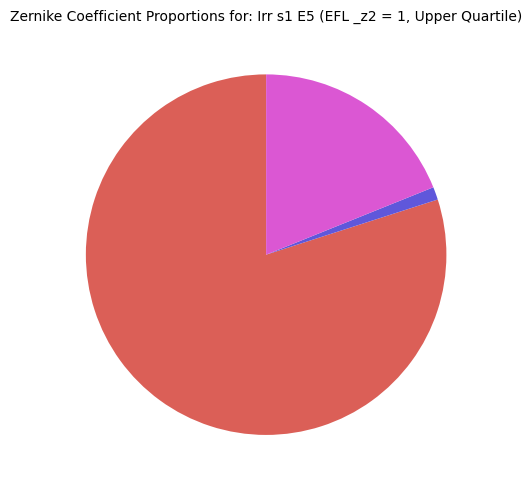

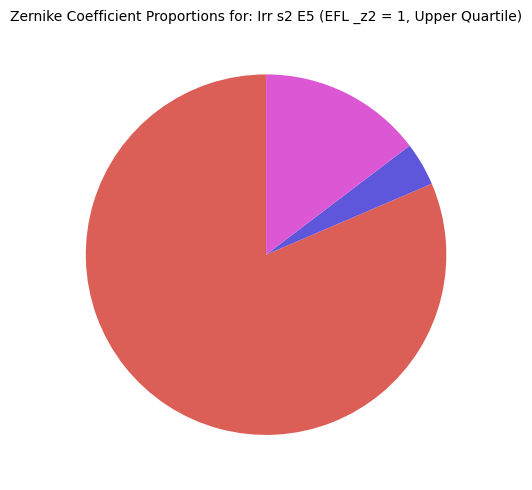

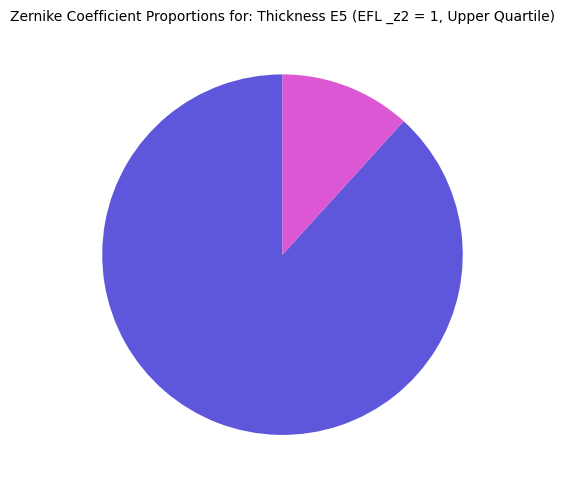

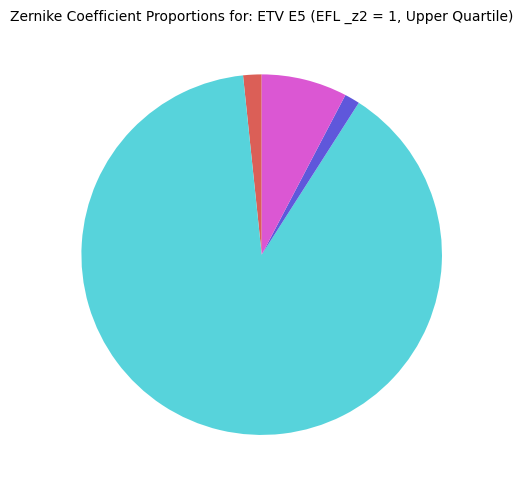

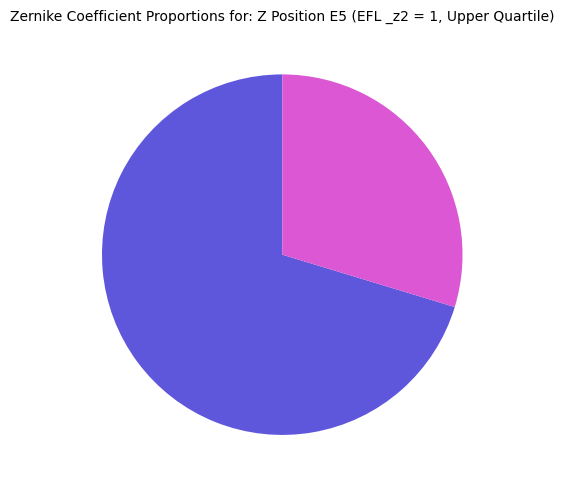

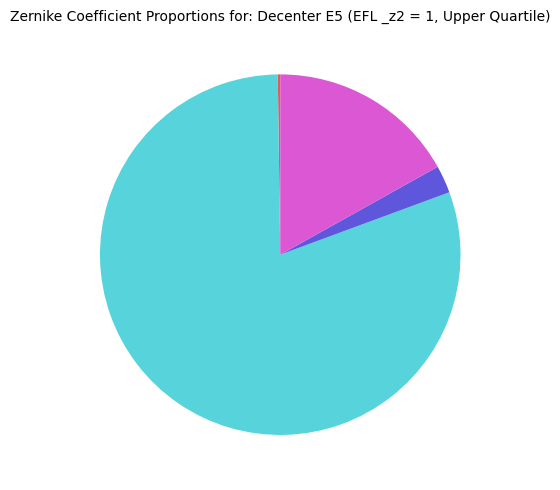

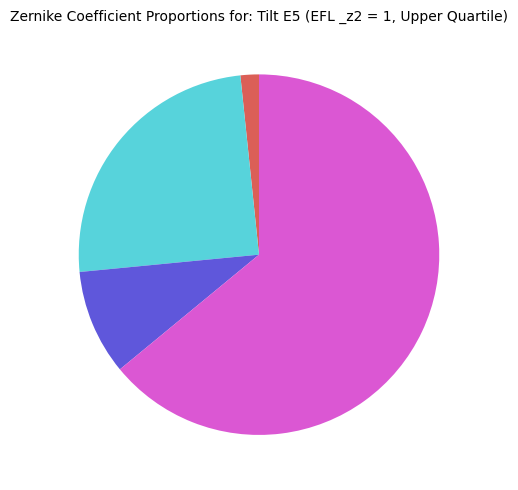

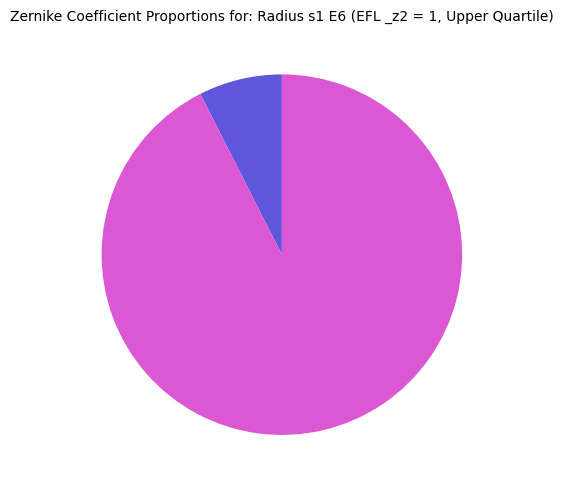

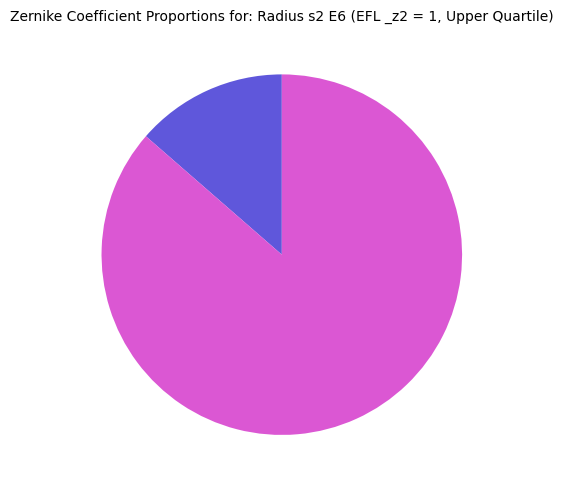

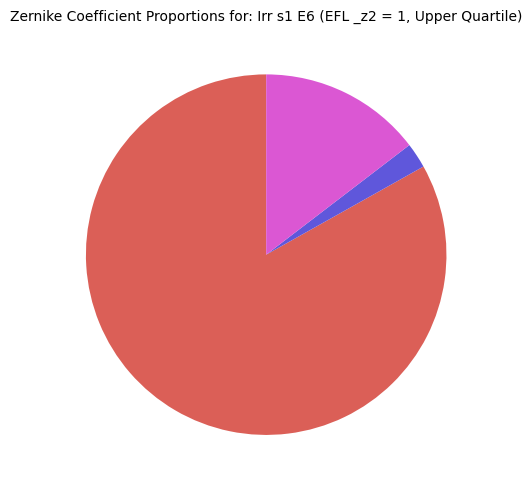

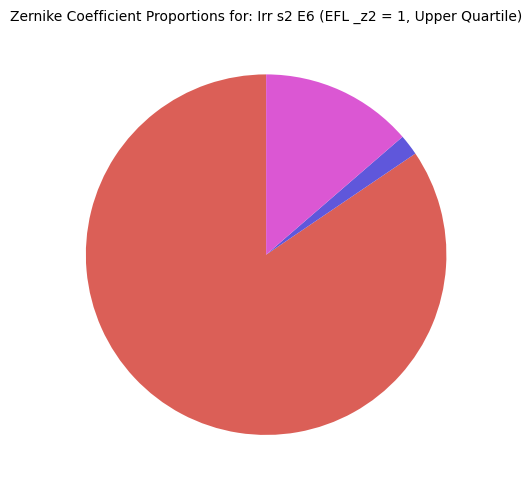

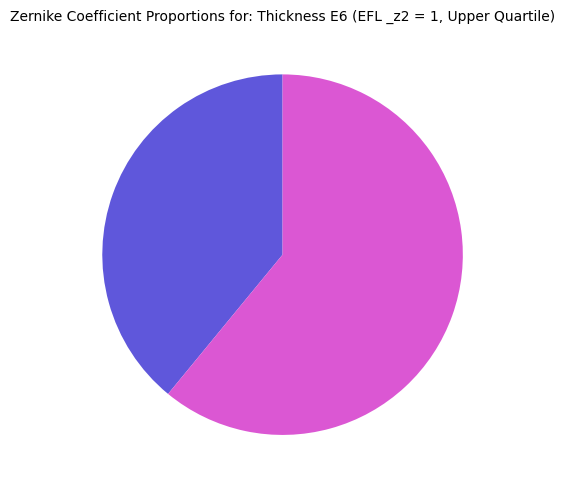

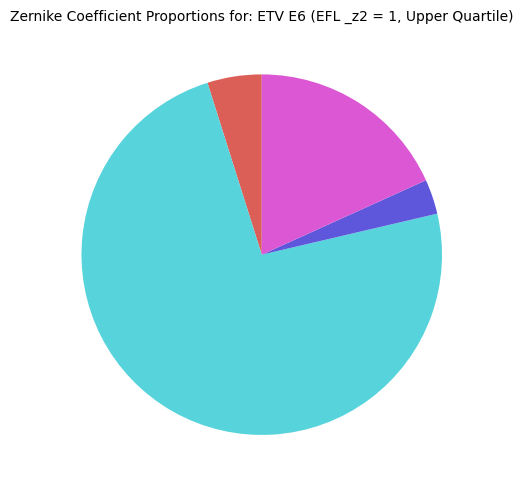

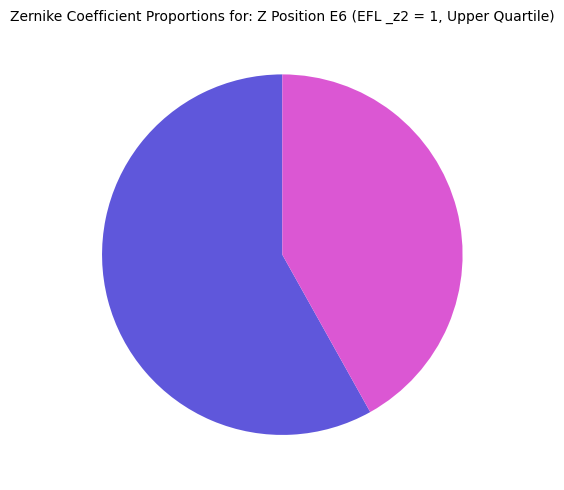

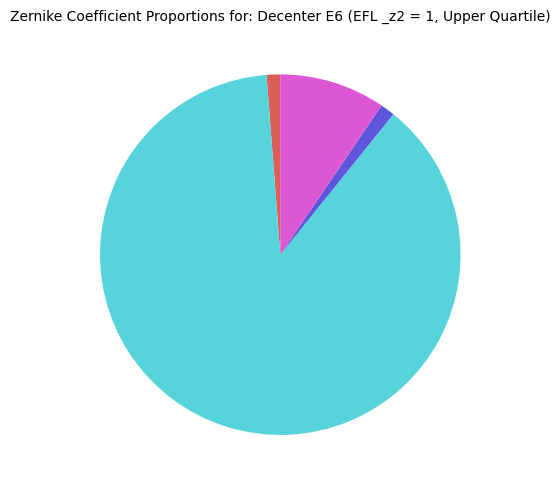

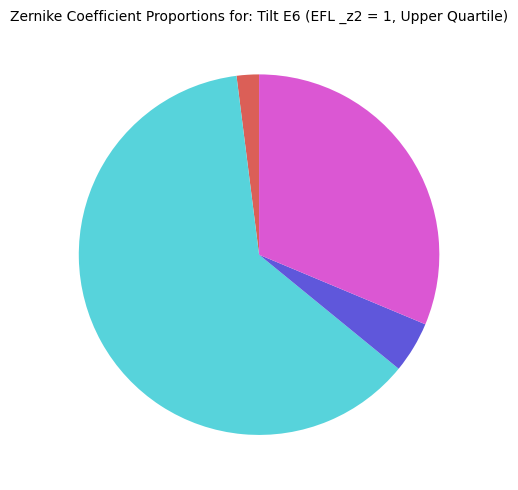

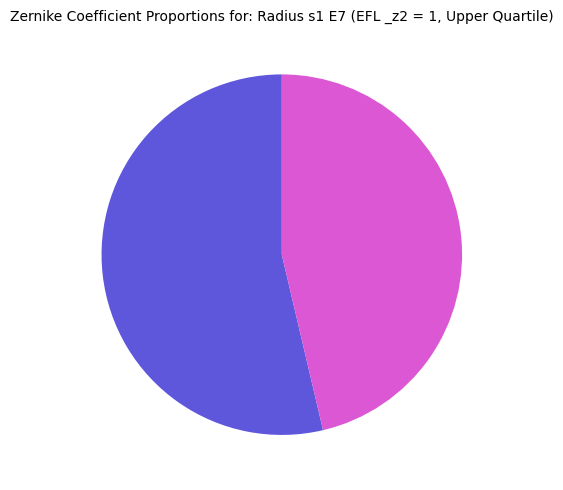

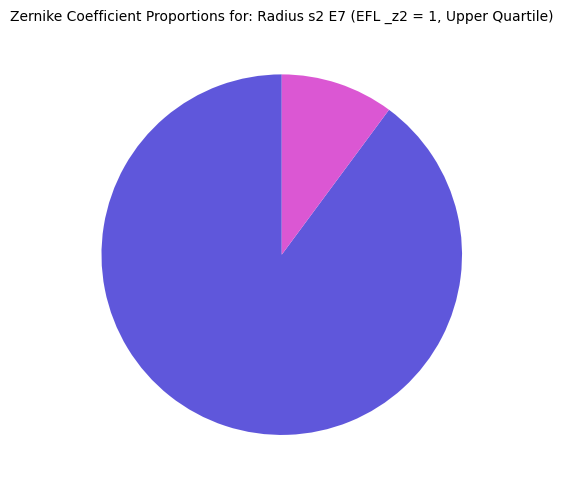

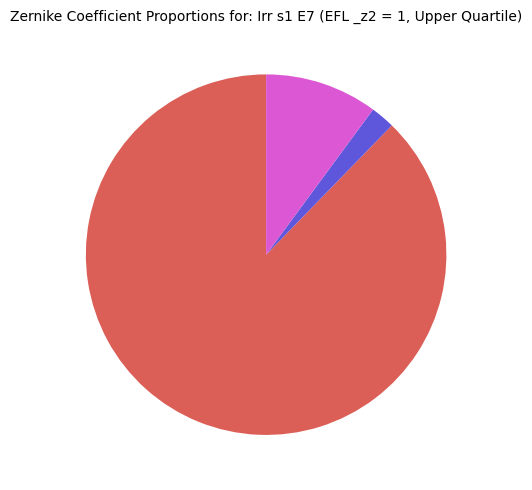

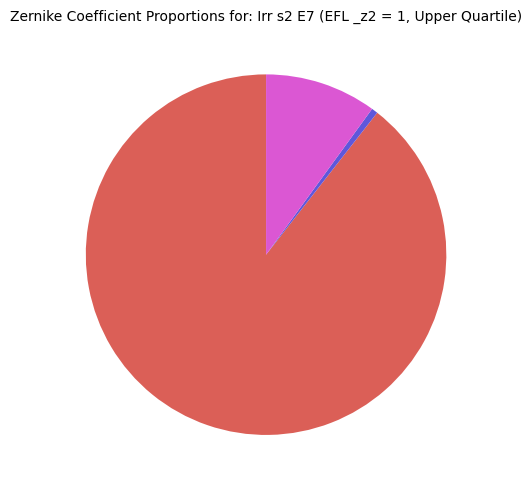

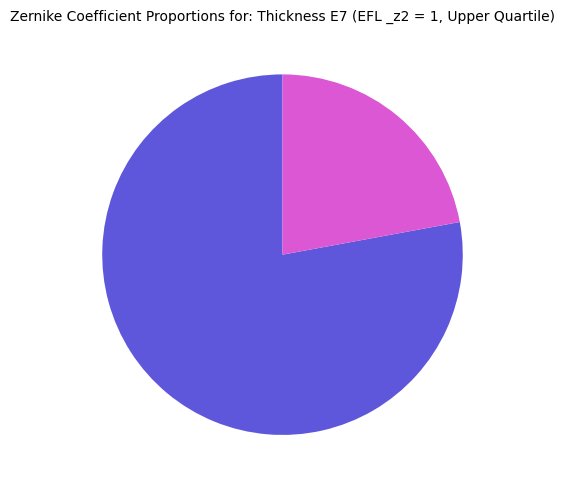

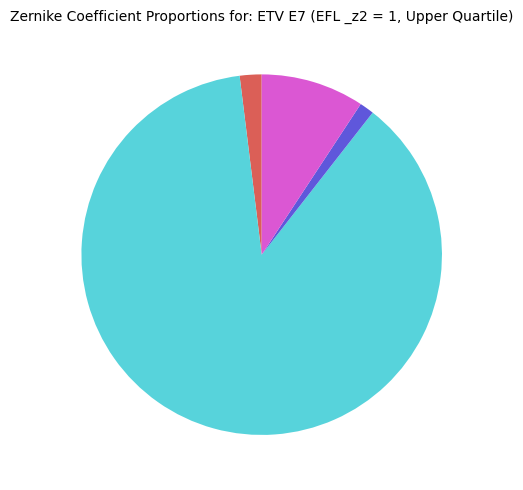

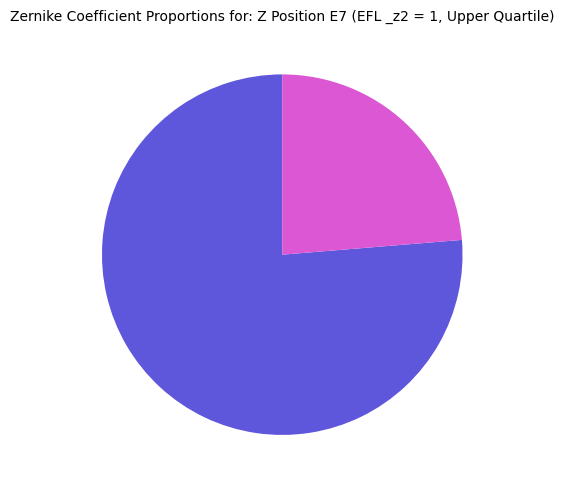

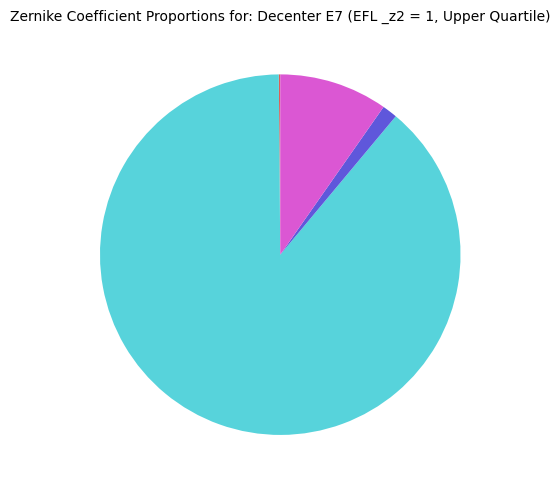

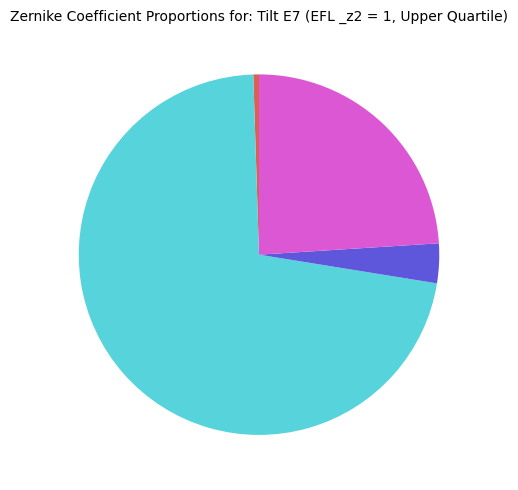

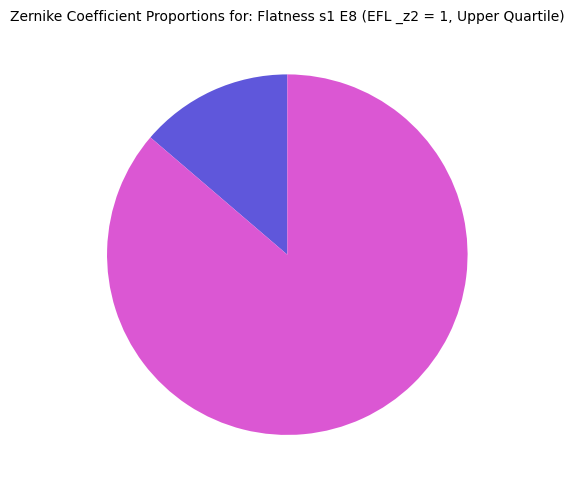

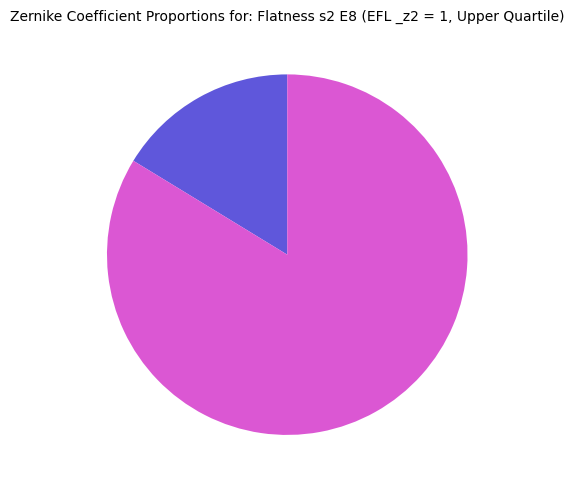

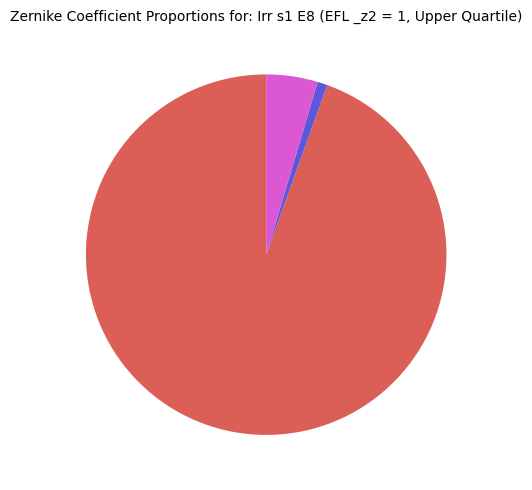

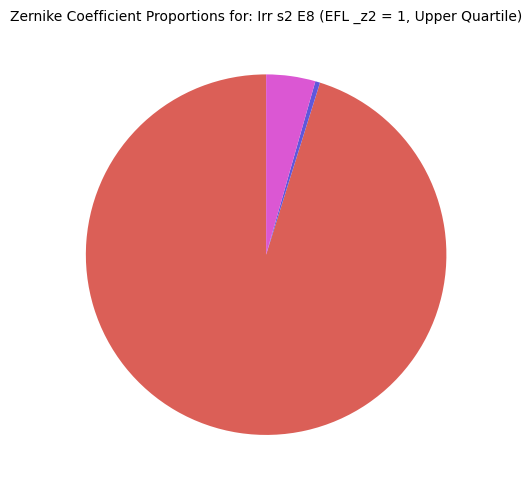

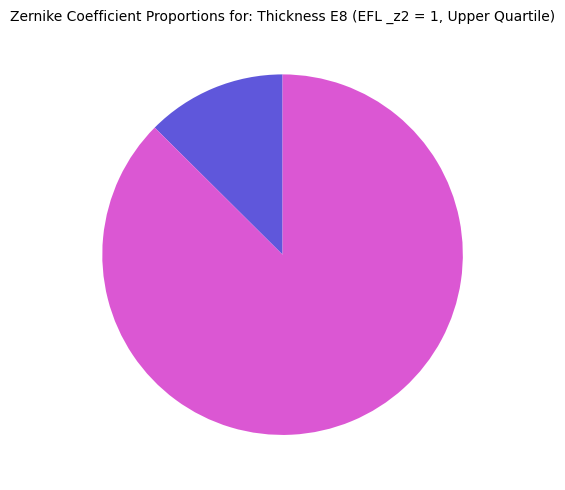

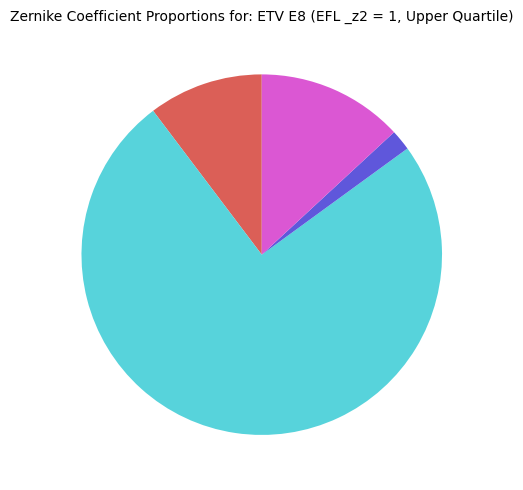

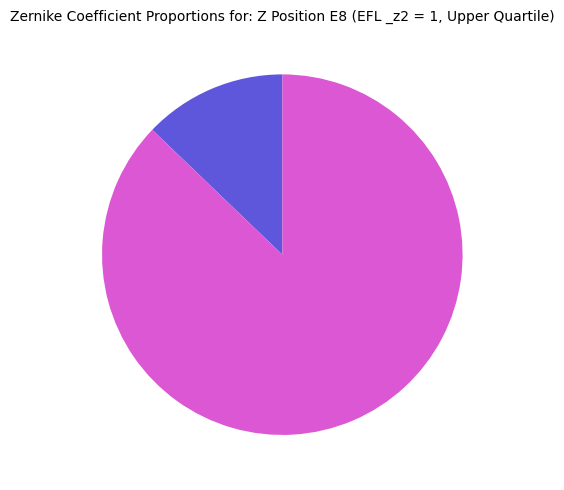

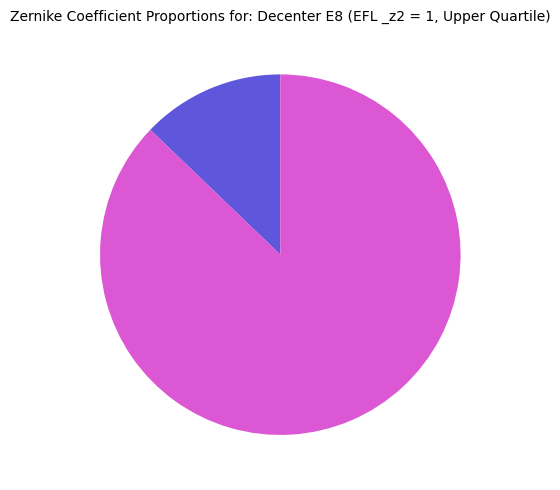

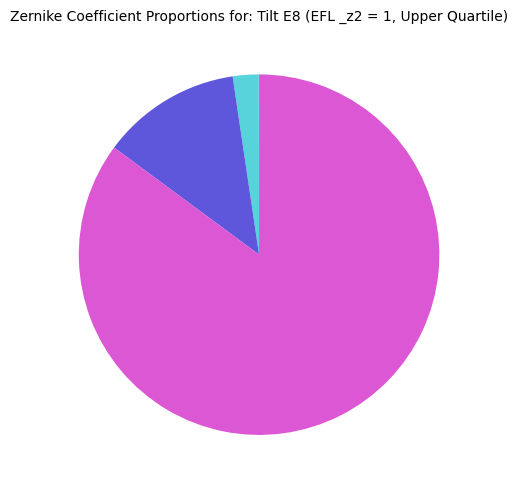

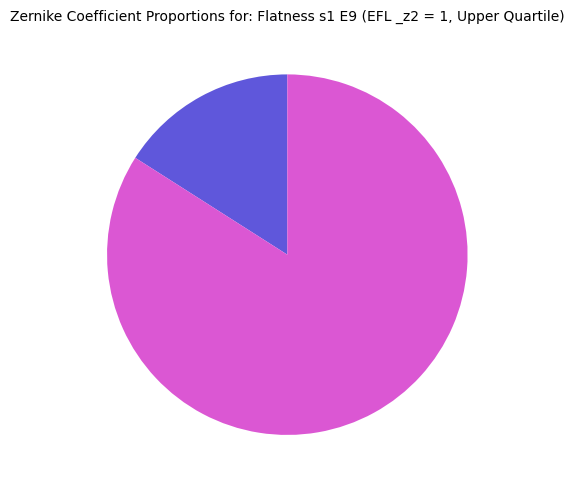

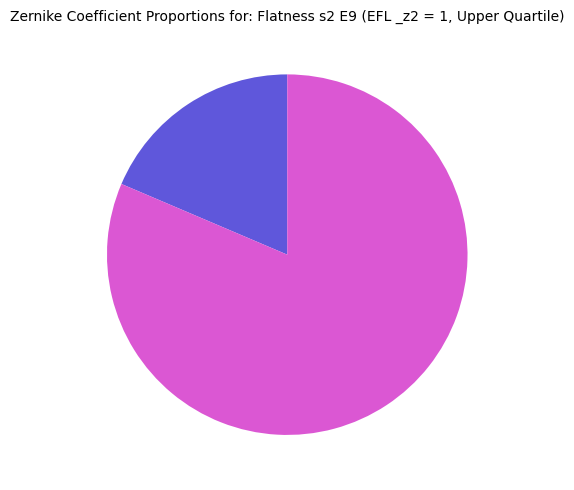

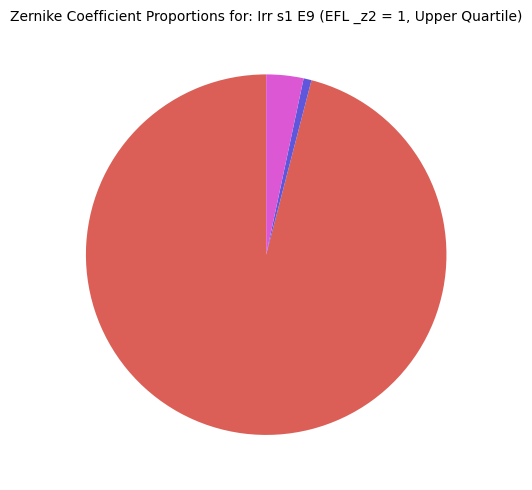

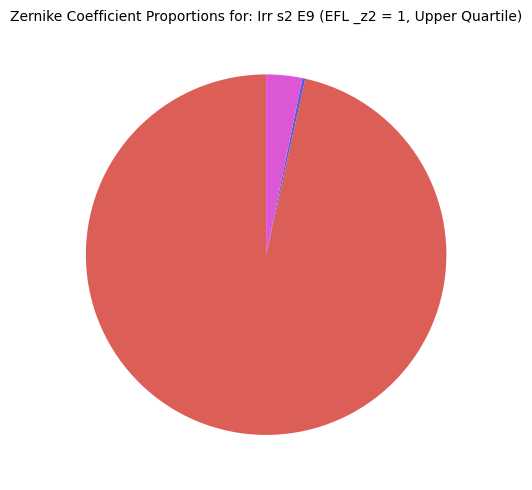

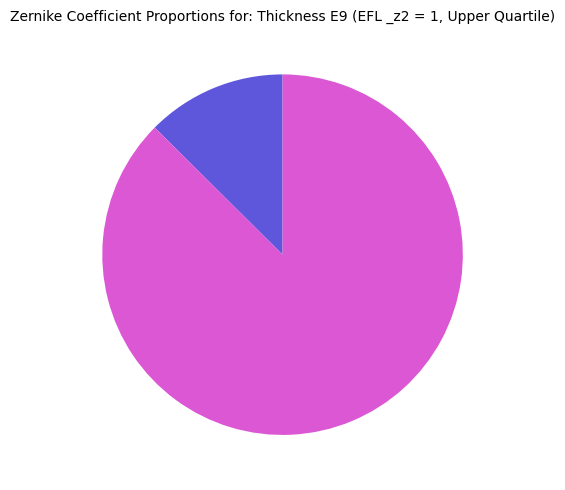

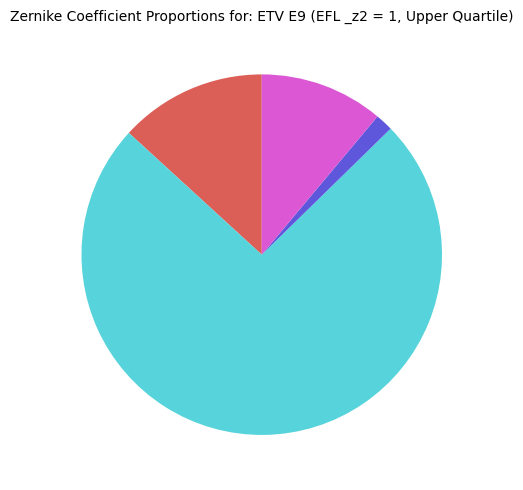

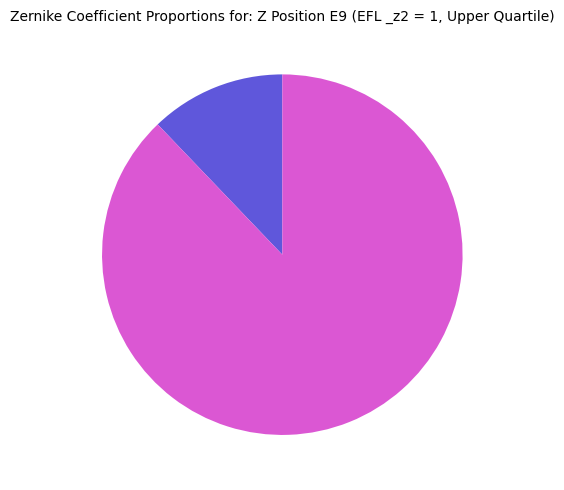

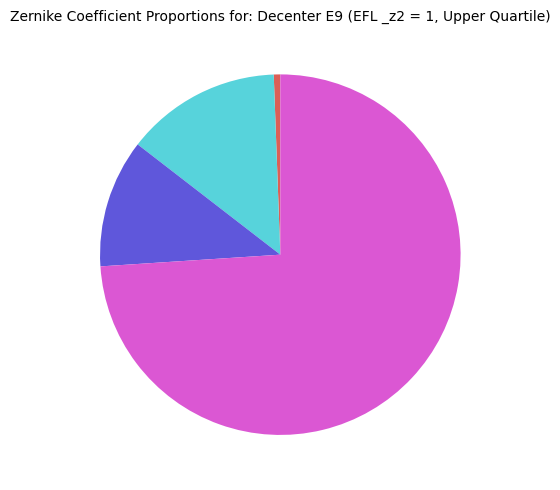

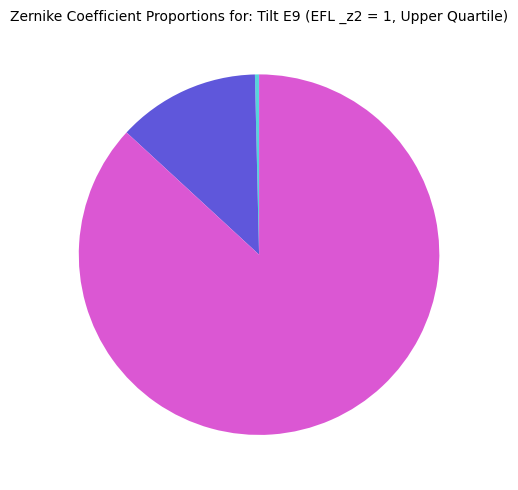

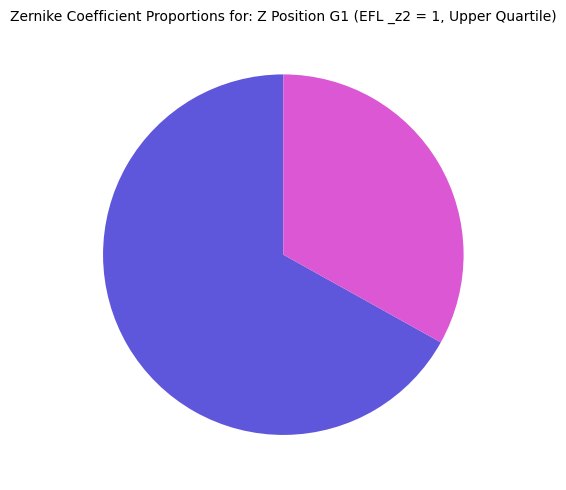

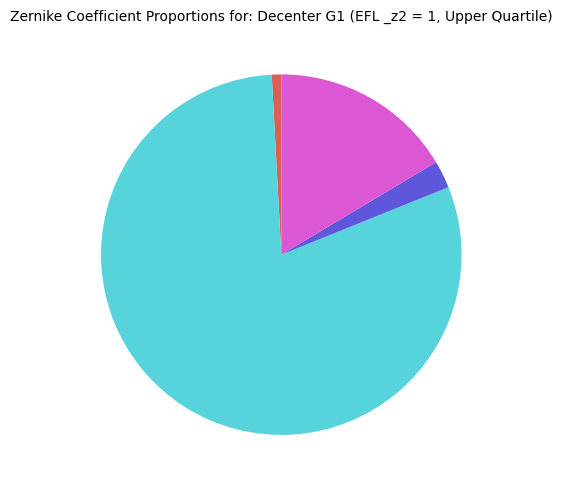

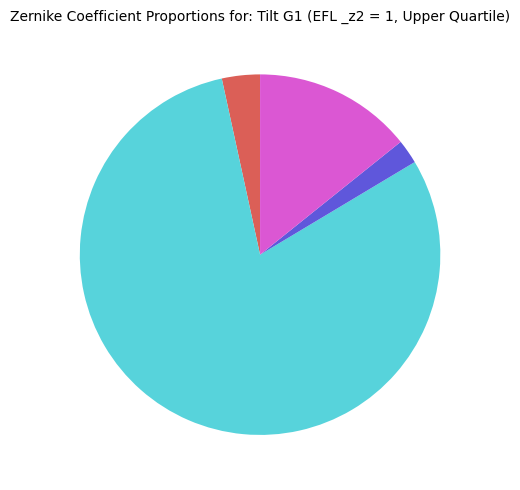

In [ ]:
# Adjust the figure size to make the pies smaller
plt.rcParams['figure.figsize'] = (5, 5) # Smaller figure size for each pie chart

# Define the Zernike coefficient columns with the correct name from the DataFrame
zernike_cols_only = [
    'Zerniks Astigmatisim\n X\n(c5)',
    'Zerniks Astigmatisim\n Y\n(c6)',
    'Zerniks Coma X\n(c7)',
    'Zerniks Coma Y\n(c8)',
    'Zerniks Spherical \n(c9)',
    'Zerniks Spherical -  \n(c16)'
]

# Create a consistent color map for the Zernike coefficients
colors = sns.color_palette("hls", len(zernike_cols_only))
color_map = {coeff: color for coeff, color in zip(zernike_cols_only, colors)}

# Create a single figure for the legend at the beginning
fig_legend = plt.figure(figsize=(10, 2))
patches = [plt.Rectangle((0, 0), 1, 1, fc=color_map[coeff]) for coeff in zernike_cols_only]
plt.legend(patches, zernike_cols_only, title="Zernike Coefficients", loc='center', ncol=3)
plt.axis('off')  # Hide the axes
plt.show()

# Get unique Parameter Names from the normalized data (EFL _z2 = 1)
unique_param_names_normalized_z2_1 = df_zernike_normalized_z2_1['Parameter Name '].unique()

# Generate a pie chart for each Parameter Name
for i, param_name in enumerate(unique_param_names_normalized_z2_1):
    # Filter the melted DataFrame for the current Parameter Name
    df_group_normalized_z2_1 = df_melted_normalized_z2_1[df_melted_normalized_z2_1['Parameter Name '].isin([param_name])].copy()

    # Get the values and labels for the pie chart
    pie_values = df_group_normalized_z2_1['Absolute Normalized Value']
    pie_labels = df_group_normalized_z2_1['Zernike Coefficient']
    pie_colors = [color_map[label] for label in pie_labels]


    plt.figure() # A new figure for each plot
    # Create the pie chart without labels and percentages
    plt.pie(pie_values, labels=None, autopct=None, startangle=90, colors=pie_colors)


    # Add a title with the Parameter Name in a smaller font
    plt.title(f'Zernike Coefficient Proportions for: {param_name} (EFL _z2 = 1, Upper Quartile)', fontsize=10)

    plt.tight_layout()
    plt.show()

## Filter data for efl = z1

### Subtask:
Ensure we are working with the subset of the DataFrame where 'EFL _z2' is 0 (as done previously).


## Calculate upper quartile

### Subtask:
For the filtered data (EFL _z2 = 0), calculate the upper quartile (75th percentile) of the absolute values of 'Parameter Error' for each unique 'Parameter Name'.


**Reasoning**:
Calculate the upper quartile of the absolute 'Parameter Error' for each 'Parameter Name' in the filtered dataframe.



In [ ]:
# Calculate the upper quartile of the absolute values of 'Parameter Error'
# for each 'Parameter Name' where EFL_z2 is 0
upper_quartile_abs_param_error_z2_0 = df_efl_z2_0['Parameter Error'].abs().groupby(df_efl_z2_0['Parameter Name ']).quantile(0.75)

print("\nUpper Quartile of Absolute 'Parameter Error' for each 'Parameter Name' (EFL _z2 = 0):")
display(upper_quartile_abs_param_error_z2_0)


Upper Quartile of Absolute 'Parameter Error' for each 'Parameter Name' (EFL _z2 = 0):


Parameter Name 
Decenter E1      0.0225
Decenter E2      0.0225
Decenter E3      0.0225
Decenter E4      0.0225
Decenter E5      0.0225
                  ...  
Z Position E6    0.2750
Z Position E7    0.2750
Z Position E8    0.2750
Z Position E9    0.2750
Z Position G1    0.2750
Name: Parameter Error, Length: 84, dtype: float64

## Find rows closest to upper quartile

### Subtask:
Identify the rows in the filtered DataFrame (EFL _z2 = 0) where the absolute 'Parameter Error' is closest to the calculated upper quartile for each 'Parameter Name'.


**Reasoning**:
Iterate through unique parameter names in `df_efl_z2_0`, find the row with the absolute parameter error closest to the upper quartile for each parameter name, and store the indices of these rows.



In [ ]:
# Find the row in df_efl_z2_0 for each 'Parameter Name'
# where 'Parameter Error' is closest to the upper quartile

# Create an empty list to store the selected rows
closest_rows_list_z2_0_upper_quartile = []
# Iterate through each unique 'Parameter Name'
for param_name in unique_param_names_z2_0:
    # Get the subset of df_efl_z2_0 for the current 'Parameter Name'
    subset_df = df_efl_z2_0[df_efl_z2_0['Parameter Name '] == param_name].copy()

    # Get the corresponding upper quartile value
    quartile_value = upper_quartile_abs_param_error_z2_0.get(param_name)

    if quartile_value is not None:
        # Calculate the absolute difference between 'Parameter Error' and the quartile value
        subset_df['Error_Difference'] = (subset_df['Parameter Error'].abs() - quartile_value).abs()

        # Find the index of the row with the minimum absolute difference
        closest_row_index = subset_df['Error_Difference'].idxmin()

        # Append the index to the list
        closest_rows_list_z2_0_upper_quartile.append(closest_row_index)

print("Indices of rows closest to the upper quartile of absolute 'Parameter Error' (EFL _z2 = 0):")
print(closest_rows_list_z2_0_upper_quartile)
print(f"Number of selected rows: {len(closest_rows_list_z2_0_upper_quartile)}")

Indices of rows closest to the upper quartile of absolute 'Parameter Error' (EFL _z2 = 0):
[np.int64(2), np.int64(18), np.int64(34), np.int64(40), np.int64(44), np.int64(56), np.int64(68), np.int64(82), np.int64(98), np.int64(114), np.int64(130), np.int64(146), np.int64(152), np.int64(156), np.int64(168), np.int64(180), np.int64(194), np.int64(210), np.int64(226), np.int64(242), np.int64(258), np.int64(264), np.int64(268), np.int64(280), np.int64(292), np.int64(306), np.int64(322), np.int64(338), np.int64(354), np.int64(370), np.int64(376), np.int64(380), np.int64(392), np.int64(404), np.int64(418), np.int64(434), np.int64(450), np.int64(466), np.int64(482), np.int64(488), np.int64(492), np.int64(504), np.int64(516), np.int64(530), np.int64(546), np.int64(562), np.int64(578), np.int64(594), np.int64(600), np.int64(604), np.int64(616), np.int64(628), np.int64(642), np.int64(658), np.int64(674), np.int64(690), np.int64(706), np.int64(712), np.int64(716), np.int64(728), np.int64(740), np.

**Reasoning**:
Select the identified rows from the original dataframe using the list of indices, add the corresponding upper quartile value as a new column, and then select the required columns for the next steps. Display the head of the resulting dataframe and its shape.



In [ ]:
# Define the list of Zernike coefficient columns
zernike_cols_only = [
    'Zerniks Astigmatisim\n X\n(c5)',
    'Zerniks Astigmatisim\n Y\n(c6)',
    'Zerniks Coma X\n(c7)',
    'Zerniks Coma Y\n(c8)',
    'Zerniks Spherical \n(c9)',
    'Zerniks Spherical -  \n(c16)'
]

# Select the rows from the original DataFrame using the list of indices
df_selected_rows_z2_0_upper_quartile = df.loc[closest_rows_list_z2_0_upper_quartile].copy()

# Add the corresponding upper quartile value by mapping 'Parameter Name'
df_selected_rows_z2_0_upper_quartile['Upper_Quartile_Error'] = df_selected_rows_z2_0_upper_quartile['Parameter Name '].map(upper_quartile_abs_param_error_z2_0)

# Select the required columns: 'Parameter Name', 'Upper_Quartile_Error', and Zernike cols
final_selected_data_z2_0_upper_quartile = df_selected_rows_z2_0_upper_quartile[['Parameter Name ', 'Upper_Quartile_Error'] + zernike_cols_only]

print("Selected Data (Parameter Name, Upper Quartile, Zernike Coefficients) for rows closest to Upper Quartile (EFL _z2 = 0):")
display(final_selected_data_z2_0_upper_quartile.head())
print(f"Shape of final selected data: {final_selected_data_z2_0_upper_quartile.shape}")

Selected Data (Parameter Name, Upper Quartile, Zernike Coefficients) for rows closest to Upper Quartile (EFL _z2 = 0):


Parameter Name   Upper_Quartile_Error  Zerniks Astigmatisim\n X\n(c5)  \
2     Radius s1 E1               0.00625                    3.134720e-13   
18    Radius s2 E1               0.00625                   -1.324791e-11   
34       Irr s1 E1               1.50000                   -7.141710e-02   
40       Irr s2 E1               1.50000                    7.118620e-02   
44    Thickness E1               0.04250                   -2.455655e-13   

    Zerniks Astigmatisim\n Y\n(c6)  Zerniks Coma X\n(c7)  \
2                     1.163477e-12         -2.550733e-13   
18                    6.917285e-12         -6.872987e-12   
34                    4.585377e-13          3.330588e-13   
40                   -4.036498e-13         -8.644179e-13   
44                   -1.577275e-12          1.834315e-12   

    Zerniks Coma Y\n(c8)  Zerniks Spherical \n(c9)  \
2          -1.066010e-13                  0.014332   
18         -7.104108e-12                 -0.259338   
34         -1.435043e-12                  0.000586   
40         -1.301671e-12                 -0.000198   
44          1.166264e-12                  0.002201   

    Zerniks Spherical -  \n(c16)  
2                      -0.002505  
18                     -0.002857  
34                      0.003419  
40                      0.003406  
44                      0.001441

Shape of final selected data: (84, 8)


**Reasoning**:
Select only the Zernike columns from the filtered data, calculate the maximum absolute value for each row, and then normalize each Zernike coefficient in that row by this maximum absolute value. Add the 'Parameter Name' back to the normalized DataFrame and display the head. Then, melt the normalized DataFrame to prepare it for visualization by creating a long-format DataFrame with columns for 'Parameter Name', 'Zernike Coefficient', and 'Normalized Value', and calculate the absolute normalized value. Display the head of the melted DataFrame.



In [ ]:
# Define the Zernike coefficient columns (excluding MTF for this normalization)
zernike_cols_only = [
    'Zerniks Astigmatisim\n X\n(c5)',
    'Zerniks Astigmatisim\n Y\n(c6)',
    'Zerniks Coma X\n(c7)',
    'Zerniks Coma Y\n(c8)',
    'Zerniks Spherical \n(c9)',
    'Zerniks Spherical -  \n(c16)'
]

# Select only the Zernike columns for row-wise normalization
df_zernike_z2_0_upper_quartile = final_selected_data_z2_0_upper_quartile[zernike_cols_only].copy()

# Calculate the maximum absolute value for each row across Zernike columns
# Use axis=1 for row-wise operation
max_abs_zernike_per_row_z2_0_upper_quartile = df_zernike_z2_0_upper_quartile.abs().max(axis=1)

# Normalize each Zernike coefficient by the maximum absolute value in its row
# Avoid division by zero if a row has all zero Zernike coefficients
df_zernike_normalized_z2_0_upper_quartile = df_zernike_z2_0_upper_quartile.divide(max_abs_zernike_per_row_z2_0_upper_quartile, axis=0)

# Add 'Parameter Name ' back to the normalized DataFrame for plotting
df_zernike_normalized_z2_0_upper_quartile['Parameter Name '] = final_selected_data_z2_0_upper_quartile['Parameter Name ']

print("Normalized Zernike Coefficients (row-wise max absolute value) for EFL _z2 = 0, Upper Quartile:")
display(df_zernike_normalized_z2_0_upper_quartile.head())

# Prepare normalized data for visualization
# Melt the normalized DataFrame
df_melted_normalized_z2_0_upper_quartile = df_zernike_normalized_z2_0_upper_quartile.melt(
    id_vars=['Parameter Name '],
    value_vars=zernike_cols_only,
    var_name='Zernike Coefficient',
    value_name='Normalized Value'
)

# Take the absolute value of the normalized Zernike coefficients
df_melted_normalized_z2_0_upper_quartile['Absolute Normalized Value'] = df_melted_normalized_z2_0_upper_quartile['Normalized Value'].abs()

print("\nMelted Normalized Zernike Coefficients for EFL _z2 = 0, Upper Quartile:")
display(df_melted_normalized_z2_0_upper_quartile.head())

Normalized Zernike Coefficients (row-wise max absolute value) for EFL _z2 = 0, Upper Quartile:


Zerniks Astigmatisim\n X\n(c5)  Zerniks Astigmatisim\n Y\n(c6)  \
2                     2.187202e-11                    8.117980e-11   
18                   -5.108357e-11                    2.667286e-11   
34                   -1.000000e+00                    6.420559e-12   
40                    1.000000e+00                   -5.670338e-12   
44                   -1.115517e-10                   -7.165003e-10   

    Zerniks Coma X\n(c7)  Zerniks Coma Y\n(c8)  Zerniks Spherical \n(c9)  \
2          -1.779734e-11         -7.437919e-12                  1.000000   
18         -2.650204e-11         -2.739324e-11                 -1.000000   
34          4.663572e-12         -2.009383e-11                  0.008208   
40         -1.214305e-11         -1.828544e-11                 -0.002774   
44          8.332644e-10          5.297925e-10                  1.000000   

    Zerniks Spherical -  \n(c16) Parameter Name   
2                      -0.174771    Radius s1 E1  
18                     -0.011017    Radius s2 E1  
34                      0.047873       Irr s1 E1  
40                      0.047848       Irr s2 E1  
44                      0.654623    Thickness E1


Melted Normalized Zernike Coefficients for EFL _z2 = 0, Upper Quartile:


Parameter Name              Zernike Coefficient  Normalized Value  \
0    Radius s1 E1  Zerniks Astigmatisim\n X\n(c5)      2.187202e-11   
1    Radius s2 E1  Zerniks Astigmatisim\n X\n(c5)     -5.108357e-11   
2       Irr s1 E1  Zerniks Astigmatisim\n X\n(c5)     -1.000000e+00   
3       Irr s2 E1  Zerniks Astigmatisim\n X\n(c5)      1.000000e+00   
4    Thickness E1  Zerniks Astigmatisim\n X\n(c5)     -1.115517e-10   

   Absolute Normalized Value  
0               2.187202e-11  
1               5.108357e-11  
2               1.000000e+00  
3               1.000000e+00  
4               1.115517e-10

**Reasoning**:
Generate pie charts for each parameter name, showing the proportion of each absolute normalized Zernike coefficient to visualize the dominant coefficients for the upper quartile of parameter errors where EFL _z2 is 0.



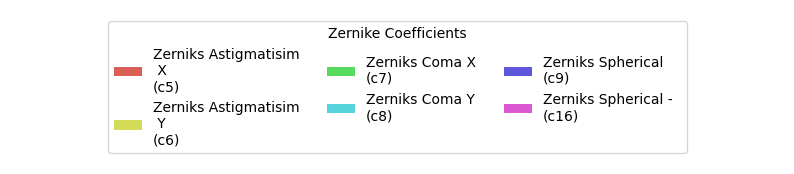

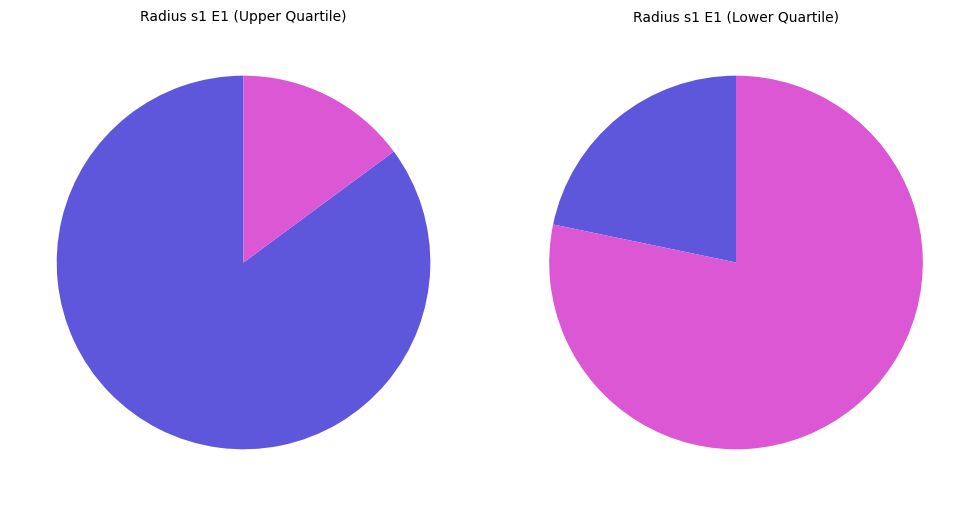

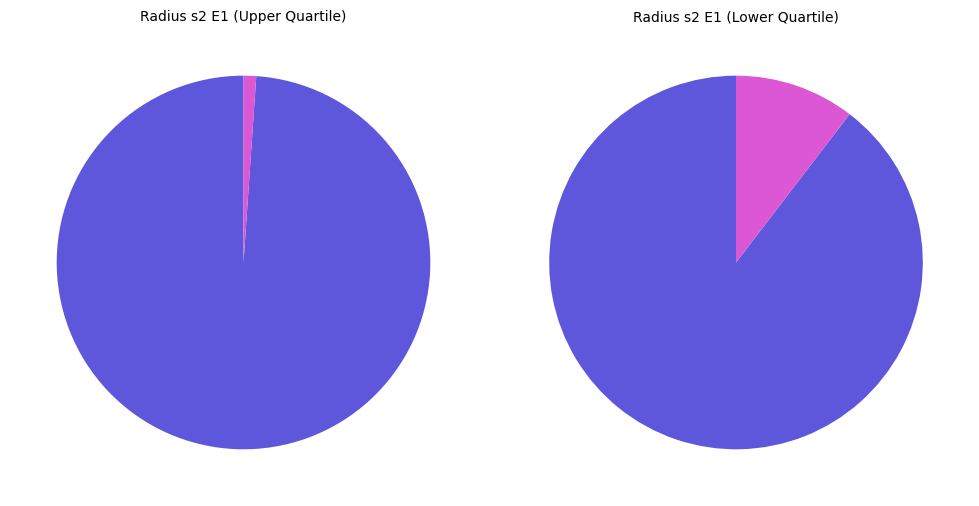

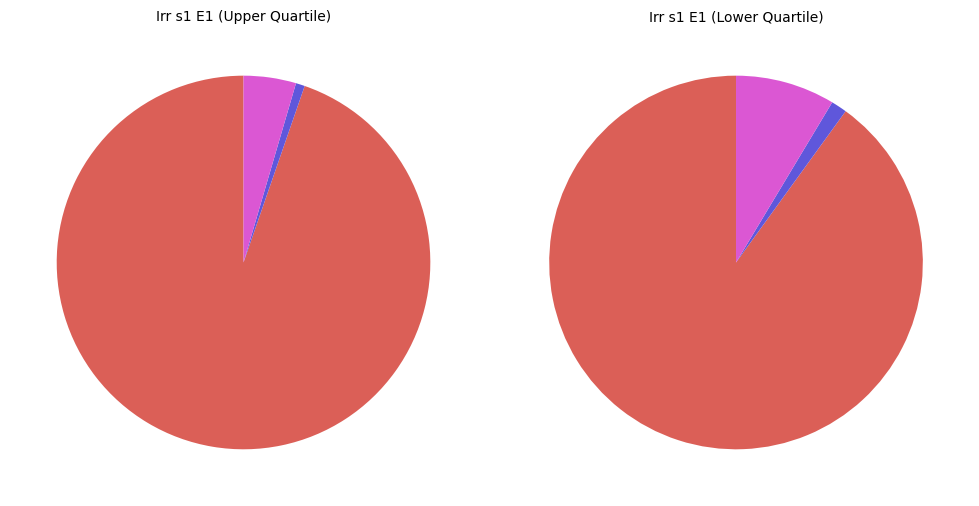

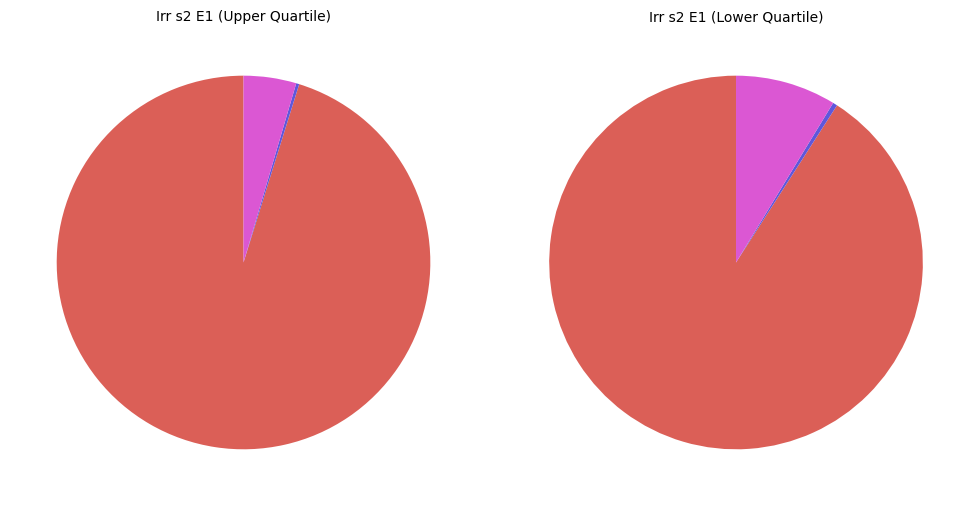

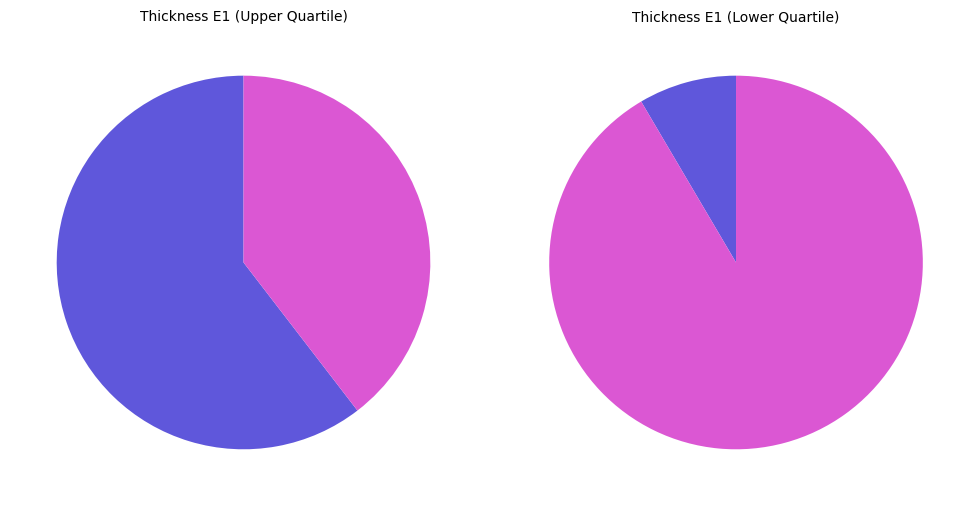

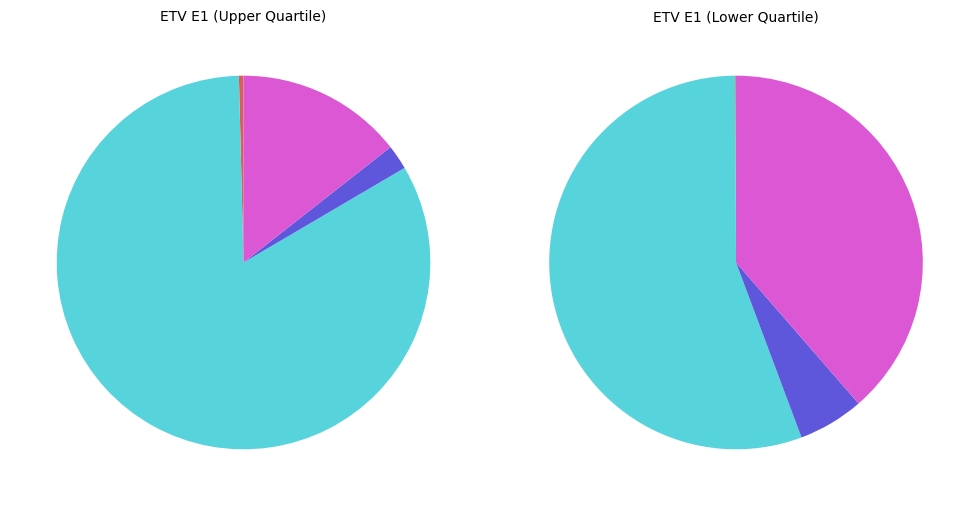

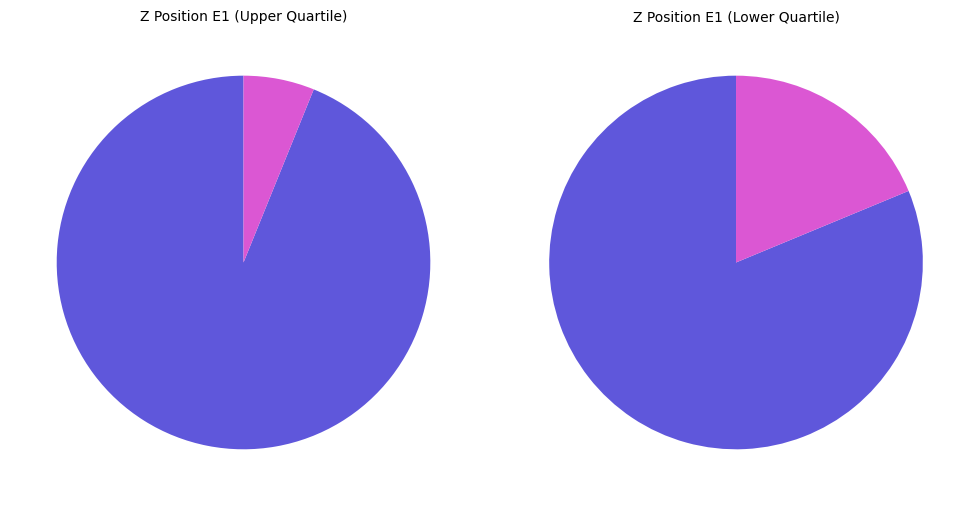

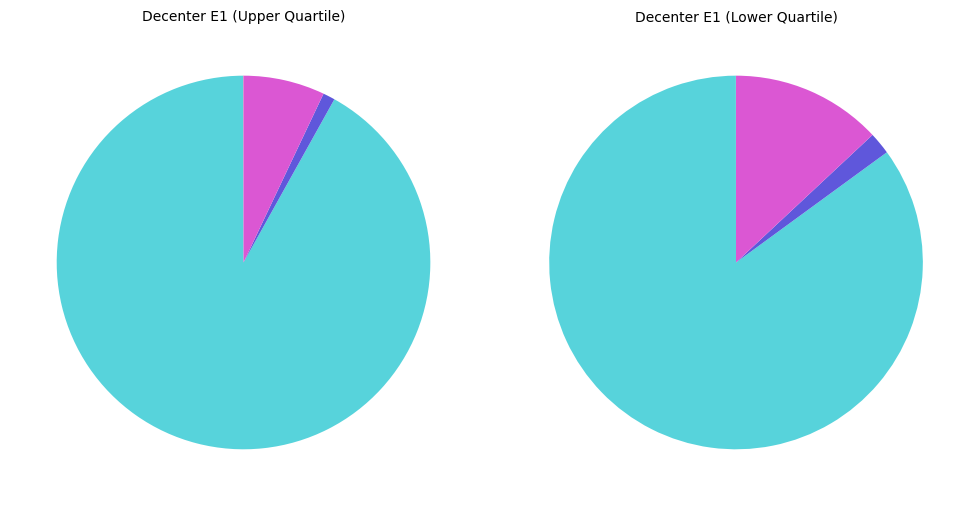

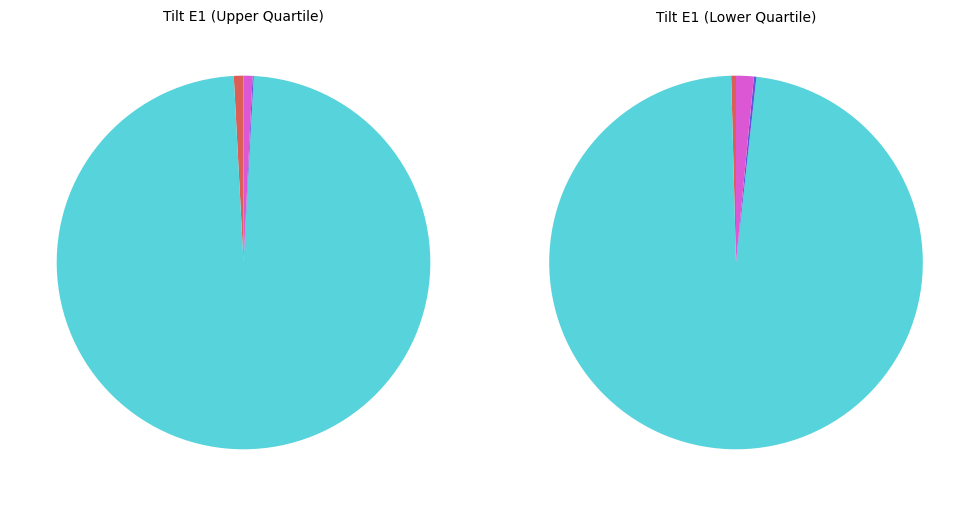

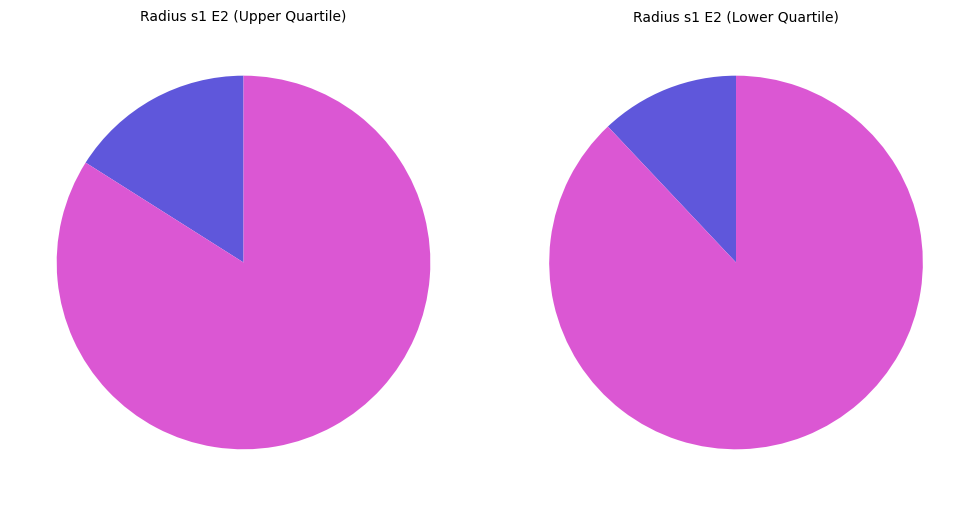

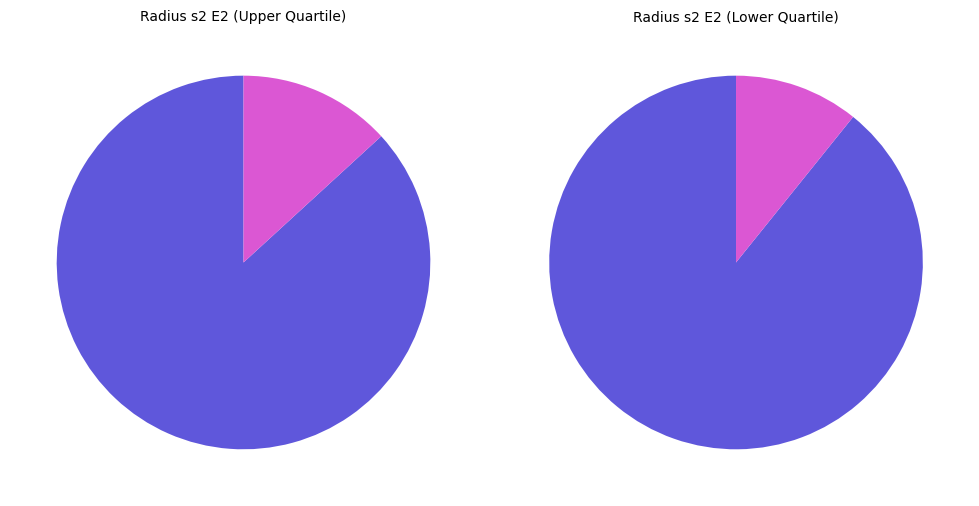

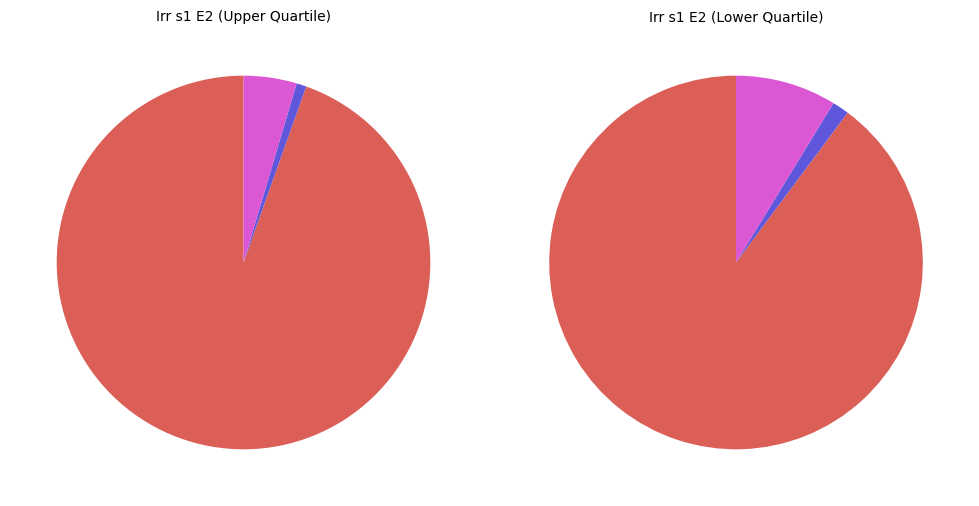

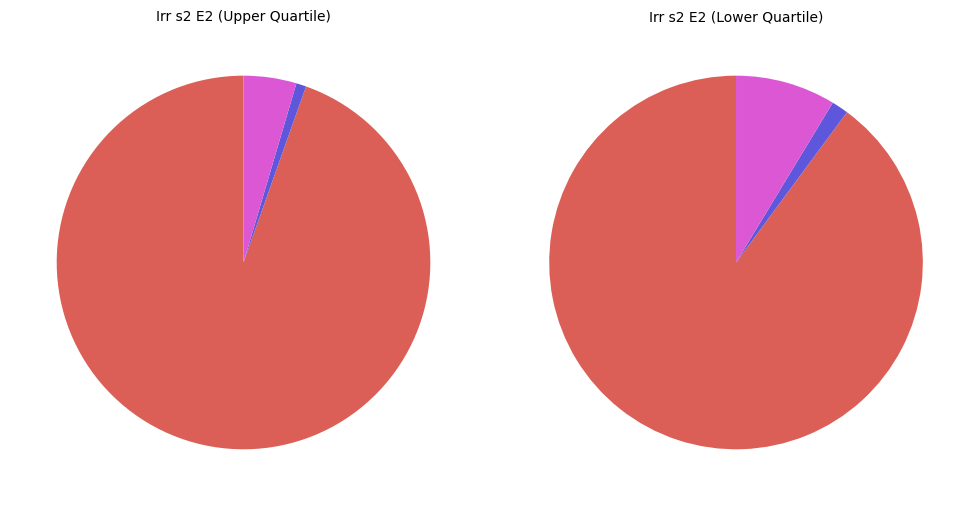

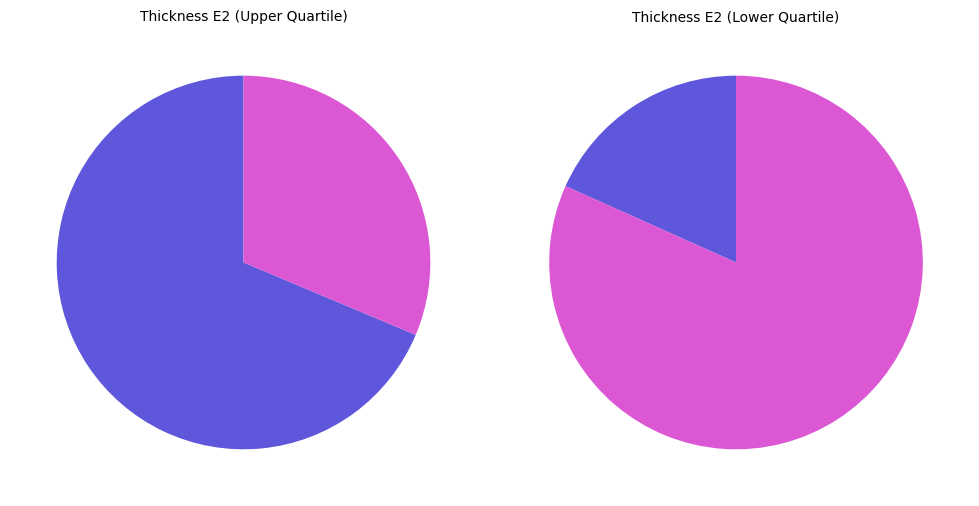

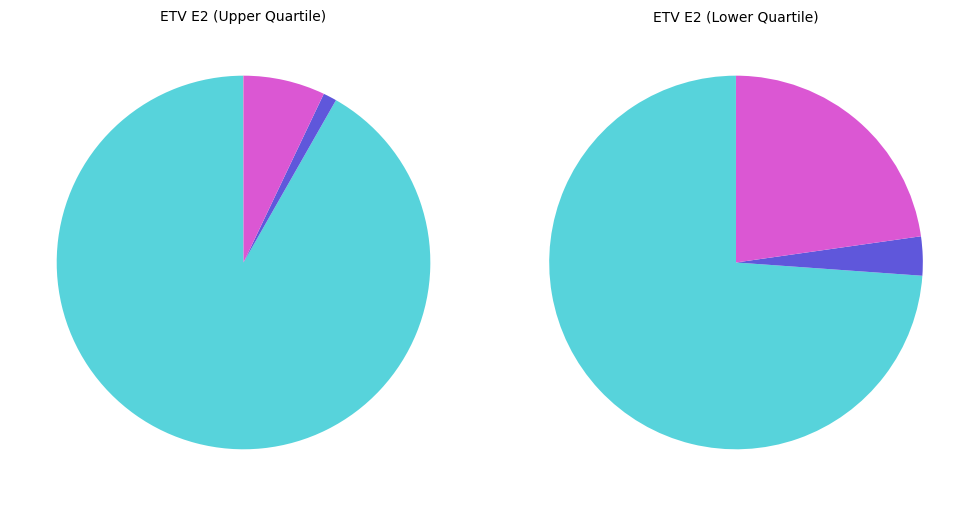

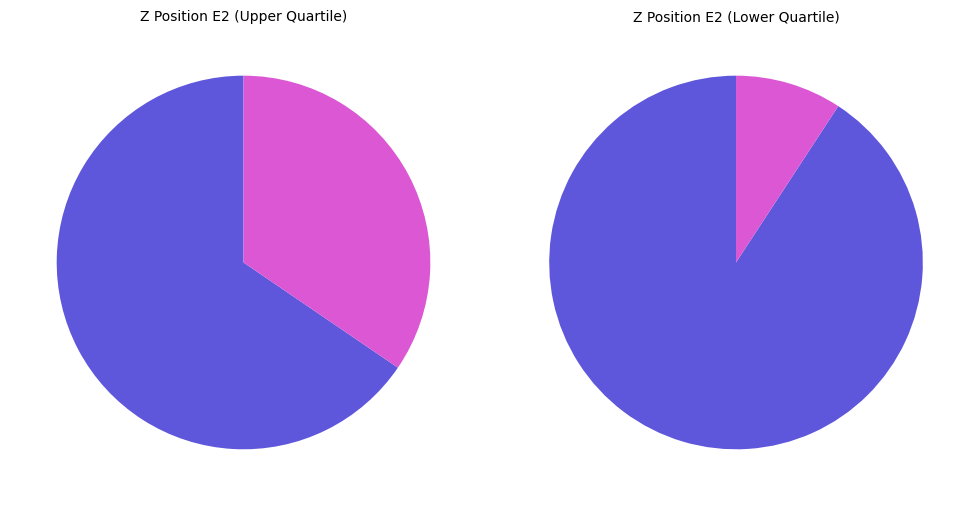

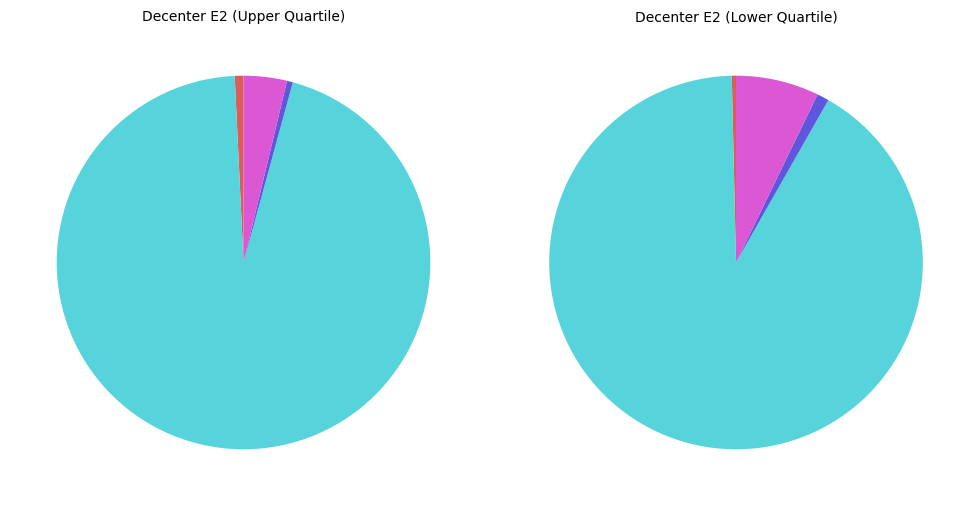

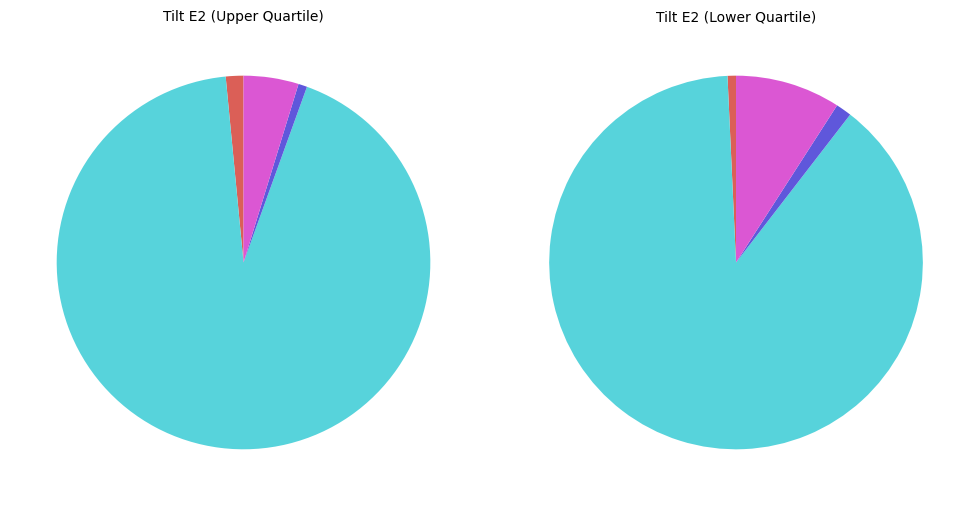

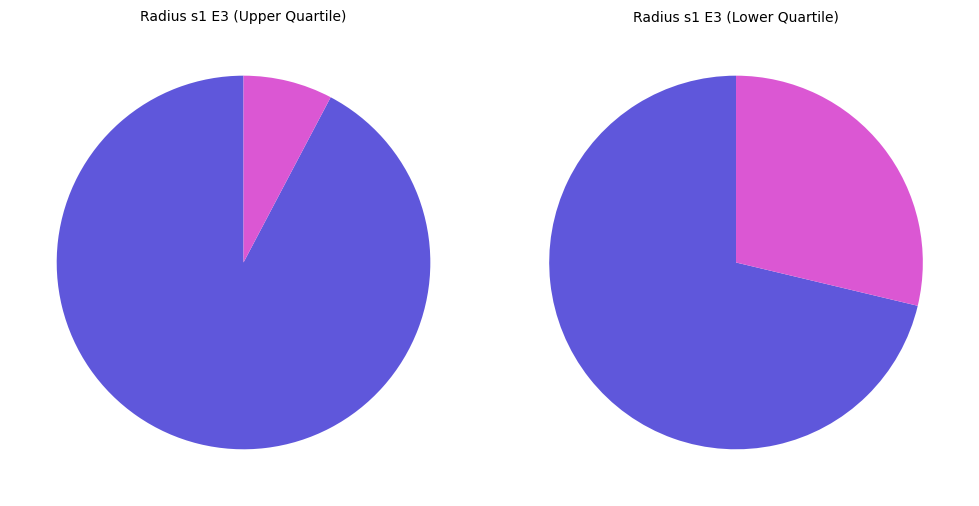

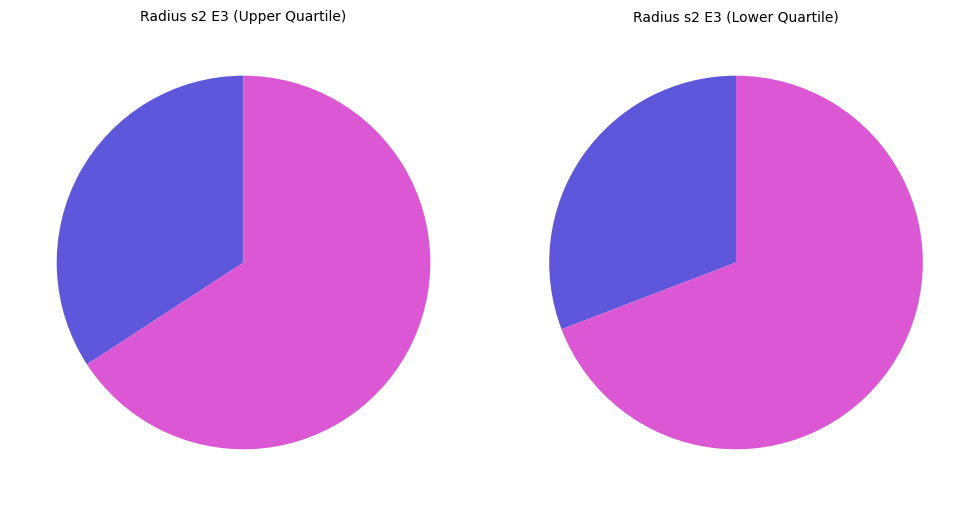

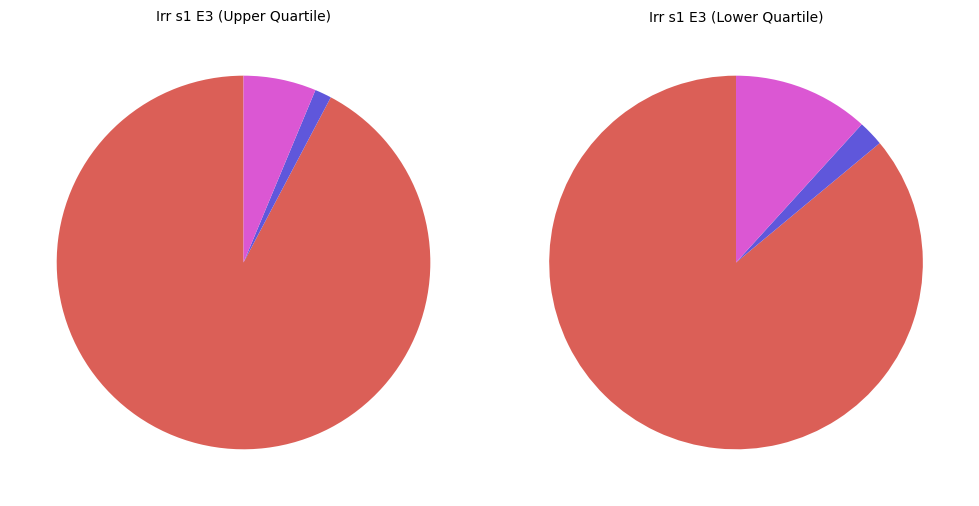

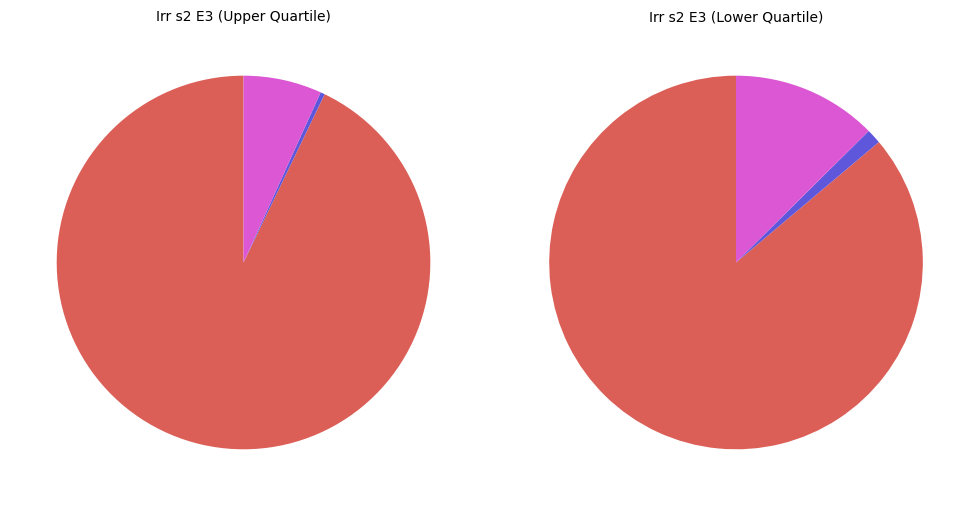

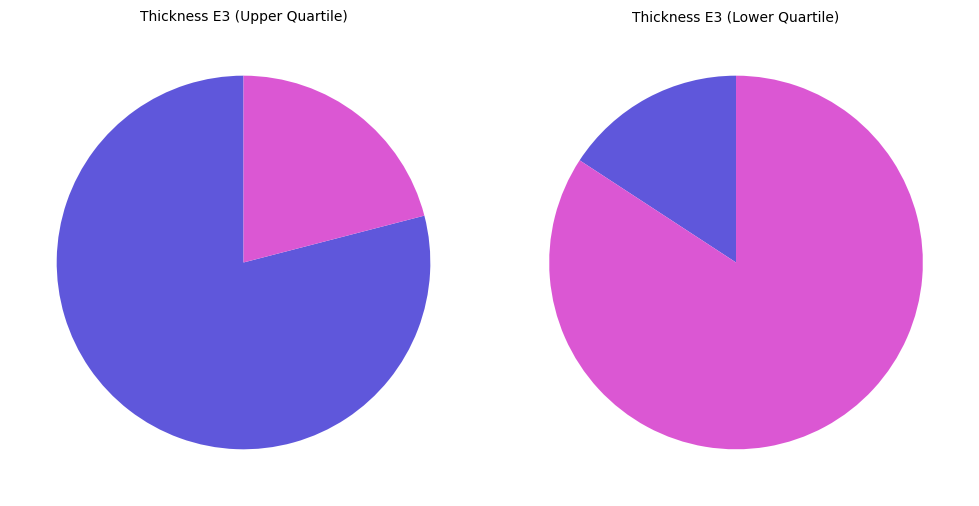

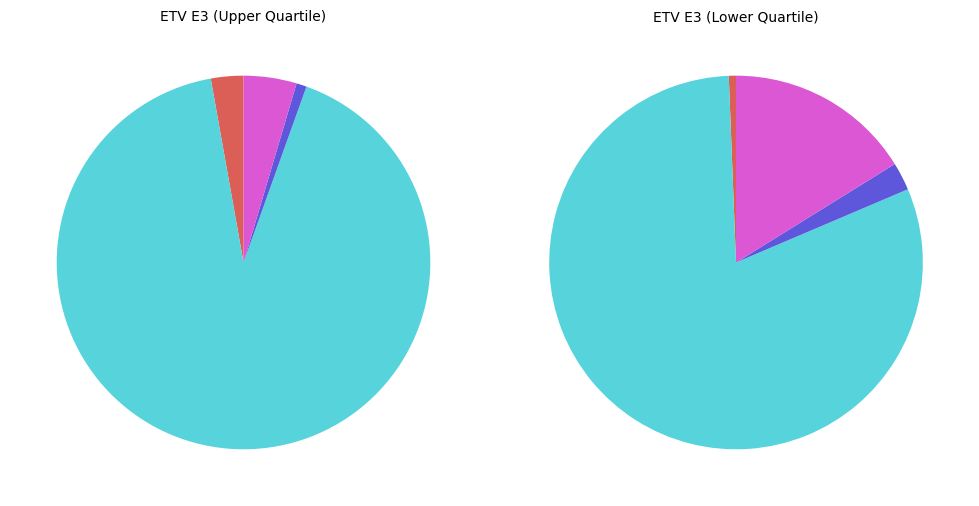

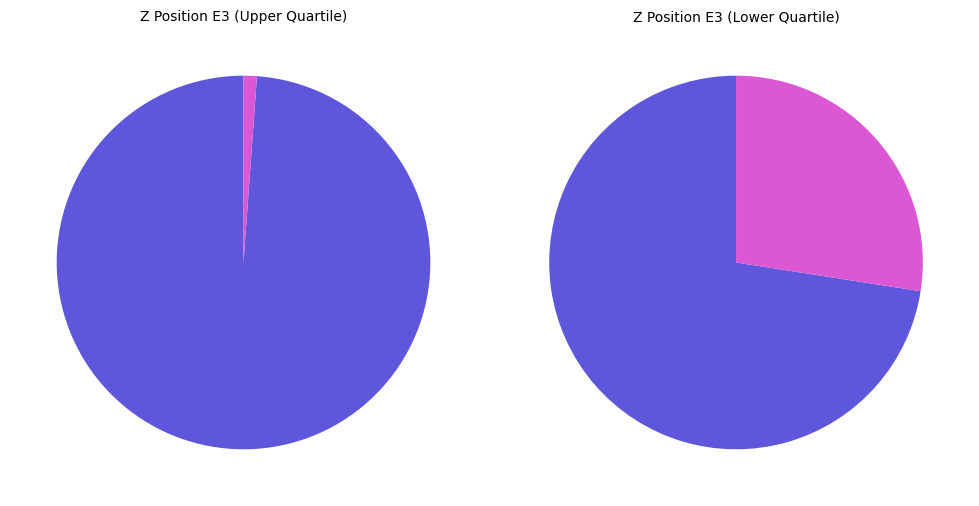

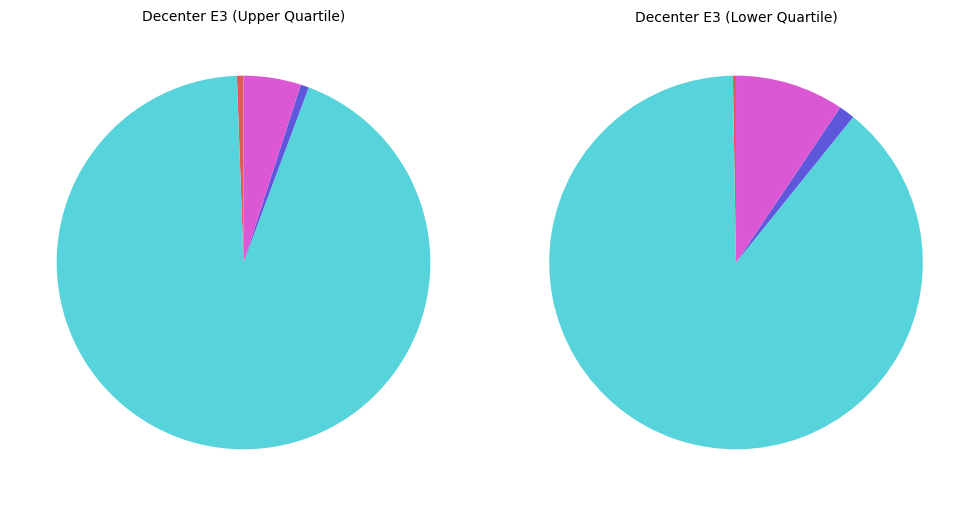

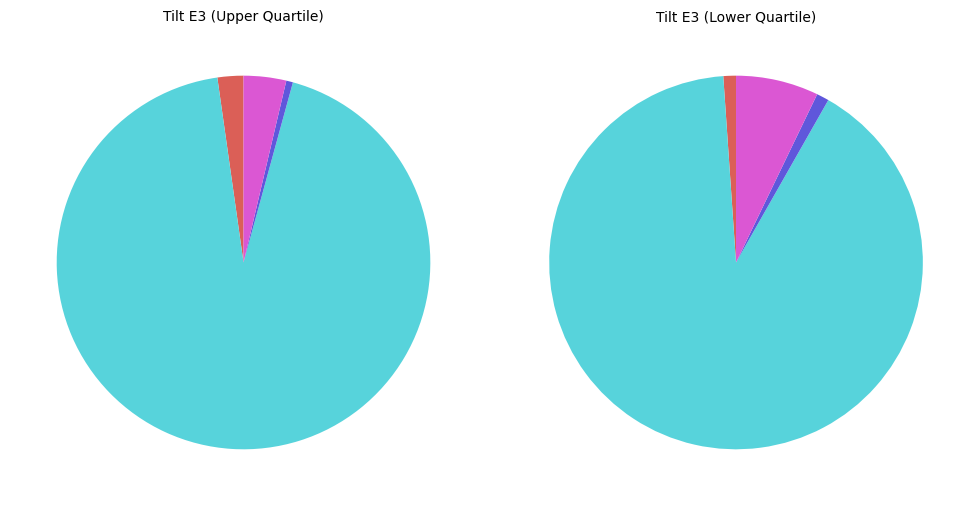

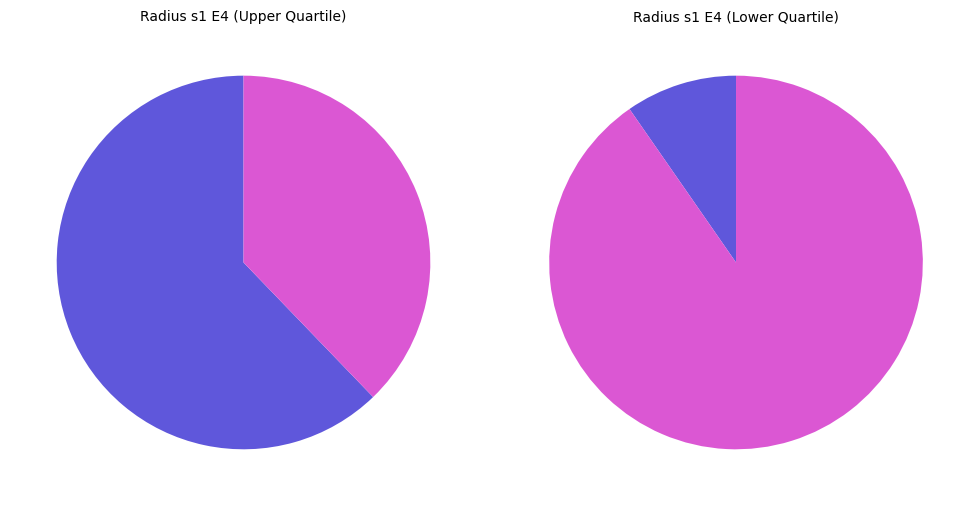

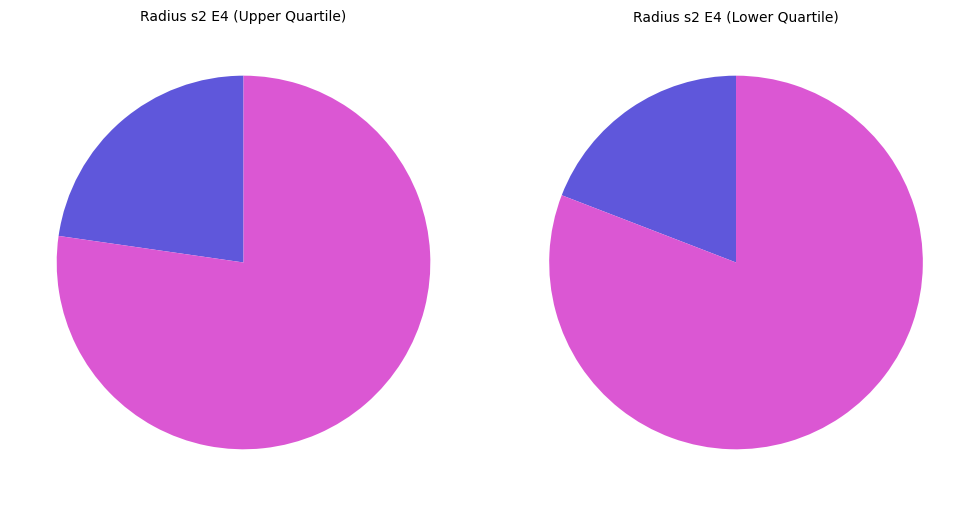

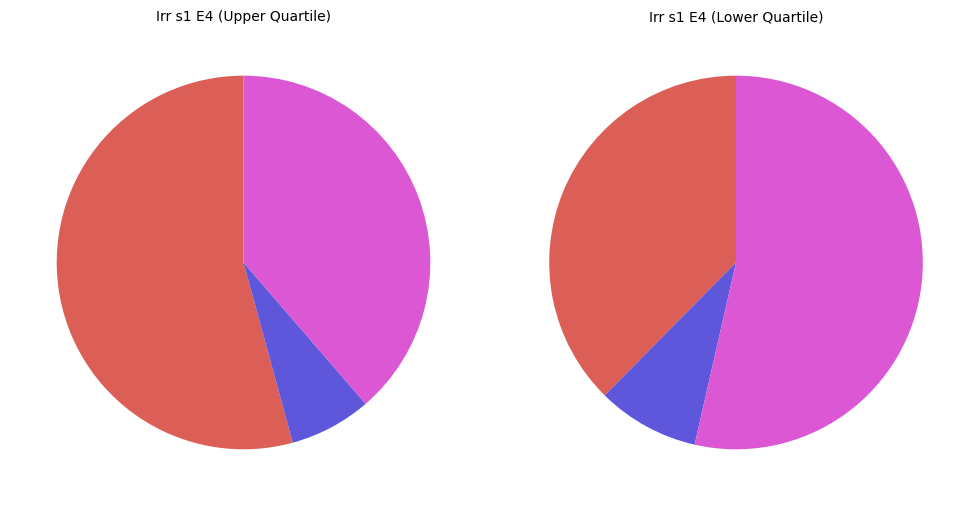

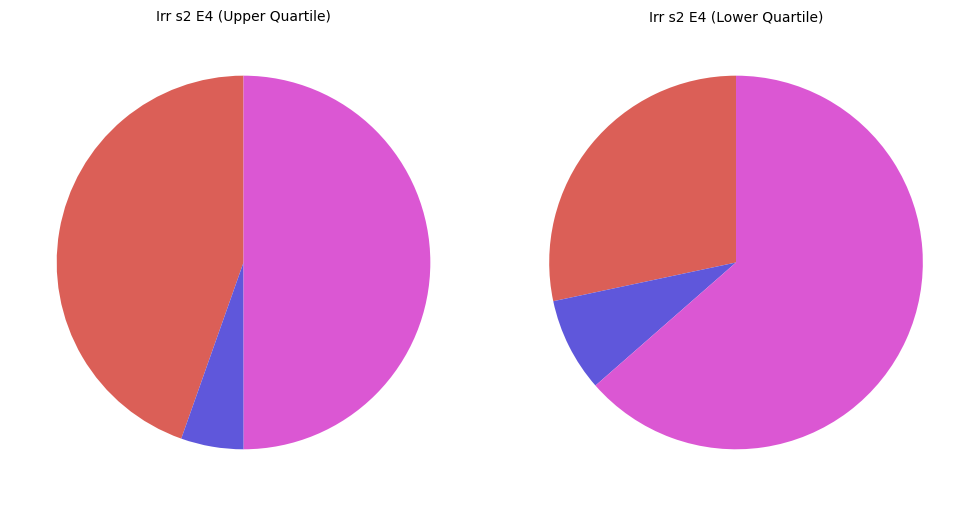

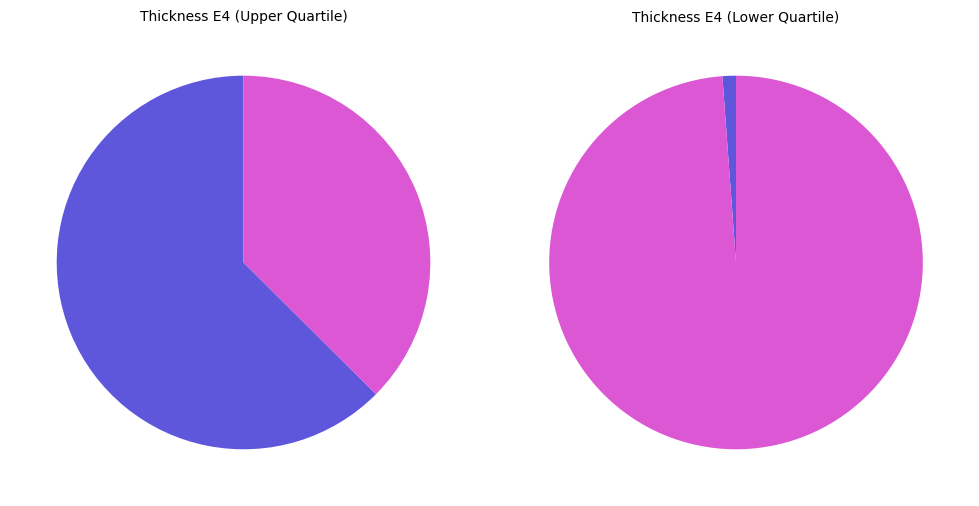

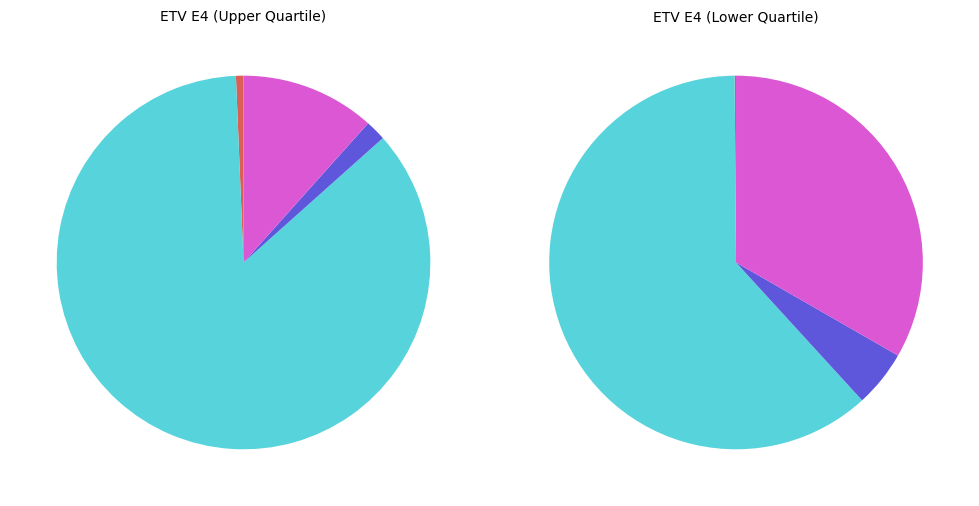

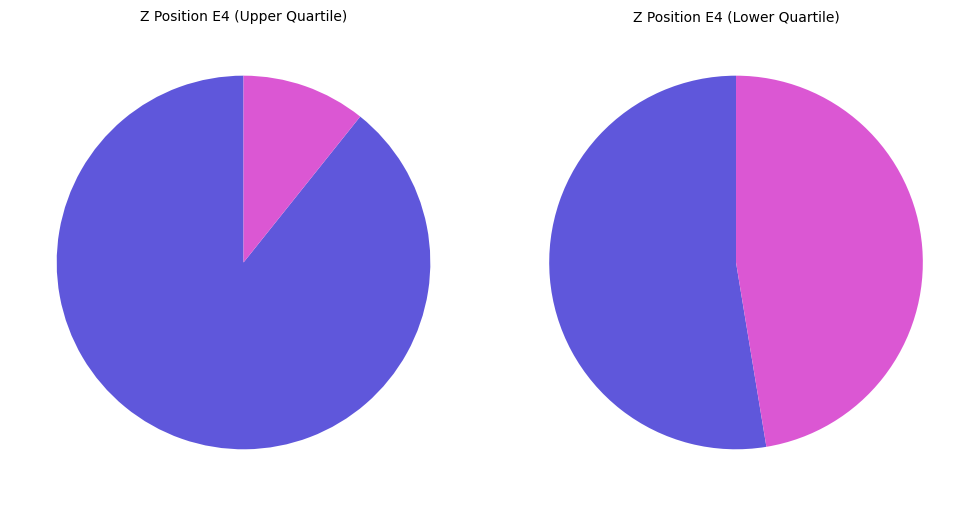

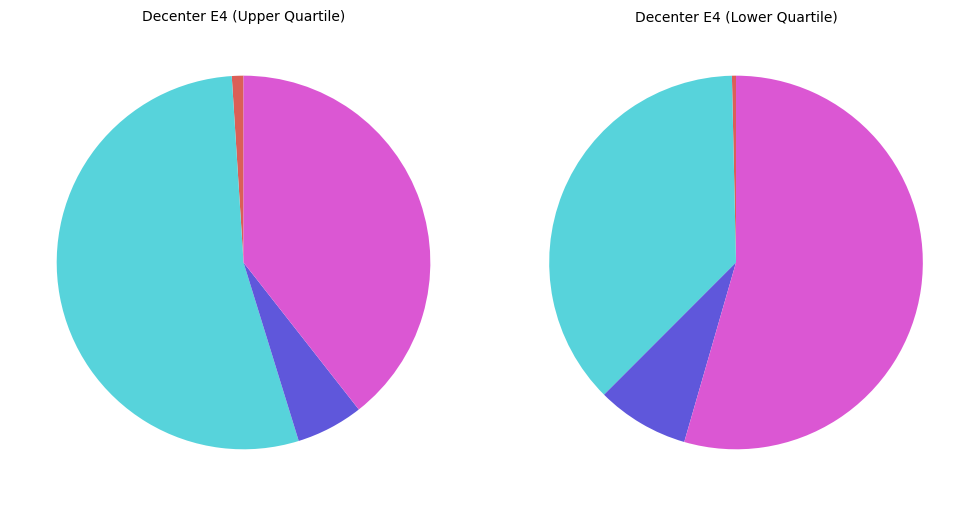

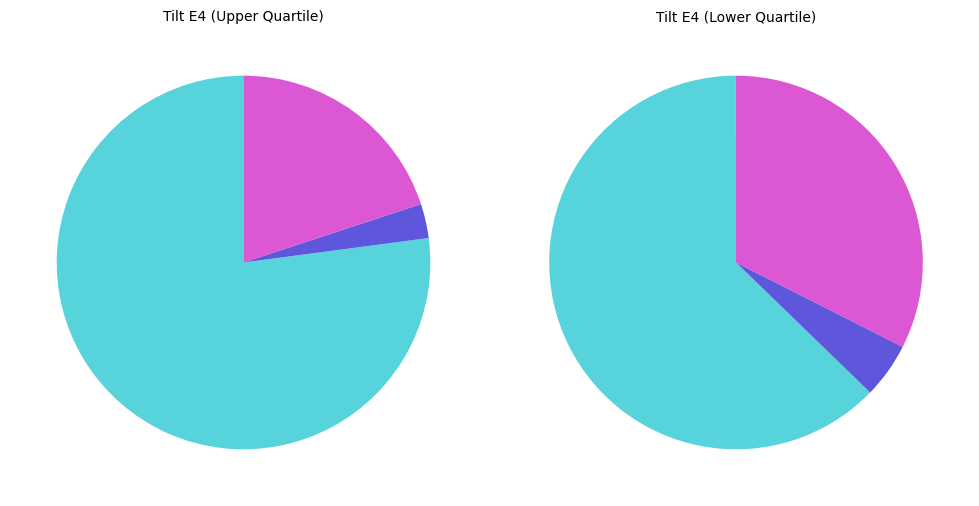

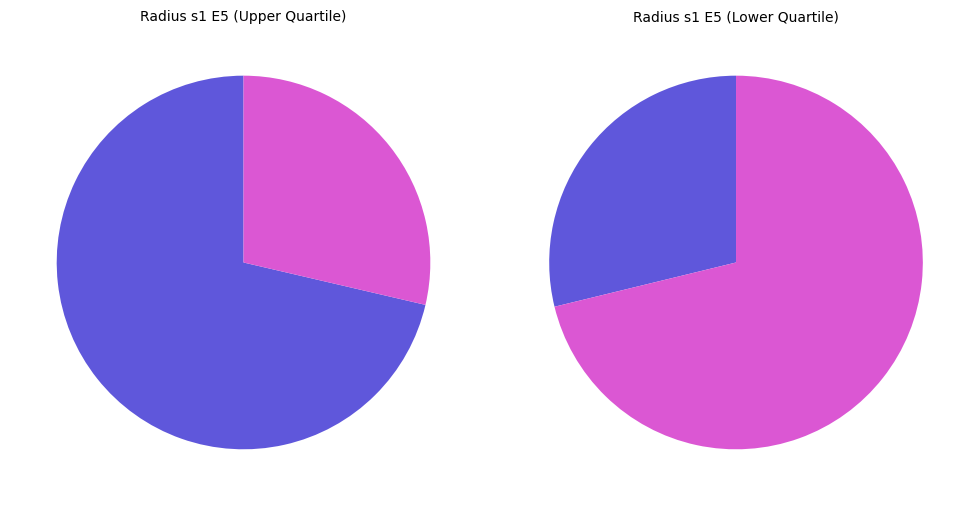

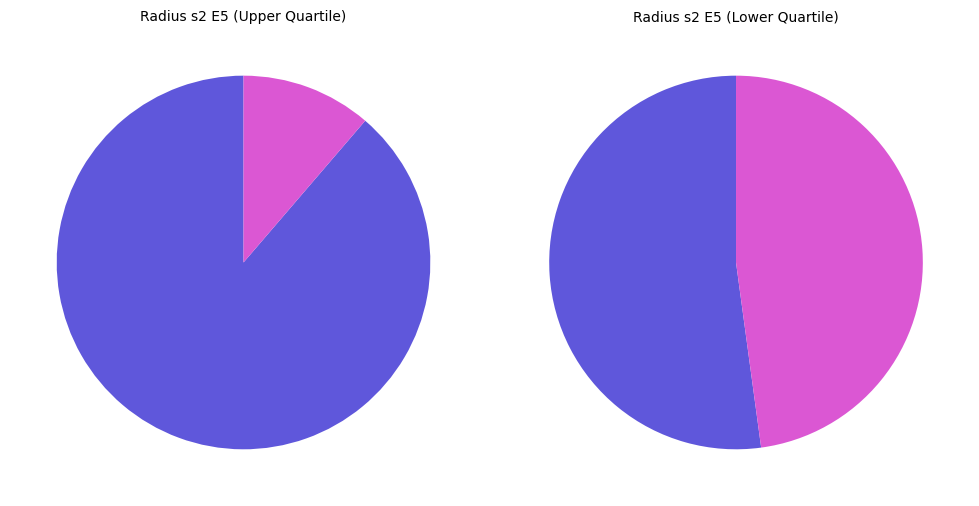

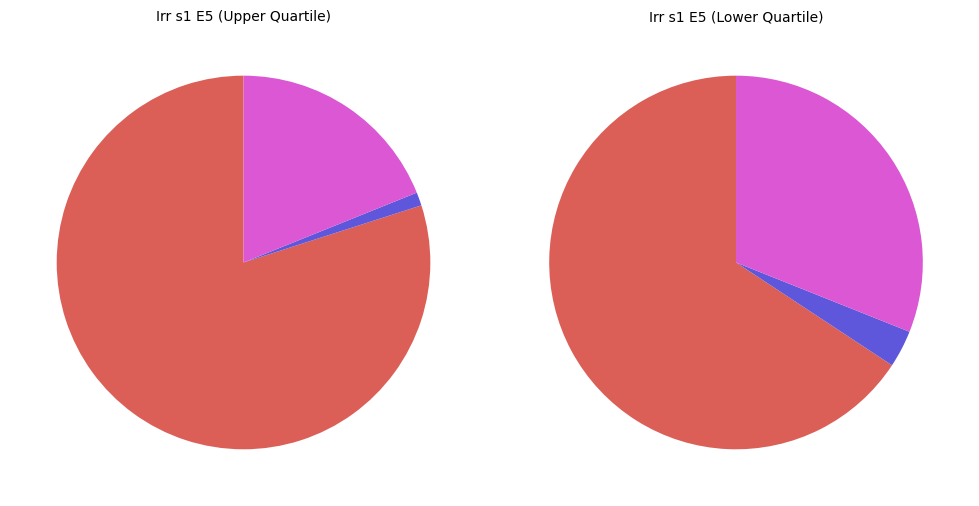

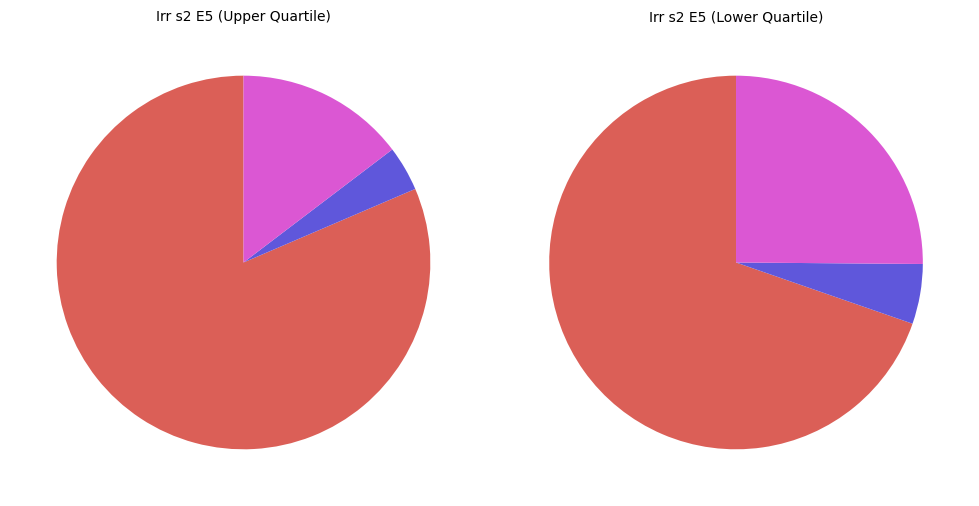

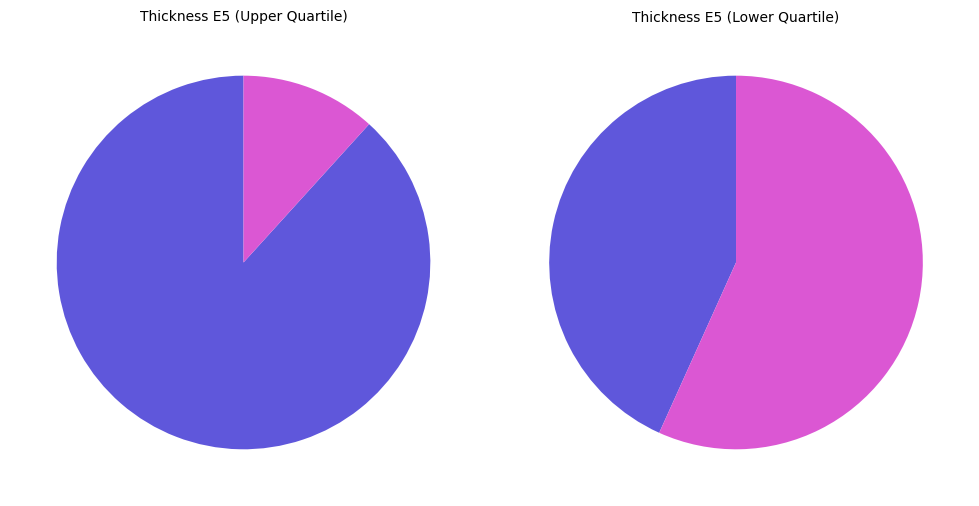

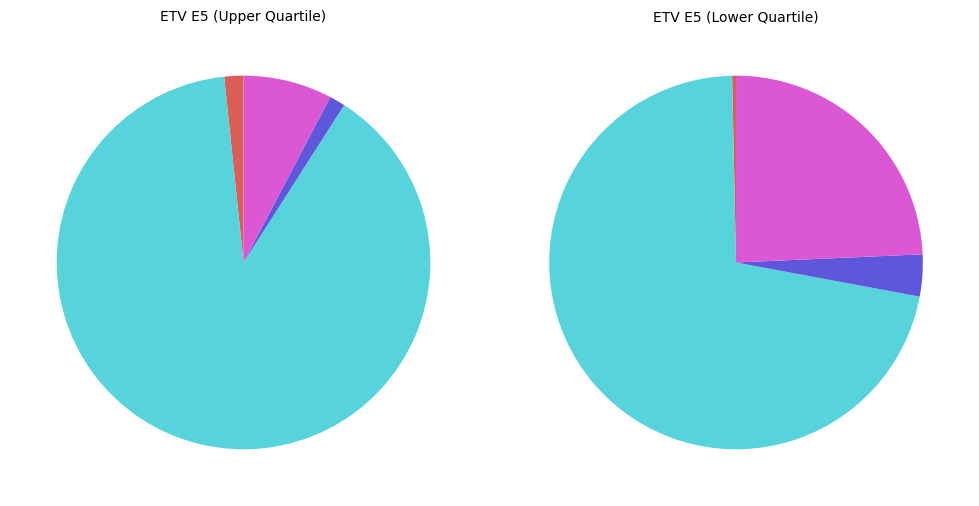

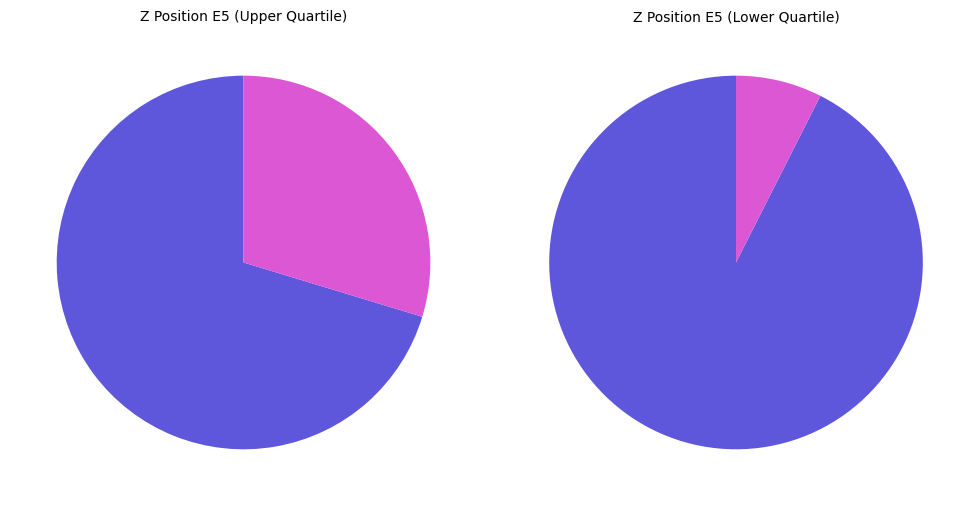

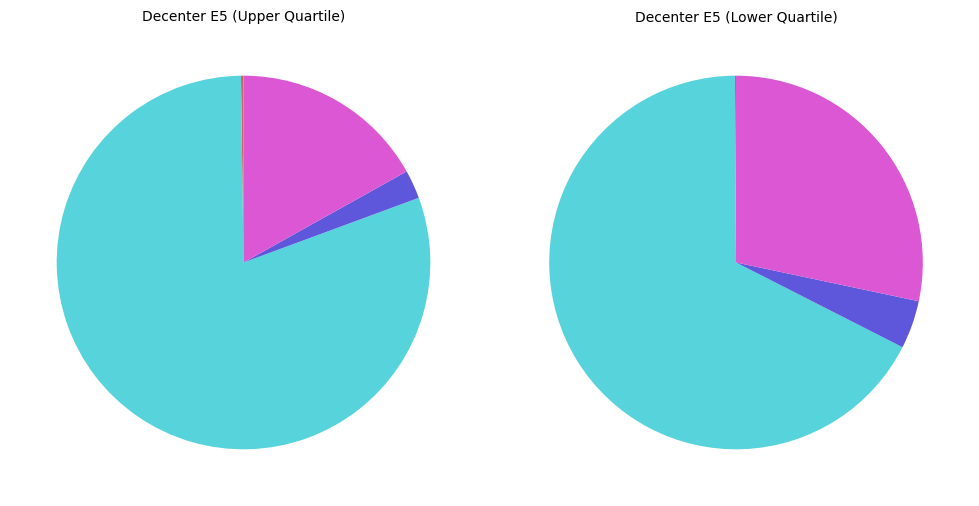

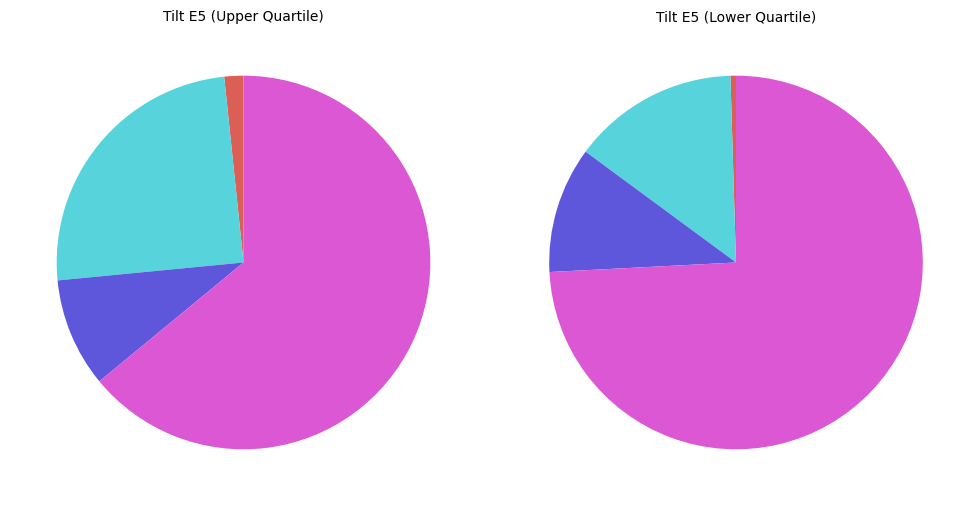

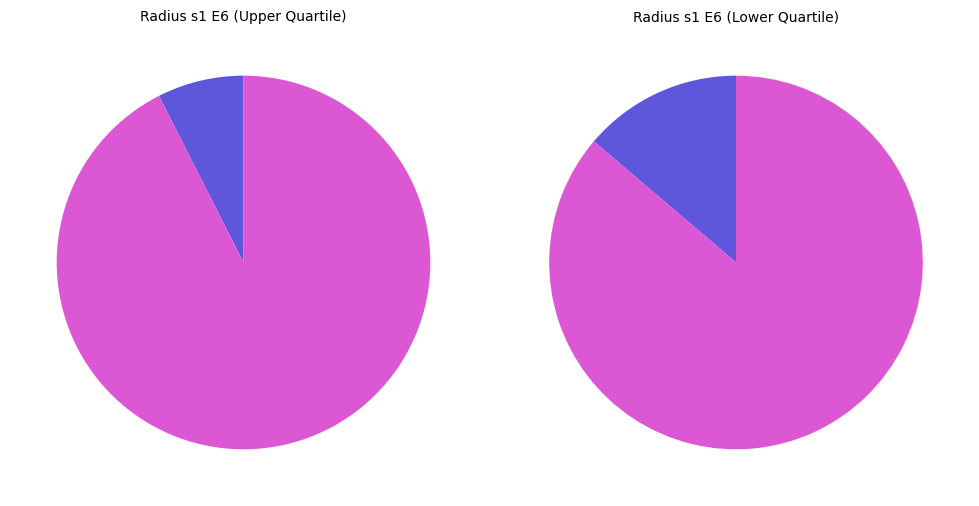

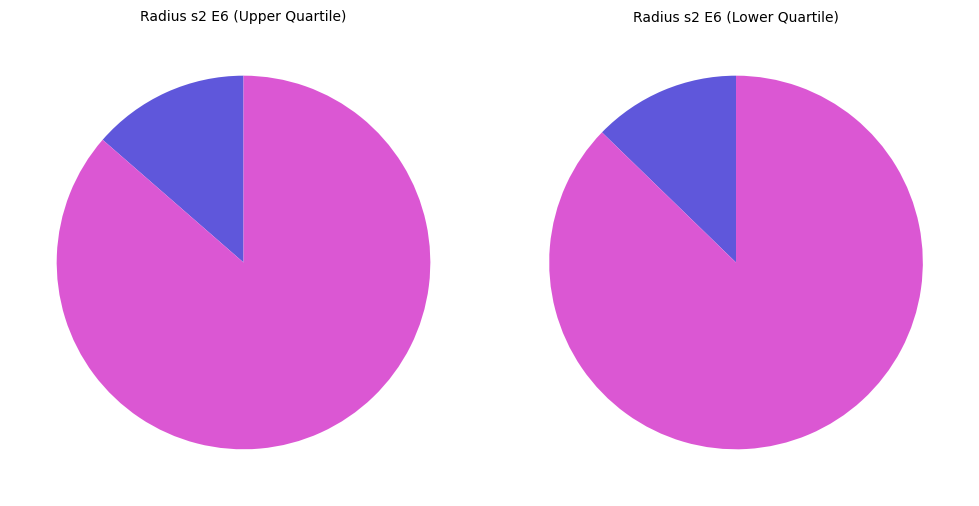

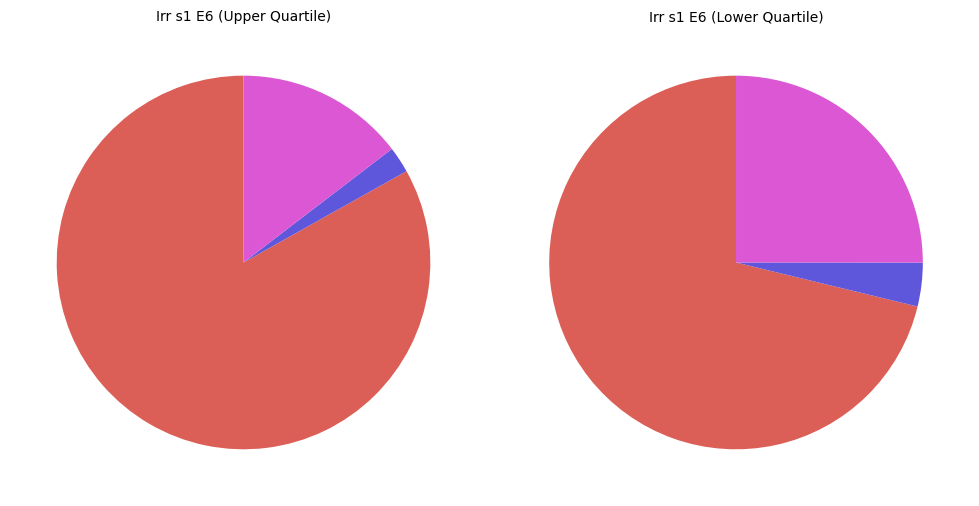

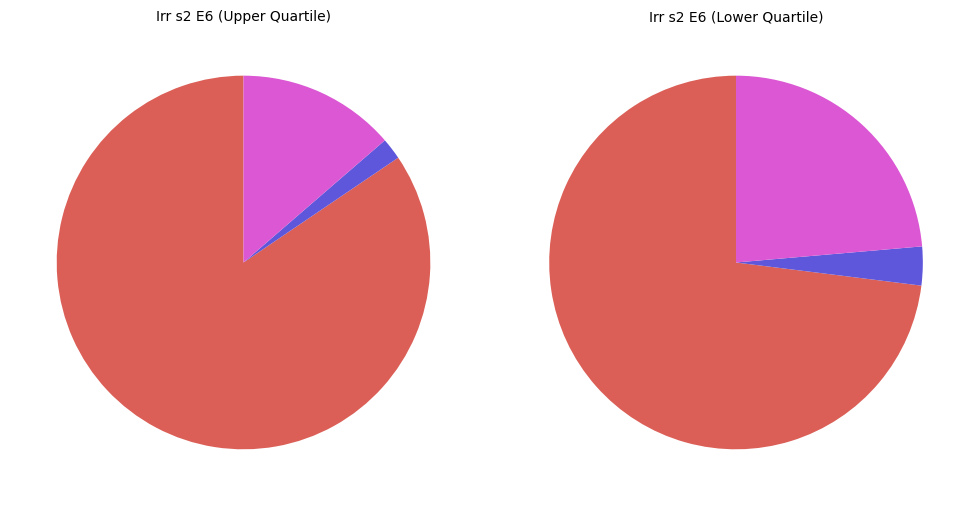

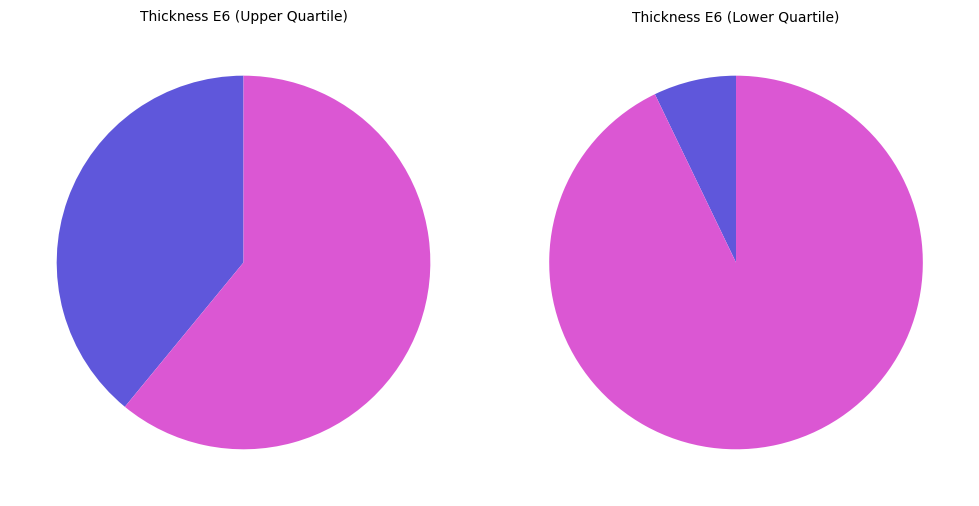

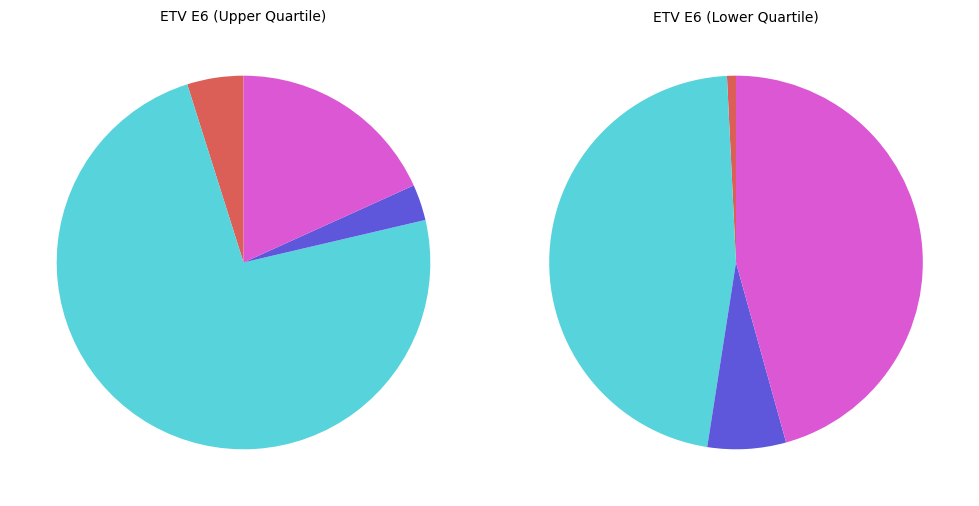

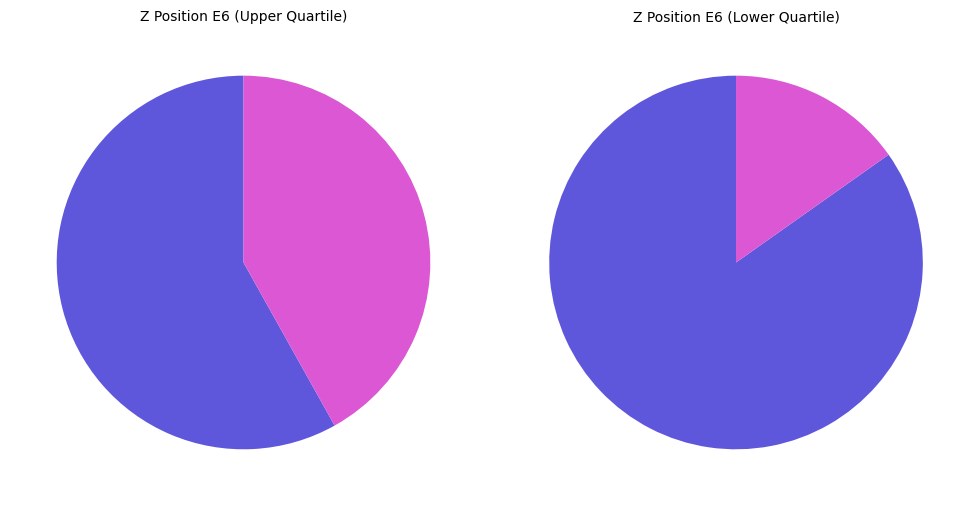

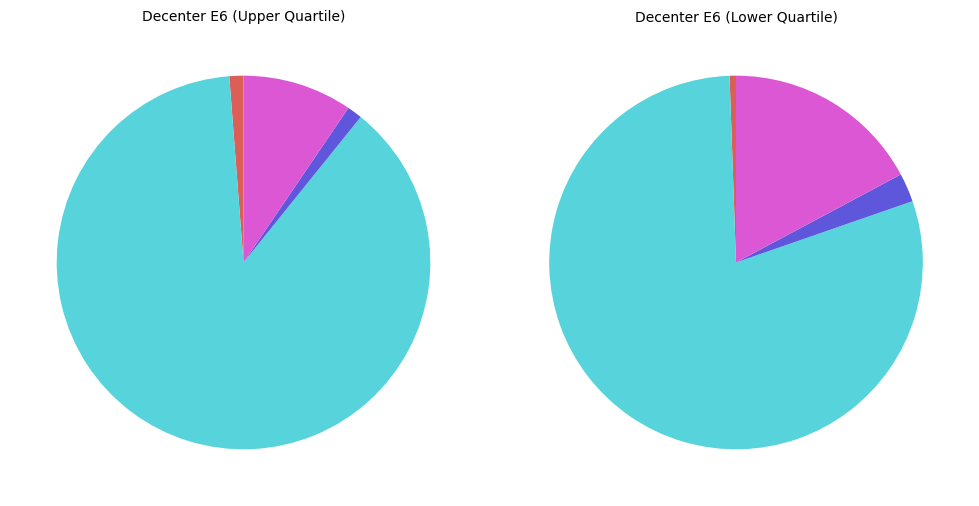

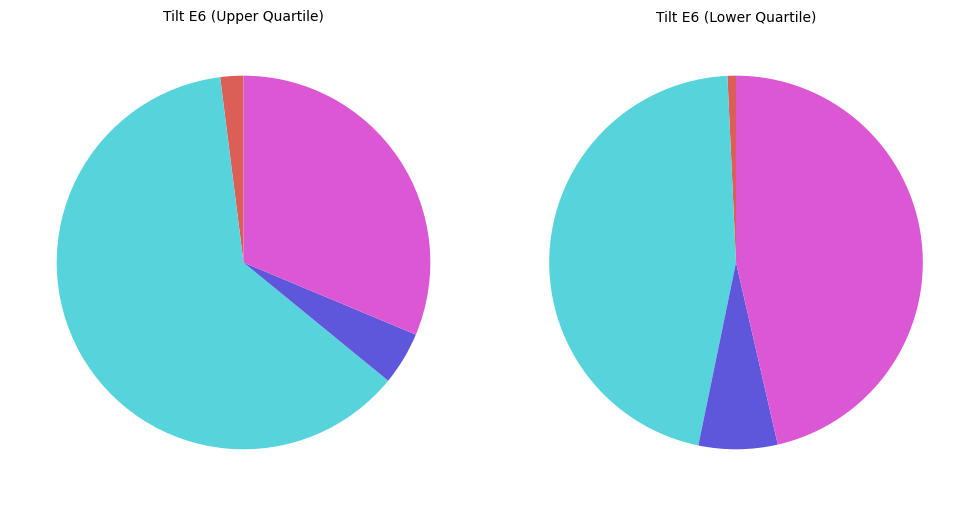

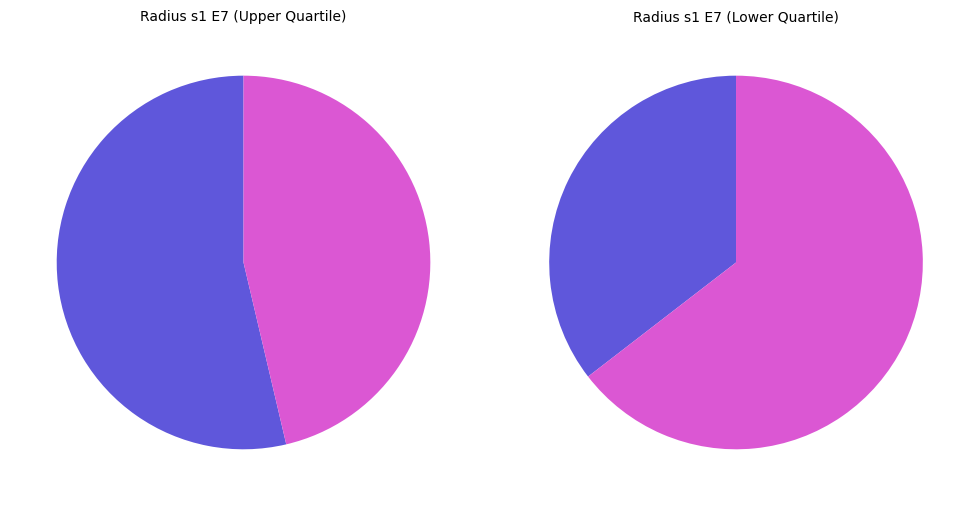

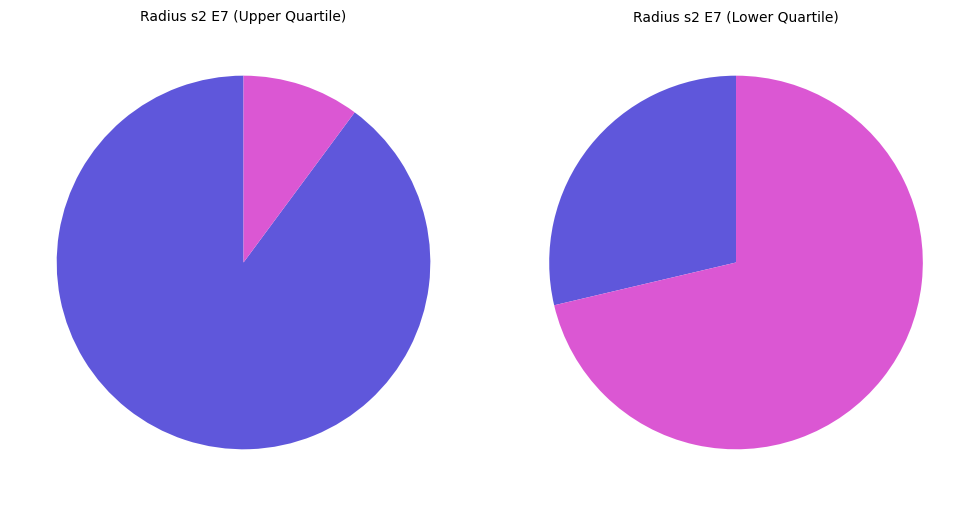

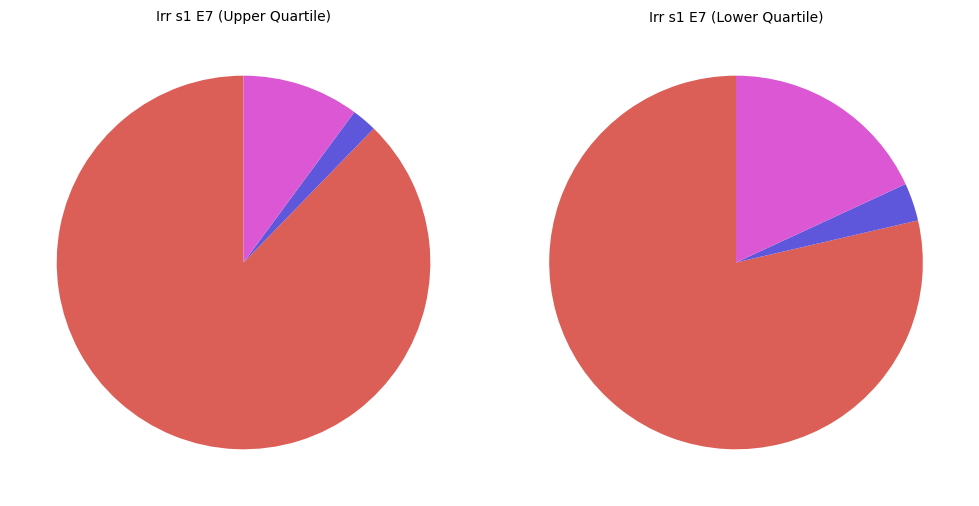

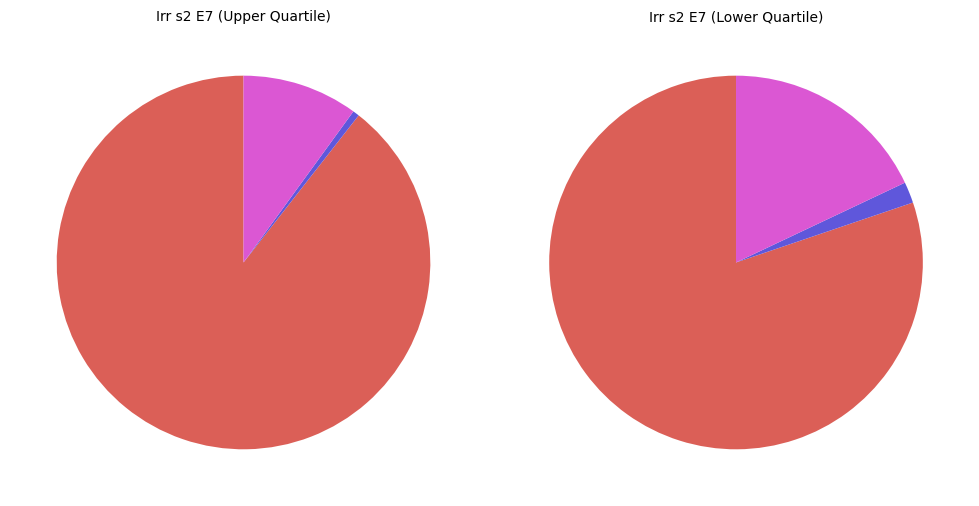

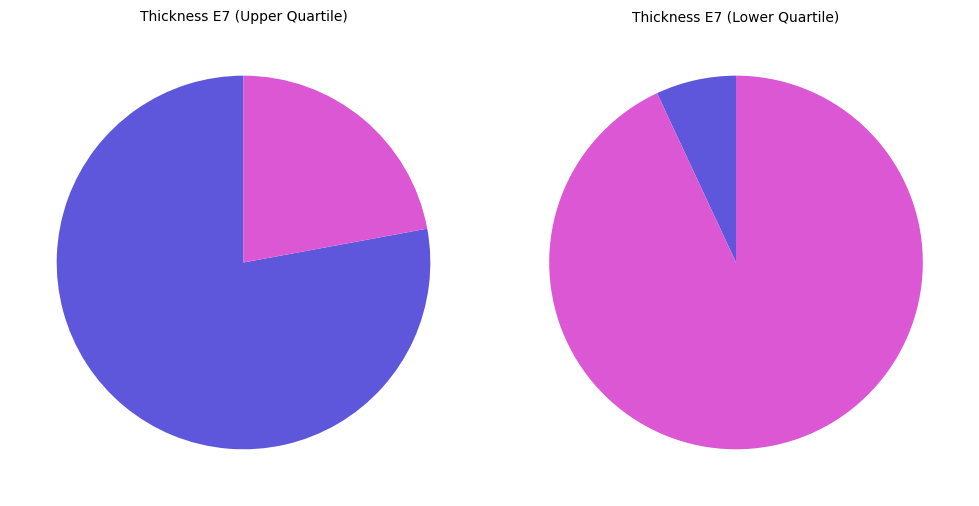

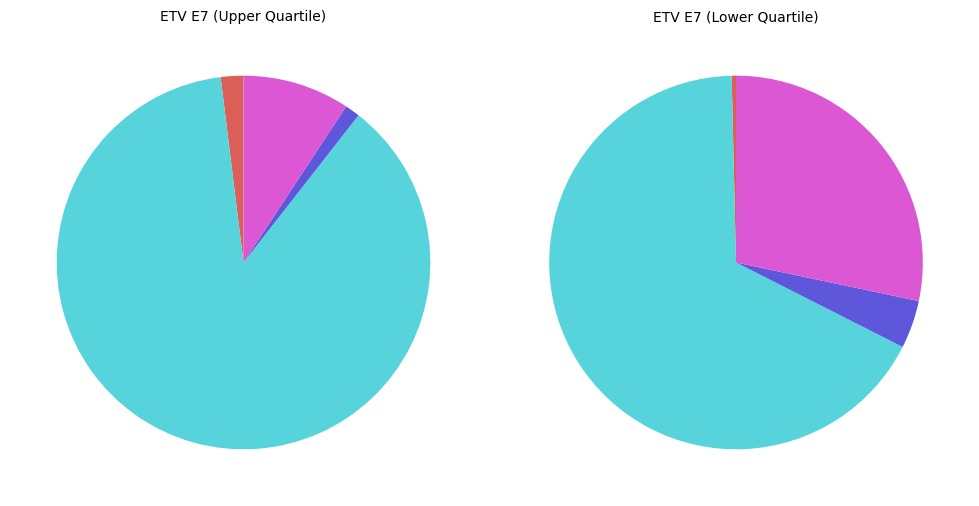

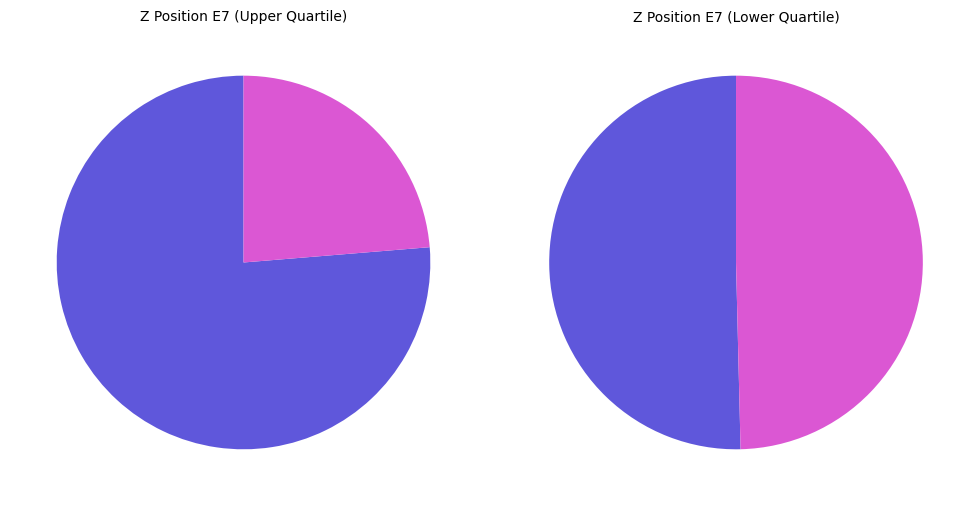

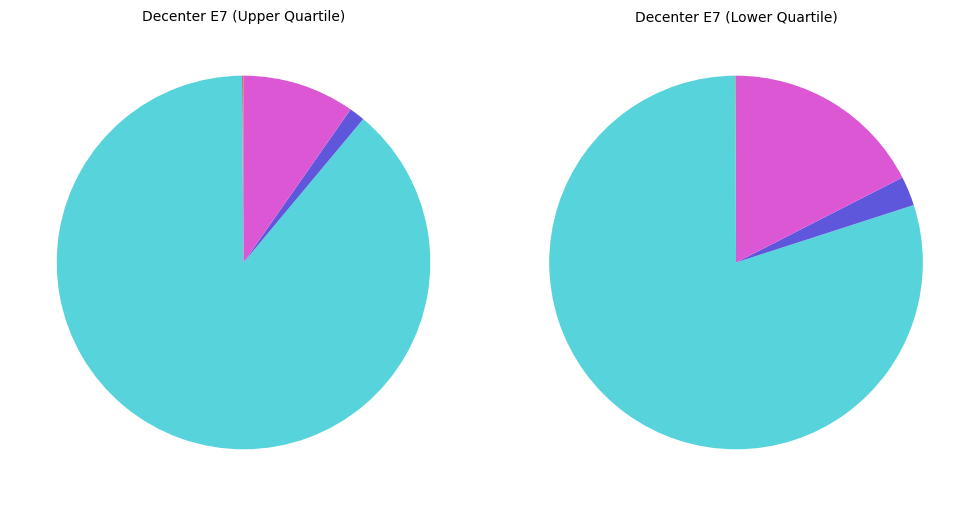

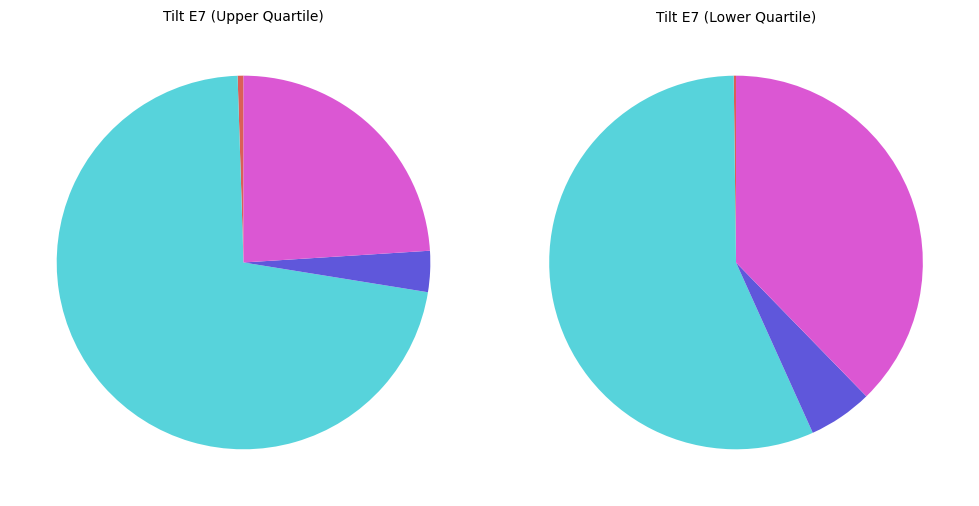

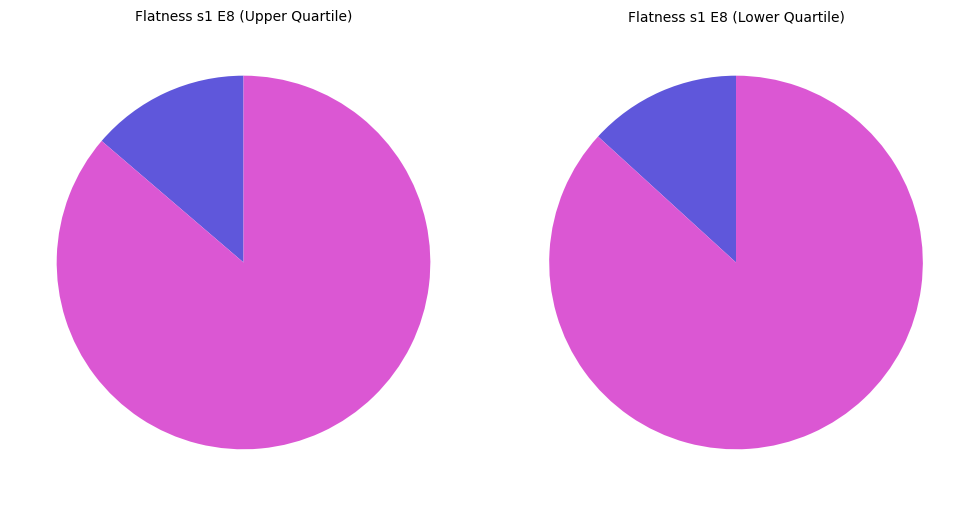

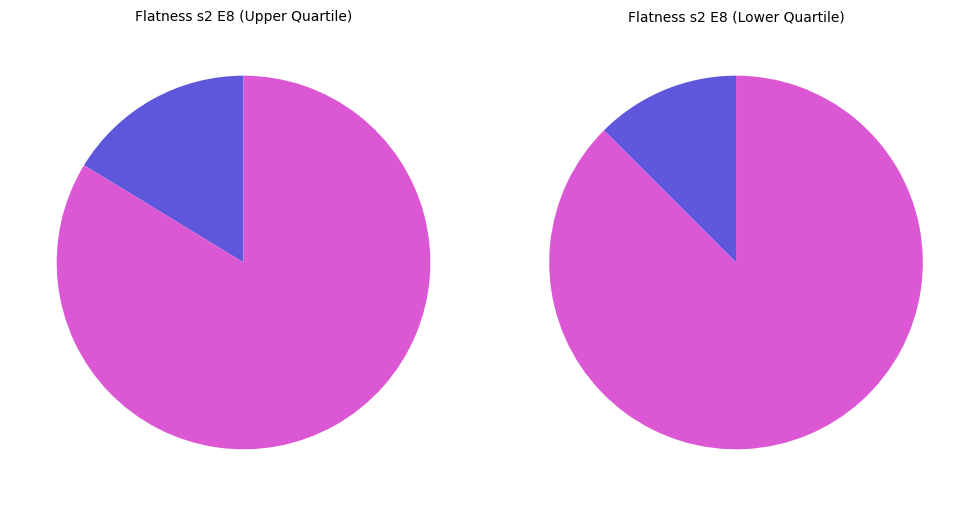

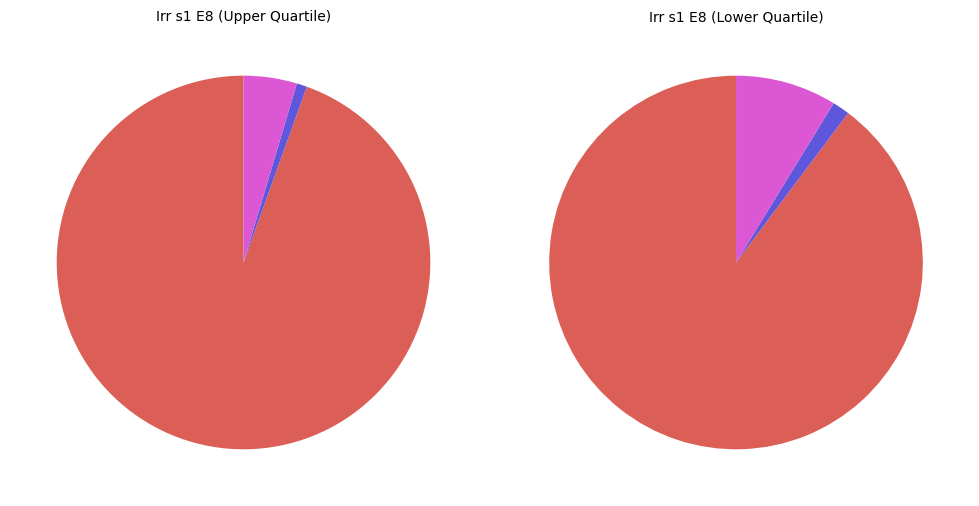

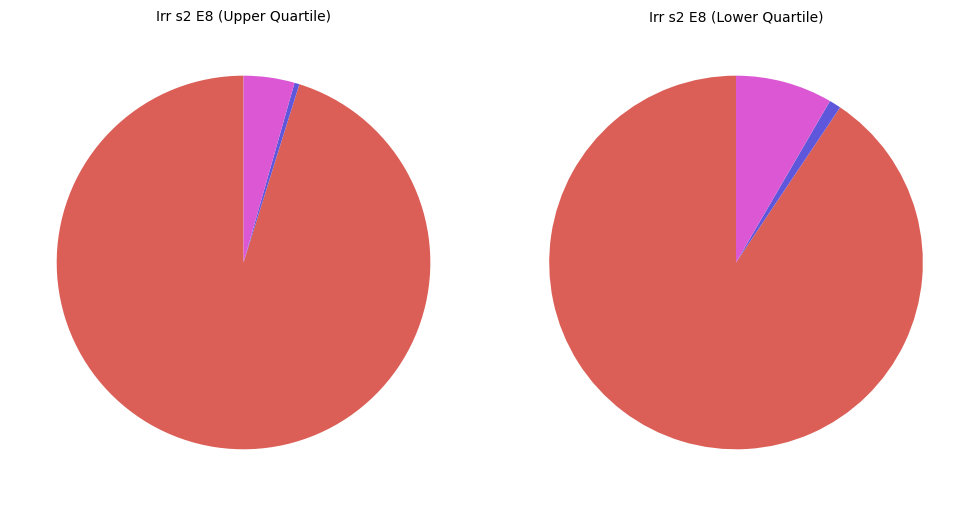

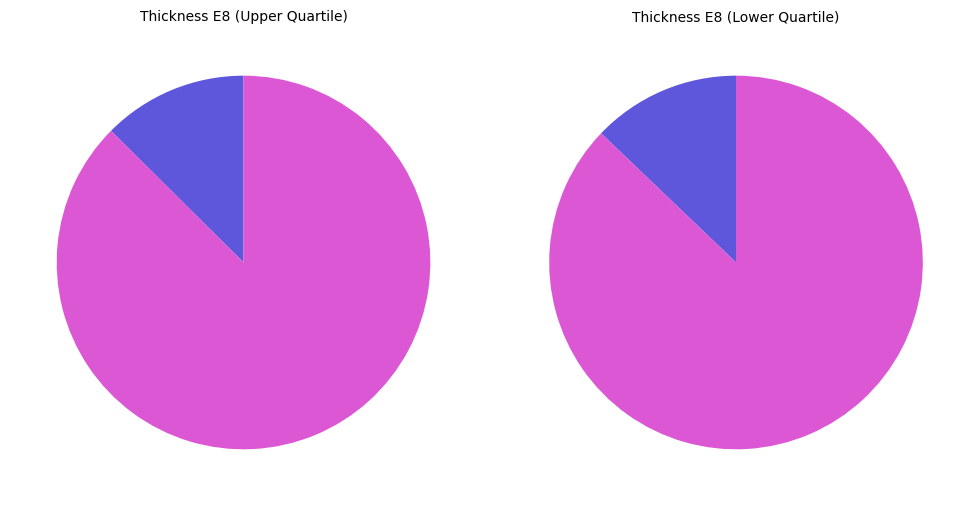

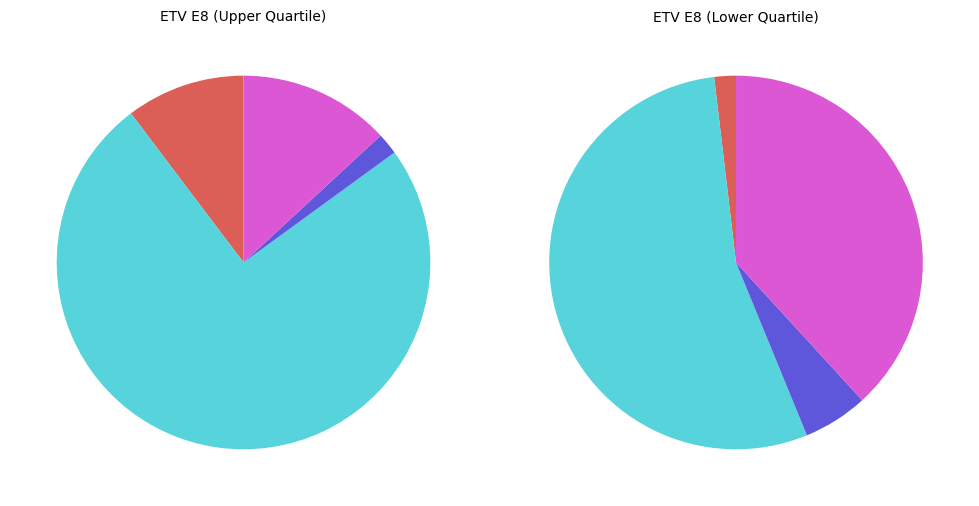

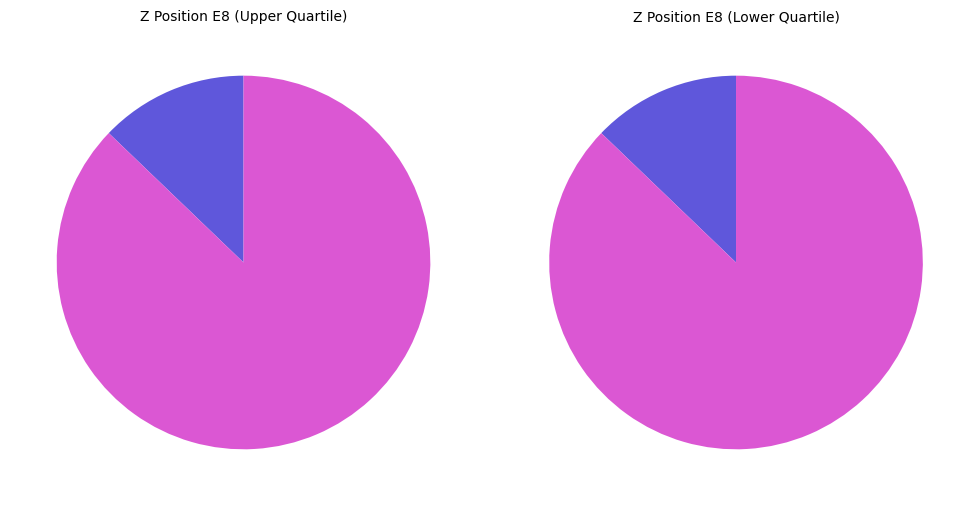

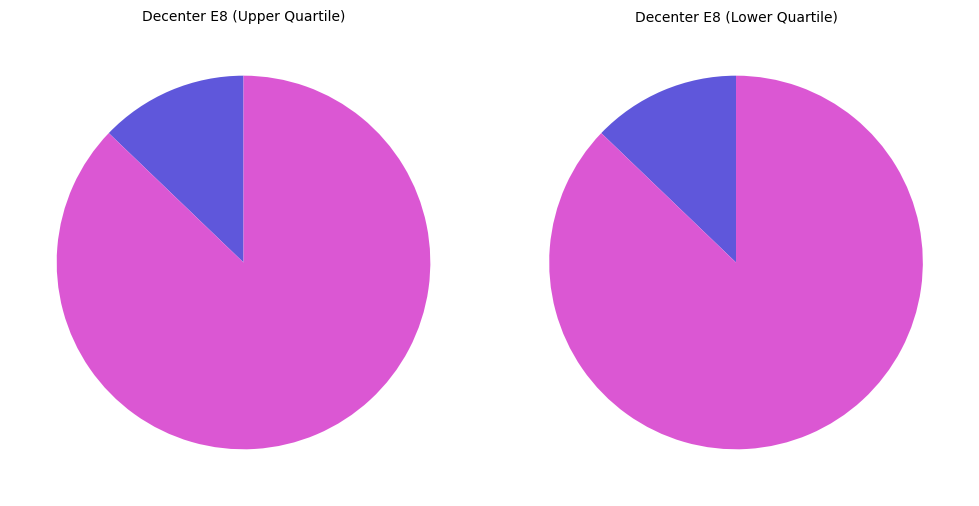

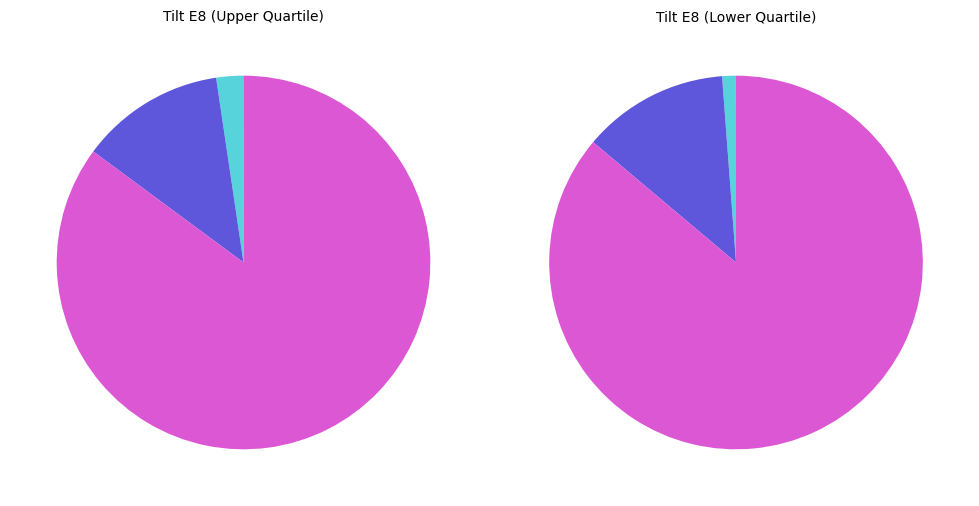

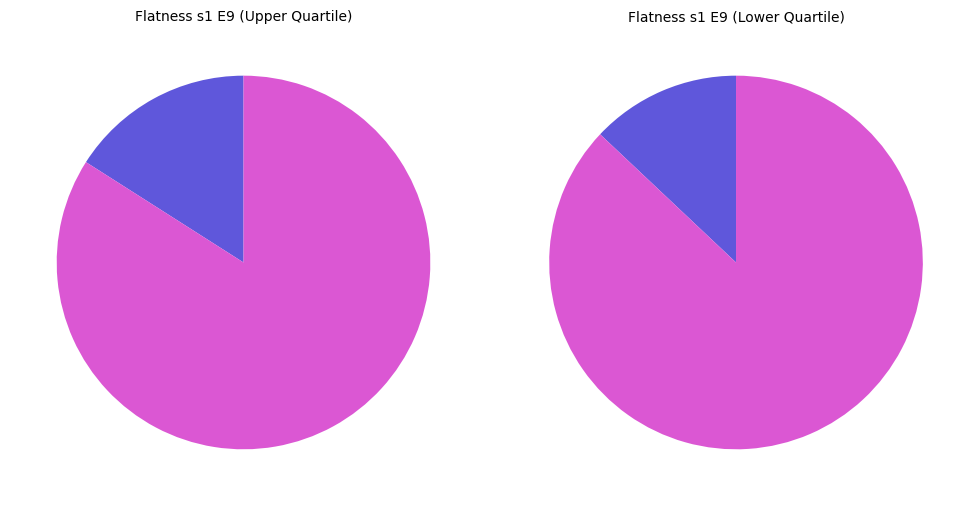

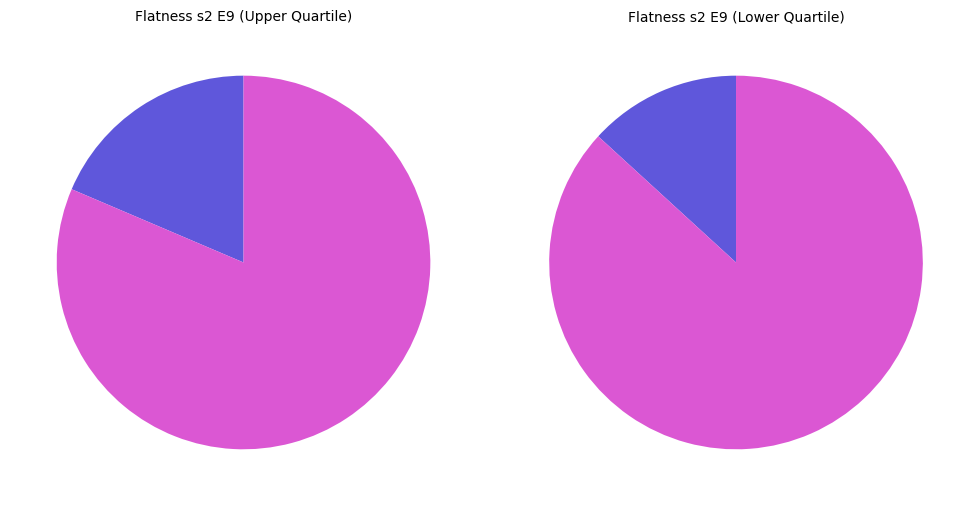

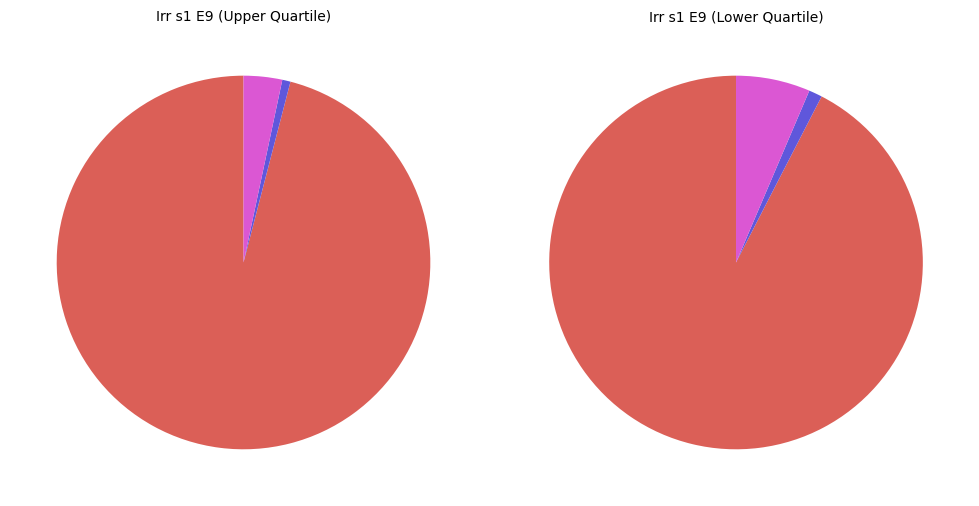

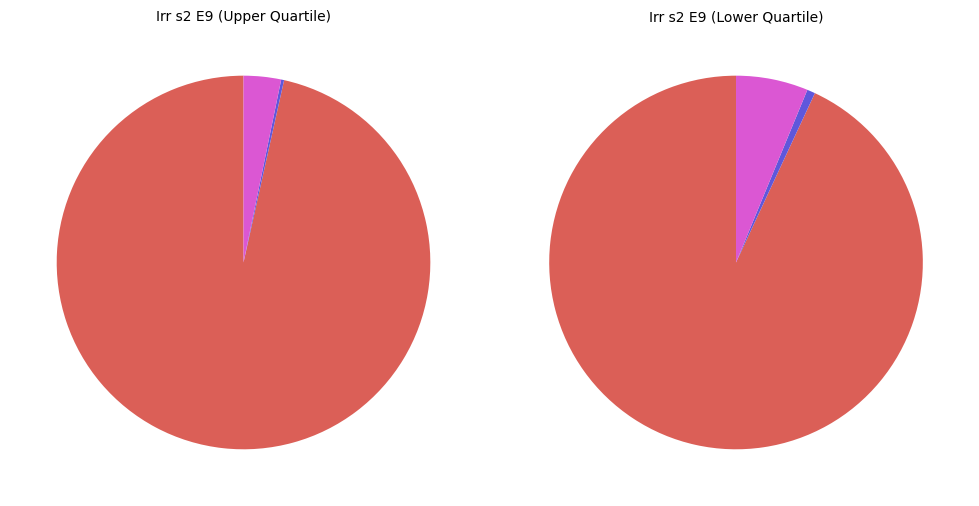

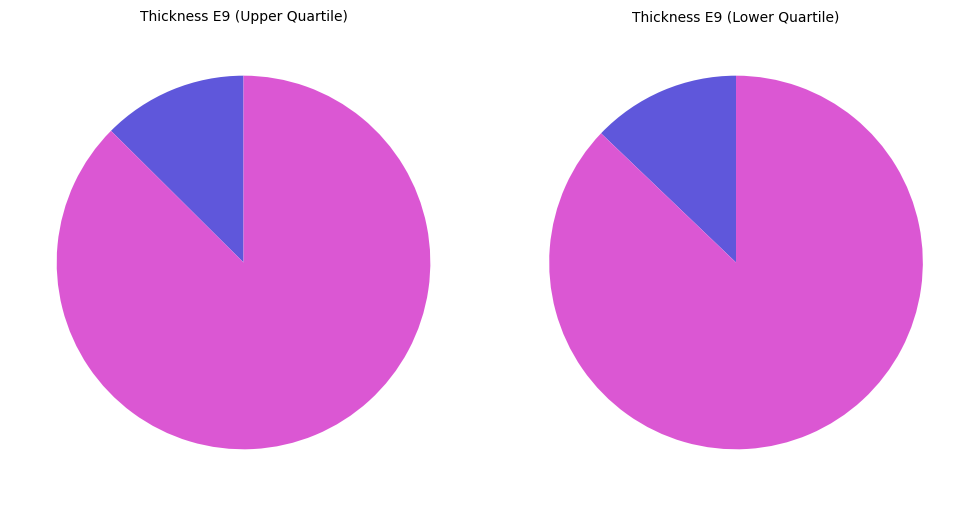

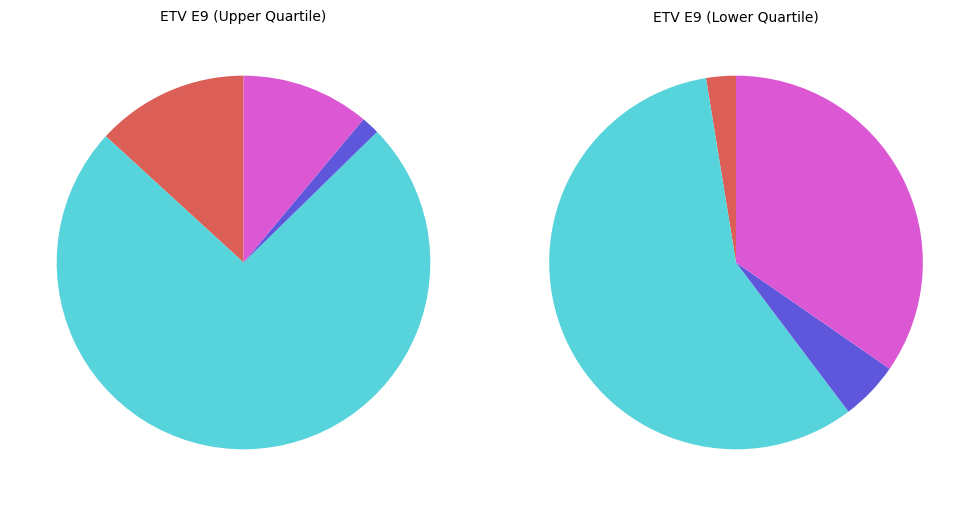

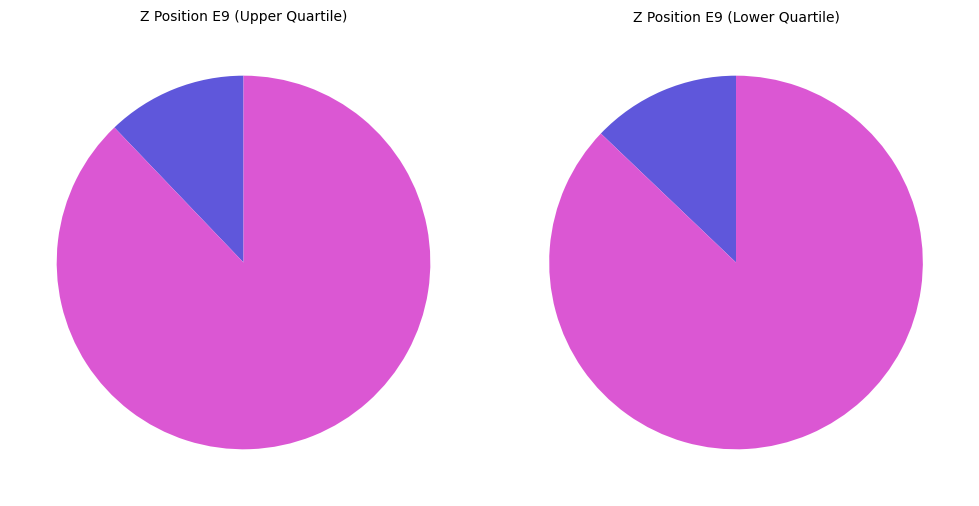

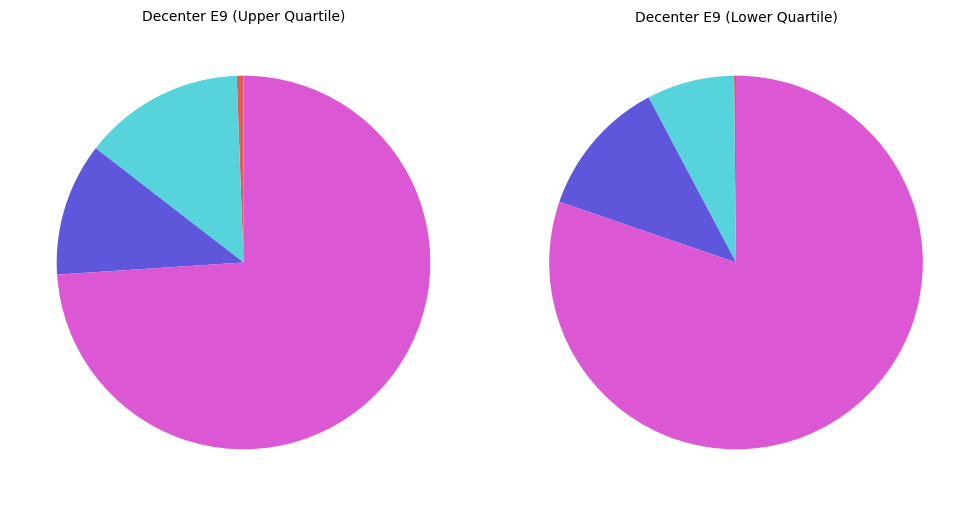

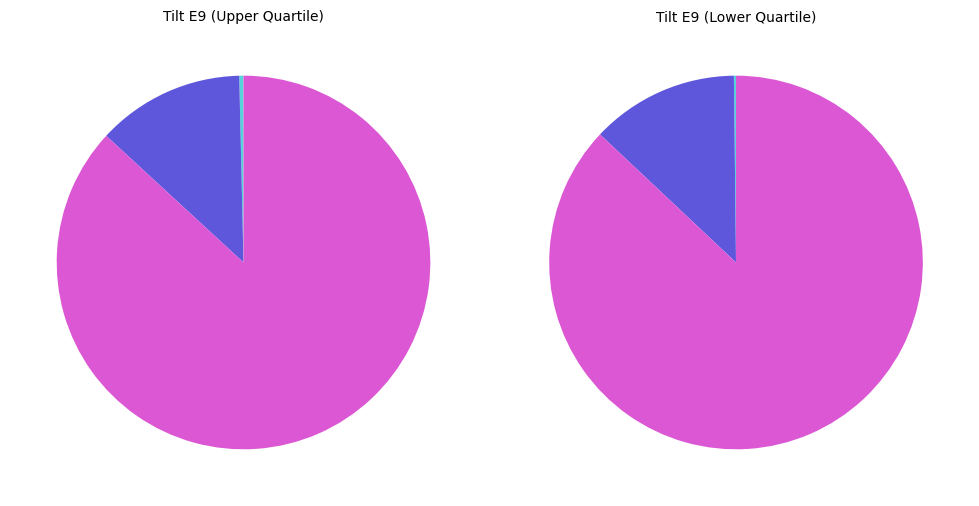

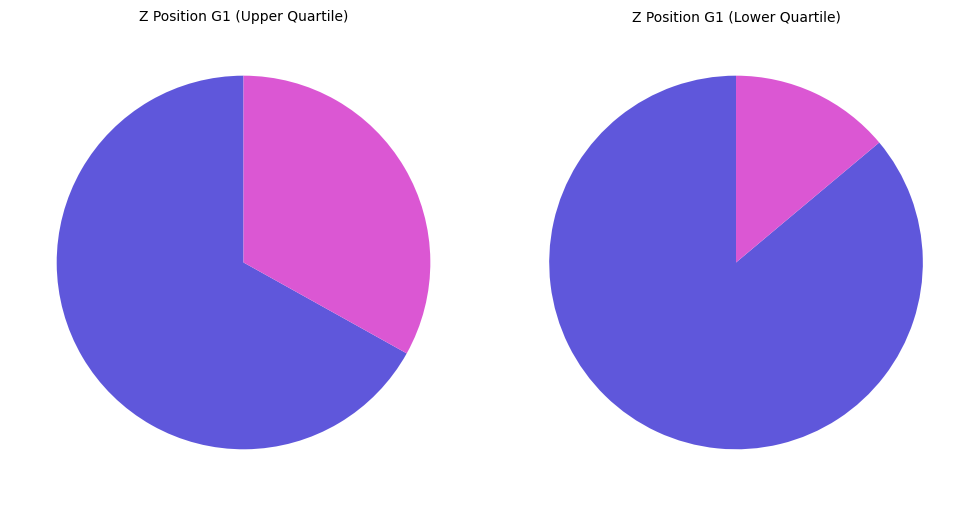

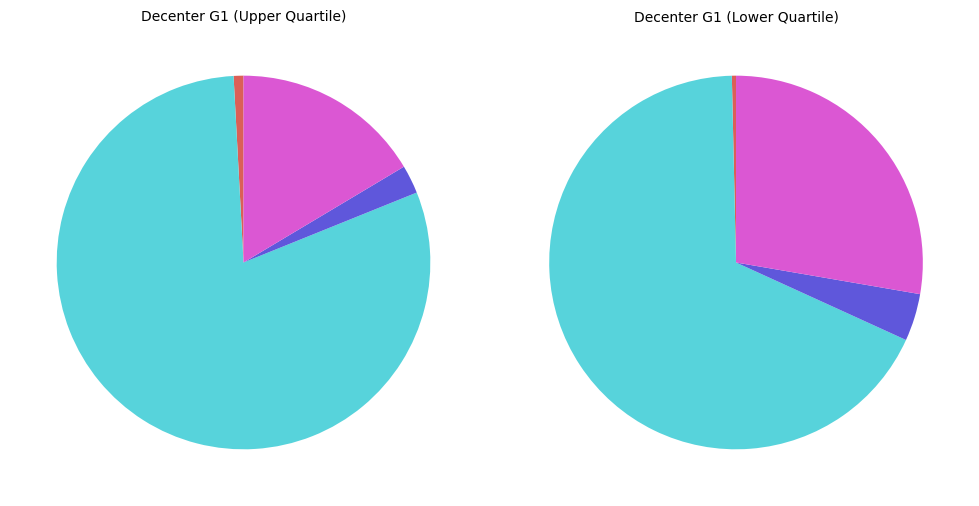

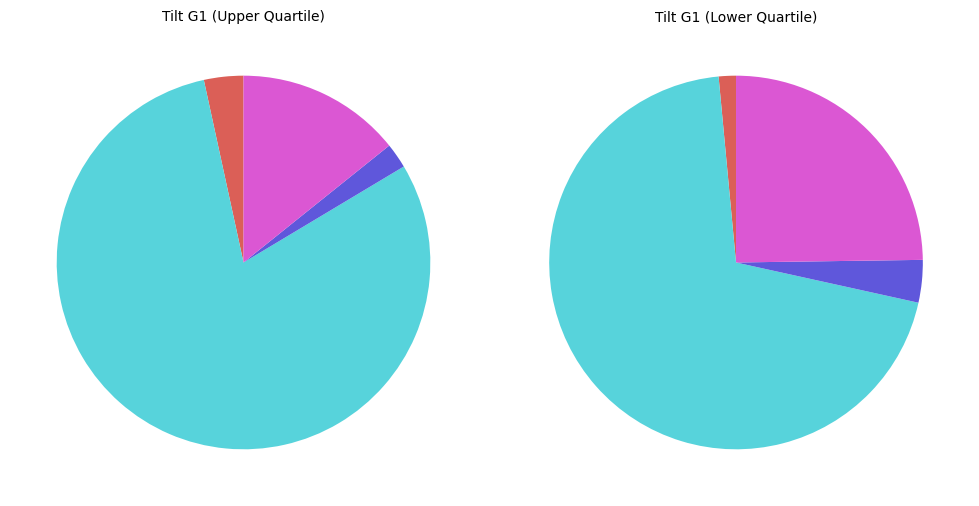

In [ ]:
# Adjust the figure size to make the pies smaller
plt.rcParams['figure.figsize'] = (10, 5) # Adjust figure size for side-by-side plots

# Define the Zernike coefficient columns with the correct name from the DataFrame
zernike_cols_only = [
    'Zerniks Astigmatisim\n X\n(c5)',
    'Zerniks Astigmatisim\n Y\n(c6)',
    'Zerniks Coma X\n(c7)',
    'Zerniks Coma Y\n(c8)',
    'Zerniks Spherical \n(c9)',
    'Zerniks Spherical -  \n(c16)'
]

# Create a consistent color map for the Zernike coefficients
colors = sns.color_palette("hls", len(zernike_cols_only))
color_map = {coeff: color for coeff, color in zip(zernike_cols_only, colors)}

# Create a single figure for the legend at the beginning
fig_legend = plt.figure(figsize=(10, 2))
patches = [plt.Rectangle((0, 0), 1, 1, fc=color_map[coeff]) for coeff in zernike_cols_only]
plt.legend(patches, zernike_cols_only, title="Zernike Coefficients", loc='center', ncol=3)
plt.axis('off')  # Hide the axes
plt.show()

# Get unique Parameter Names from the normalized data (EFL _z2 = 0, Upper Quartile) - assuming both dataframes have the same unique names
unique_param_names_normalized_z2_0_upper_quartile = df_zernike_normalized_z2_0_upper_quartile['Parameter Name '].unique()

# Generate side-by-side pie charts for each Parameter Name
for i, param_name in enumerate(unique_param_names_normalized_z2_0_upper_quartile):
    # Filter the melted DataFrames for the current Parameter Name
    df_group_normalized_z2_0_upper_quartile = df_melted_normalized_z2_0_upper_quartile[df_melted_normalized_z2_0_upper_quartile['Parameter Name '].isin([param_name])].copy()
    df_group_normalized_z2_0_lower_quartile = df_melted_normalized_z2_0[df_melted_normalized_z2_0['Parameter Name '].isin([param_name])].copy()


    # Get the values and labels for the upper quartile pie chart
    pie_values_upper = df_group_normalized_z2_0_upper_quartile['Absolute Normalized Value']
    pie_labels_upper = df_group_normalized_z2_0_upper_quartile['Zernike Coefficient']
    pie_colors_upper = [color_map[label] for label in pie_labels_upper]

    # Get the values and labels for the lower quartile pie chart
    pie_values_lower = df_group_normalized_z2_0_lower_quartile['Absolute Normalized Value']
    pie_labels_lower = df_group_normalized_z2_0_lower_quartile['Zernike Coefficient']
    pie_colors_lower = [color_map[label] for label in pie_labels_lower]


    # Create a figure with two subplots (one for each pie chart)
    fig, axes = plt.subplots(1, 2, figsize=(10, 5)) # 1 row, 2 columns

    # Create the upper quartile pie chart in the first subplot
    axes[0].pie(pie_values_upper, labels=None, autopct=None, startangle=90, colors=pie_colors_upper)
    axes[0].set_title(f'{param_name} (Upper Quartile)', fontsize=10)

    # Create the lower quartile pie chart in the second subplot
    axes[1].pie(pie_values_lower, labels=None, autopct=None, startangle=90, colors=pie_colors_lower)
    axes[1].set_title(f'{param_name} (Lower Quartile)', fontsize=10)


    plt.tight_layout()
    plt.show()

## Summary:

### Data Analysis Key Findings

*   The analysis focused on data where 'EFL \_z2' is 0, which included 84 unique 'Parameter Name' values.
*   The upper quartile of the absolute 'Parameter Error' was calculated for each unique 'Parameter Name' in this filtered dataset.
*   For each 'Parameter Name', the row with an absolute 'Parameter Error' closest to its calculated upper quartile was identified. There were 84 such representative rows selected.
*   The Zernike coefficients for these selected rows were extracted and normalized by the maximum absolute Zernike value within each row to show relative dominance.
*   Pie charts were generated for each 'Parameter Name' to visually represent the proportion of each absolute normalized Zernike coefficient, illustrating the dominant Zernike terms at the upper quartile error level.

### Insights or Next Steps

*   Analyzing the generated pie charts can provide insights into which specific Zernike aberrations (e.g., Astigmatism, Coma, Spherical) are most often the dominant contributors to 'Parameter Error' when the error is in the upper quartile for different 'Parameter Name' values at 'EFL \_z2' = 0.
*   Comparing the dominant Zernike coefficients at the upper quartile for 'EFL \_z2' = 0 with those for 'EFL \_z2' = 1 (from the previous analysis) could reveal how the relationship between dominant aberrations and high parameter errors changes depending on the 'EFL \_z2' condition.
